In [19]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer

In [20]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\hMASK_COMBINE.CSV',header=None,names=["created_at","text","screen_name","location"])
#np.random.seed(0)

In [21]:
df.head(20)

created_at                                               text  \
0   31-01-2022 16:34  b'@Yveerangnayen @NITIAayog Great help to comm...   
1   31-01-2022 16:32    b'Just #MaskUp big guy https://t.co/RPu6Bza7fo'   
2   31-01-2022 16:28  b"Here's #FDA's PR on full approval for $MRNA ...   
3   31-01-2022 16:27  b"Together, we're driving down the #COVID19 nu...   
4   31-01-2022 16:24  b"@ButchL2022 @Maggie_Nickson If you don't hav...   
5   31-01-2022 16:22  b'Being in Canada during the #FluTruxKlan prot...   
6   31-01-2022 16:20  b'@Yveerangnayen Mask is very important for no...   
7   31-01-2022 16:16  b'@davidgura Nope @spotify you have an obligat...   
8   31-01-2022 16:16  b'#coronavirus mutates in the #unvaccinated #M...   
9   31-01-2022 16:15  b"It's #MaskUp Monday and we're highlighting O...   
10  31-01-2022 16:12  b'COVID-19 RATES *** \xf0\x9f\x93\x88\xf0\x9f\...   
11  31-01-2022 16:11  b'@thelovemaster @GavinNewsom @MagicJohnson #m...   
12  31-01-2022 16:10  b'A limited supply of masks and testing kits a...   
13  31-01-2022 16:09  b'@RichardGrenell @GavinNewsom @shelbygrad \xf...   
14  31-01-2022 16:09  b"@PalmerReport @TPBlue4 That's harsh.\n#BetoF...   
15  31-01-2022 16:08  b'@ABC7 \xf0\x9f\x98\x82 #maskup your kids tax...   
16  31-01-2022 16:08  b'@dccra Get Involved in the causes you suppor...   
17  31-01-2022 16:08  b"We're 1 week away from the NABE 51st Annual ...   
18  31-01-2022 16:06  b'@lincconard @TPBlue4 #BetoForTexas #NoMoreBi...   
19  31-01-2022 16:04  b"@Winterlude starts this week in @ottawacity....   

           screen_name                        location  
0     b'DimpleRambhad'                             b''  
1        b'CobraQueer'              b'Springfield, IL'  
2      b'DonnaYoungDC'                   b'Washington'  
3     b'HoustonHealth'                  b'Houston, TX'  
4    b'MrAnonimoNegro'   b'Sicily. Not ITALY, SICILY.'  
5      b'KayakScottNW'  b'Seattle, Alki Beach Wa. USA'  
6     b'DimpleRambhad'                             b''  
7    b'AntheiaCottage'                             b''  
8        b'voter1vote'               b'Wisconsin, USA'  
9      b'sjuhawks_rec'   b"Saint Joseph's University "  
10     b'FrescoDBFlYG'        b'Crenshaw, Los Angeles'  
11        b'KrepsJake'                             b''  
12  b'RotaryWellsvill'         b'Wellsville, NY 14895'  
13        b'KrepsJake'                             b''  
14     b'Joyyyyc3eeee'                             b''  
15        b'KrepsJake'                             b''  
16     b'Joyyyyc3eeee'                             b''  
17     b'ELPA21Assess'              b'California, USA'  
18     b'Joyyyyc3eeee'                             b''  
19         b'WGFBruin'           b'Stratford, Ontario'

In [22]:
df.shape

(7081, 4)

In [23]:

    df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
df ['text']= df['text'].str.replace('RT ', '', case=False)  # Removing the phrase 'RT" from all strings
df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
#df['text'] = df['text'].str.replace('[' 'b]','')
#df['text'] = df['text'].str.replace('[x[a-z]]','')
df ['text']= df['text'].str.replace('\r\n', ' ')  # Removing '\r\n' which is present in some strings
df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


In [24]:
df.head(10)

created_at                                               text  \
0  31-01-2022 16:34  b  yveerangnayen  nitiaayog great help to comm...   
1  31-01-2022 16:32                             b just  maskup big guy   
2  31-01-2022 16:28  b here s  fda s pr on full approval for  mrna ...   
3  31-01-2022 16:27  b together  we re driving down the  covid numb...   
4  31-01-2022 16:24  b  butchl  maggie_nickson if you don t have sy...   
5  31-01-2022 16:22  b being in canada during the  flutruxklan prot...   
6  31-01-2022 16:20  b  yveerangnayen mask is very important for no...   
7  31-01-2022 16:16  b  davidgura nope  spotify you have an obligat...   
8  31-01-2022 16:16  b  coronavirus mutates in the  unvaccinated  m...   
9  31-01-2022 16:15  b it s  maskup monday and we re highlighting o...   

         screen_name                        location  
0   b'DimpleRambhad'                             b''  
1      b'CobraQueer'              b'Springfield, IL'  
2    b'DonnaYoungDC'                   b'Washington'  
3   b'HoustonHealth'                  b'Houston, TX'  
4  b'MrAnonimoNegro'   b'Sicily. Not ITALY, SICILY.'  
5    b'KayakScottNW'  b'Seattle, Alki Beach Wa. USA'  
6   b'DimpleRambhad'                             b''  
7  b'AntheiaCottage'                             b''  
8      b'voter1vote'               b'Wisconsin, USA'  
9    b'sjuhawks_rec'   b"Saint Joseph's University "

In [25]:
 nltk.download('stopwords')  # Downloading stop words
#stop = set(stopwords.words('english'))  # Selecting English stop words
#df['text'] = df['text'] .apply(lambda x: [item for item in x if item not in stop])  # Removing stop words from each string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
df.shape[0]

7081

In [27]:
lemmatizer = WordNetLemmatizer()
for i in range(df.shape[0]):
    words=nltk.word_tokenize(df['text'][i])
    words = [lemmatizer.lemmatize(w, pos='a') for w in words if w not in set(stopwords.words("english")) ]
    df['text'][i]=' '.join(words)

In [28]:
df['text'][10]

'b covid rates xf xf x x xf xf x xb maskup'

In [29]:
df.head(10)

created_at                                               text  \
0  31-01-2022 16:34  b yveerangnayen nitiaayog great help community...   
1  31-01-2022 16:32                                   b maskup big guy   
2  31-01-2022 16:28  b fda pr full approval mrna moderna spikevax c...   
3  31-01-2022 16:27  b together driving covid numbers houston waste...   
4  31-01-2022 16:24  b butchl maggie_nickson symptoms around humani...   
5  31-01-2022 16:22  b canada flutruxklan protest eye opener issues...   
6  31-01-2022 16:20  b yveerangnayen mask important days good socia...   
7  31-01-2022 16:16  b davidgura nope spotify obligation allow spre...   
8  31-01-2022 16:16          b coronavirus mutates unvaccinated maskup   
9  31-01-2022 16:15  b maskup monday highlighting owen scallin owen...   

         screen_name                        location  
0   b'DimpleRambhad'                             b''  
1      b'CobraQueer'              b'Springfield, IL'  
2    b'DonnaYoungDC'                   b'Washington'  
3   b'HoustonHealth'                  b'Houston, TX'  
4  b'MrAnonimoNegro'   b'Sicily. Not ITALY, SICILY.'  
5    b'KayakScottNW'  b'Seattle, Alki Beach Wa. USA'  
6   b'DimpleRambhad'                             b''  
7  b'AntheiaCottage'                             b''  
8      b'voter1vote'               b'Wisconsin, USA'  
9    b'sjuhawks_rec'   b"Saint Joseph's University "

In [30]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

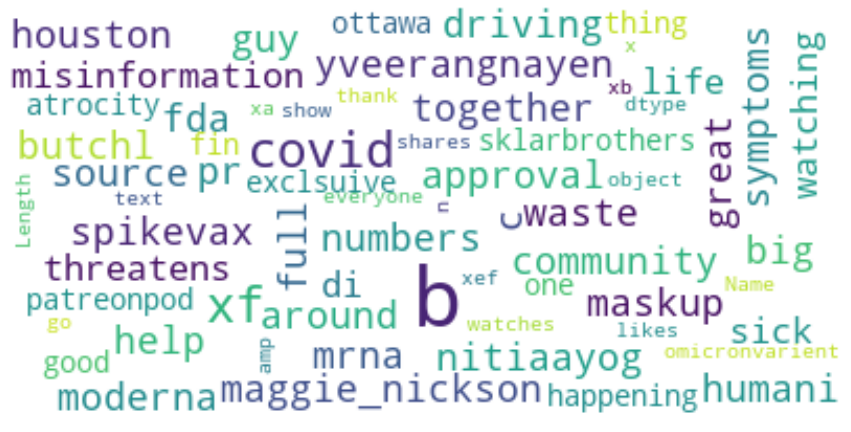

In [31]:
#wordcloud after preprocessing and removing stopwords
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['text'])

In [32]:
df.shape

(7081, 4)

In [33]:
df.isna().sum
tweet=df.copy()

In [34]:
tweet.head()

created_at                                               text  \
0  31-01-2022 16:34  b yveerangnayen nitiaayog great help community...   
1  31-01-2022 16:32                                   b maskup big guy   
2  31-01-2022 16:28  b fda pr full approval mrna moderna spikevax c...   
3  31-01-2022 16:27  b together driving covid numbers houston waste...   
4  31-01-2022 16:24  b butchl maggie_nickson symptoms around humani...   

         screen_name                       location  
0   b'DimpleRambhad'                            b''  
1      b'CobraQueer'             b'Springfield, IL'  
2    b'DonnaYoungDC'                  b'Washington'  
3   b'HoustonHealth'                 b'Houston, TX'  
4  b'MrAnonimoNegro'  b'Sicily. Not ITALY, SICILY.'

In [35]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

created_at                                               text  \
0  31-01-2022 16:34  b yveerangnayen nitiaayog great help community...   
1  31-01-2022 16:32                                   b maskup big guy   
2  31-01-2022 16:28  b fda pr full approval mrna moderna spikevax c...   
3  31-01-2022 16:27  b together driving covid numbers houston waste...   
4  31-01-2022 16:24  b butchl maggie_nickson symptoms around humani...   

         screen_name                       location sentiment polarity  
0   b'DimpleRambhad'                            b''  positive      0.8  
1      b'CobraQueer'             b'Springfield, IL'   neutral      0.0  
2    b'DonnaYoungDC'                  b'Washington'  positive     0.35  
3   b'HoustonHealth'                 b'Houston, TX'   neutral      0.0  
4  b'MrAnonimoNegro'  b'Sicily. Not ITALY, SICILY.'   neutral      0.0

In [36]:
tweet['sentiment'].value_counts()

neutral     3350
positive    2613
negative    1118
Name: sentiment, dtype: int64

In [37]:
sentiment_df = pd.DataFrame(tweet, columns=[ "text","polarity","sentiment"])

sentiment_df.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_COMBINE pol sent.csv")


sentiment_df.head(10)

text  polarity sentiment
0  b yveerangnayen nitiaayog great help community...       0.8  positive
1                                   b maskup big guy       0.0   neutral
2  b fda pr full approval mrna moderna spikevax c...      0.35  positive
3  b together driving covid numbers houston waste...       0.0   neutral
4  b butchl maggie_nickson symptoms around humani...       0.0   neutral
5  b canada flutruxklan protest eye opener issues...       0.0   neutral
6  b yveerangnayen mask important days good socia...  0.377778  positive
7  b davidgura nope spotify obligation allow spre...      -0.2  negative
8          b coronavirus mutates unvaccinated maskup       0.0   neutral
9  b maskup monday highlighting owen scallin owen...      -0.4  negative

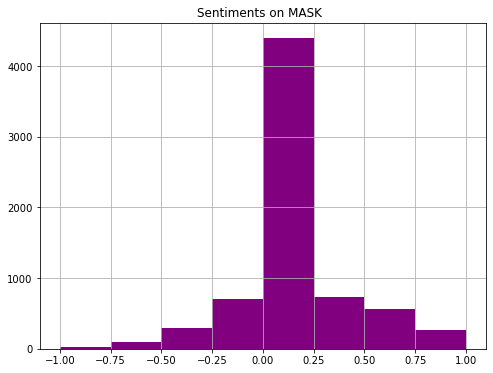

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tweet['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments on MASK  ")
plt.show()

In [39]:
#feature extraction(only feature)
y=tweet['sentiment'].values
y.shape

(7081,)

In [40]:
x=tweet['text'].values
x.shape

(7081,)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(5664,)
(5664,)
(1417,)


(1417,)

neutral     3350
positive    2613
negative    1118
Name: sentiment, dtype: int64


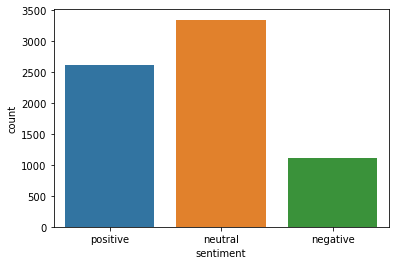

In [43]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

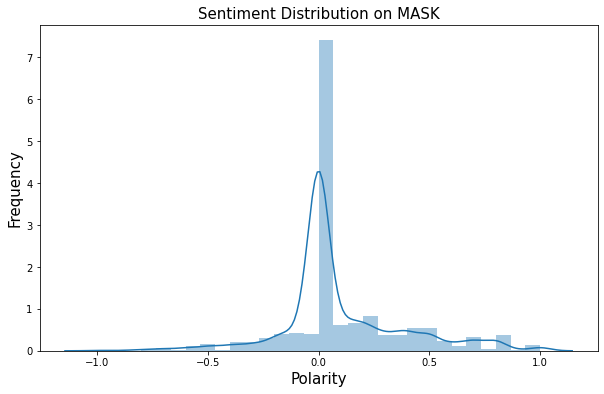

In [44]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution on MASK',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

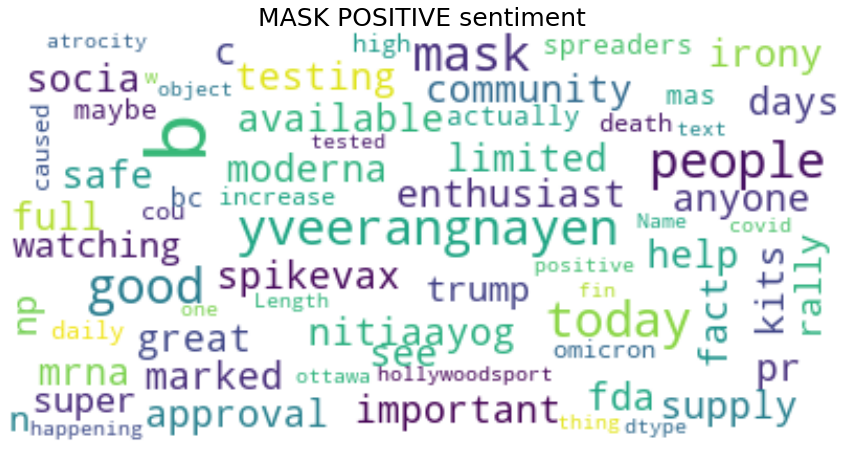

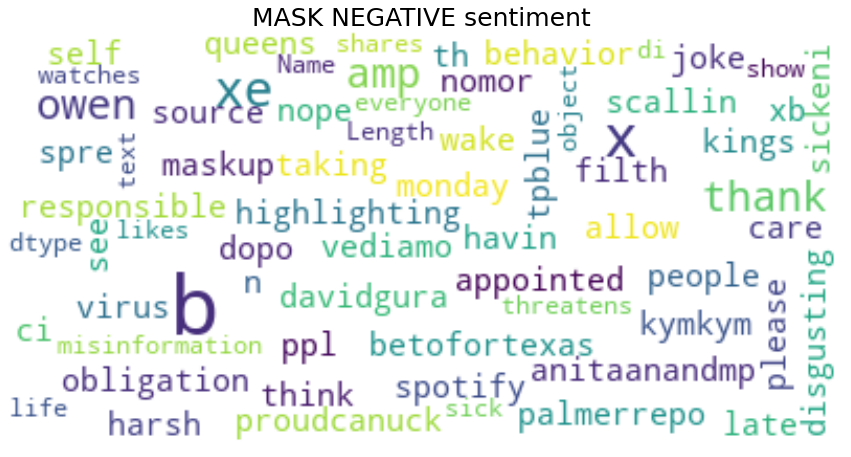

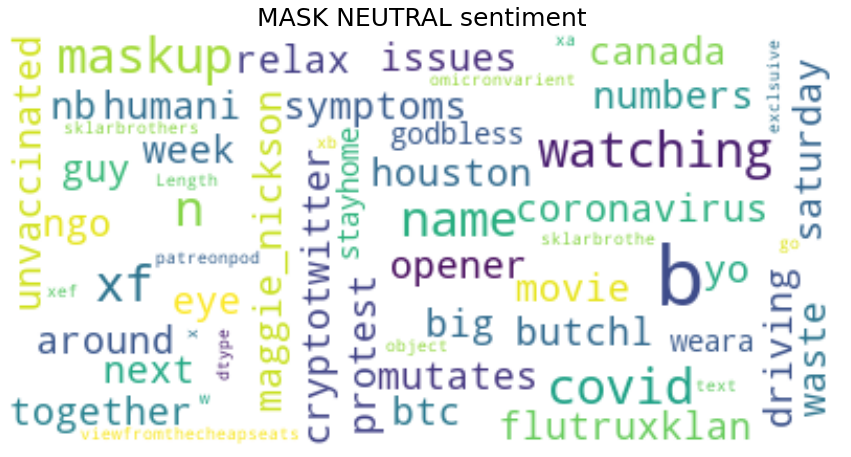

In [45]:
#wordcount with sentiment
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'MASK POSITIVE sentiment ')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'MASK NEGATIVE sentiment ')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'MASK NEUTRAL sentiment ')

In [46]:
count = pd.DataFrame(tweet.groupby('sentiment').sum())
count

created_at  \
sentiment                                                      
negative   31-01-2022 16:1631-01-2022 16:1531-01-2022 16:...   
neutral    31-01-2022 16:3231-01-2022 16:2731-01-2022 16:...   
positive   31-01-2022 16:3431-01-2022 16:2831-01-2022 16:...   

                                                        text  \
sentiment                                                      
negative   b davidgura nope spotify obligation allow spre...   
neutral    b maskup big guyb together driving covid numbe...   
positive   b yveerangnayen nitiaayog great help community...   

                                                 screen_name  \
sentiment                                                      
negative   b'AntheiaCottage'b'sjuhawks_rec'b'Joyyyyc3eeee...   
neutral    b'CobraQueer'b'HoustonHealth'b'MrAnonimoNegro'...   
positive   b'DimpleRambhad'b'DonnaYoungDC'b'DimpleRambhad...   

                                                    location    polarity  
sentiment                                                                 
negative   b''b"Saint Joseph's University "b''b''b''b''b'... -284.349004  
neutral    b'Springfield, IL'b'Houston, TX'b'Sicily. Not ...    0.000000  
positive   b''b'Washington'b''b'Wellsville, NY 14895'b'St...  957.141153

In [47]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [48]:
words

['b',
 'yveerangnayen',
 'nitiaayog',
 'great',
 'help',
 'community',
 'spread',
 'message',
 'every',
 'corner',
 'protect',
 'covid',
 'xe',
 'x',
 'xa',
 'b',
 'maskup',
 'big',
 'guy',
 'b',
 'fda',
 'pr',
 'full',
 'approval',
 'mrna',
 'moderna',
 'spikevax',
 'covid',
 'vaccine',
 'nfda',
 'info',
 'xe',
 'x',
 'xa',
 'b',
 'together',
 'driving',
 'covid',
 'numbers',
 'houston',
 'wastewater',
 'virus',
 'load',
 'xe',
 'x',
 'xa',
 'b',
 'butchl',
 'maggie_nickson',
 'symptoms',
 'around',
 'humanity',
 'inception',
 'vir',
 'xe',
 'x',
 'xa',
 'b',
 'canada',
 'flutruxklan',
 'protest',
 'eye',
 'opener',
 'issues',
 'transcend',
 'borders',
 'ignorance',
 'knows',
 'xe',
 'x',
 'xa',
 'b',
 'yveerangnayen',
 'mask',
 'important',
 'days',
 'good',
 'social',
 'work',
 'n',
 'maskupindia',
 'n',
 'maskup',
 'xe',
 'x',
 'xa',
 'b',
 'davidgura',
 'nope',
 'spotify',
 'obligation',
 'allow',
 'spread',
 'lies',
 'concerning',
 'deadly',
 'disease',
 'pr',
 'xe',
 'x',
 'xa',

In [49]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head(20)

word  frequency
0           x      10440
1          xe       7880
2          xf       7294
3           b       7124
4           n       7118
5          xa       7038
6        mask       2869
7          xb       2221
8      maskup       1468
9       covid       1372
10         xd        633
11        xef        591
12      masks        522
13       face        521
14  wearamask        491
15        amp        424
16         xc        362
17     people        331
18       wear        317
19         xs        308

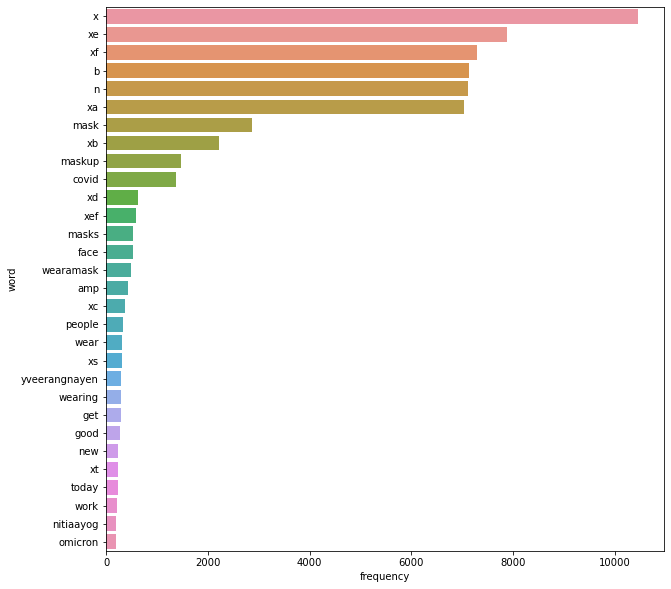

In [50]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [51]:
tweet.to_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_Final_sent_analysis.csv',index=False)

In [52]:
sentiment_df.head()

text polarity sentiment
0  b yveerangnayen nitiaayog great help community...      0.8  positive
1                                   b maskup big guy      0.0   neutral
2  b fda pr full approval mrna moderna spikevax c...     0.35  positive
3  b together driving covid numbers houston waste...      0.0   neutral
4  b butchl maggie_nickson symptoms around humani...      0.0   neutral

In [53]:
sentiment_df.describe()

text  polarity sentiment
count                                                7081    7081.0      7081
unique                                               6431     561.0         3
top     b everything site wide today n teepublic teepu...       0.0   neutral
freq                                                   16    3350.0      3350

In [54]:
sentiment_df.groupby('sentiment').size()

sentiment
negative    1118
neutral     3350
positive    2613
dtype: int64

In [55]:
print(sentiment_df.groupby('polarity').size())

polarity
-1.000000      7
-0.900000      4
-0.866667      1
-0.857143      1
-0.800000     14
            ... 
 0.800000    169
 0.825000      2
 0.850000      9
 0.900000     12
 1.000000     62
Length: 561, dtype: int64


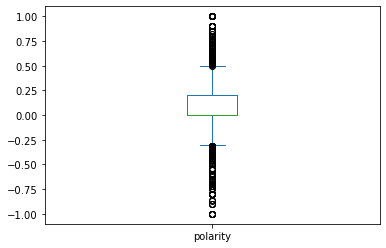

In [56]:
import matplotlib.pyplot as plt
sentiment_df.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

In [57]:
clo=['sentiment','polarity','text']
dataset2=sentiment_df.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

sentiment  polarity                                               text
0  positive       0.8  b yveerangnayen nitiaayog great help community...
1   neutral       0.0                                   b maskup big guy
2  positive      0.35  b fda pr full approval mrna moderna spikevax c...
3   neutral       0.0  b together driving covid numbers houston waste...
4   neutral       0.0  b butchl maggie_nickson symptoms around humani...
5   neutral       0.0  b canada flutruxklan protest eye opener issues...
6  positive  0.377778  b yveerangnayen mask important days good socia...
7  negative      -0.2  b davidgura nope spotify obligation allow spre...
8   neutral       0.0          b coronavirus mutates unvaccinated maskup
9  negative      -0.4  b maskup monday highlighting owen scallin owen...

In [58]:
dataset2.describe()#dataset2.hist()
#plt.show()

sentiment  polarity                                               text
count       7081    7081.0                                               7081
unique         3     561.0                                               6431
top      neutral       0.0  b everything site wide today n teepublic teepu...
freq        3350    3350.0                                                 16

In [59]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [60]:
df1.head()

text
0  b two really difficult years disaster appeared...
1  b check balinese wood mask green singh barong ...
2  b foxnow got keep kids masked especially young...
3  b make skin radiant xf xf x xd xf xf x xd nif ...
4                       b angelsfeartogo time maskup

In [61]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [62]:
df_train.head()

text sentiment
0  b two really difficult years disaster appeared...  negative
1  b check balinese wood mask green singh barong ...  negative
2  b foxnow got keep kids masked especially young...  positive
3  b make skin radiant xf xf x xd xf xf x xd nif ...  positive
4                       b angelsfeartogo time maskup   neutral

In [63]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})

In [64]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [65]:
df_test.head()

text sentiment
0  b stilettosuprmom got doses booster xe x x got...  negative
1  b lebanon jan xe xa xa xef xb xf nduring past ...  negative
2  b whiskeywineabt nathanielkristo hashtags alwa...  positive
3  b ugly make cigarettes n cm pencil color graph...  positive
4  b wow n n ladygaga n barackobama n outerwear f...   neutral

In [66]:
import string
string.punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [67]:
#storing the puntuation free text in a new column called clean_msg
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [68]:
df_train.head()
#punctuations are removed from news column in train dataset

text sentiment
0  b two really difficult years disaster appeared...  negative
1  b check balinese wood mask green singh barong ...  negative
2  b foxnow got keep kids masked especially young...  positive
3  b make skin radiant xf xf x xd xf xf x xd nif ...  positive
4                       b angelsfeartogo time maskup   neutral

In [69]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [71]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [72]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['b', 'foxnow', 'got', 'keep', 'kids', 'masked', 'especially', 'young', 'ones', 'learn', 'read', 'emotions', 'se', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'make', 'skin', 'radiant', 'xf', 'xf', 'x', 'xd', 'xf', 'xf', 'x', 'xd', 'nif', 'want', 'use', 'free', 'please', 'dm', 'xf', 'xf', 'xa', 'xb', 'xf', 'xf', 'xa', 'xb', 'n', 'n', 'masks', 'eye', 'eyemasks', 'patches', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'please', 'get', 'runout', 'ur', 'life', 'wearamask', 'stay', 'safe', 'stay', 'indoors', 'please', 'want', 'get', 'back', 'normal', 'covid', 'mask', 'vaccine']
Sentence after removing stopwords: ['b', 'asset', 'maskusdtperp', 'nside', 'long', 'nlevel', 'high', 'risk', 'nprice', 'ntimeframe', 'n', 'ncaution', 'data', 'delaye', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'free', 'home', 'covid', 'tests', 'available', 'order', 'n', 'nget', 'vaccinated', 'maskup', 'xe', 'x', 'xa']
Sentence after removin

Sentence after removing stopwords: ['b', 'study', 'mask', 'wearing', 'young', 'children', 'reducing', 'covid', 'spread', 'n', 'safeedforall', 'n', 'maskup', 'n']
Sentence after removing stopwords: ['b', 'maintaining', 'good', 'communication', 'recruitment', 'participation', 'n', 'n', 'clinicalresearch', 'clinicaltrials', 'cro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dog', 'cool', 'presents', 'n', 'n', 'xe', 'x', 'xdog', 'cool', 'xe', 'x', 'x', 'n', 'navailable', 'n', 'dog', 'cool', 'unique', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hollywood', 'entertaining', 'millions', 'good', 'ppl', 'amp', 'ideas', 'many', 'others', 'xf', 'xf', 'xa', 'xa', 'getreal', 'maskup', 'enjoylife']
Sentence after removing stopwords: ['b', 'lovingsgirl', 'realcandaceo', 'whatever', 'granny', 'pulling', 'maskup', 'cool', 'xf', 'xf', 'xa', 'xa']
Sentence after removing stopwords: ['b', 'premierscottmoe', 'good', 'see', 'want', 'move', 'time', 'someone', 'scrap', 'restricti'

Sentence after removing stopwords: ['b', 'thehill', 'mississippi', 'high', 'rate', 'covid', 'deaths', 'country', 'getvaccinated', 'maskup']
Sentence after removing stopwords: ['b', 'received', 'free', 'covid', 'test', 'hope', 'xe', 'x', 'xt', 'take', 'another', 'test', 'maskup', 'vaccinate', 'getboosted']
Sentence after removing stopwords: ['b', 'good', 'morning', 'peeps', 'n', 'antiqueclique', 'n', 'followvintage', 'n', 'antiquesaregreen', 'xe', 'x', 'xbb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xa', 'nit', 'new', 'week', 'happymonday', 'xe', 'x', 'xba', 'xef', 'xb', 'xf', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'yes', 'corona', 'positive', 'must', 'isolate', 'home', 'follow', 'guidelines', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'morning', 'rebels', 'xf', 'xf', 'xc', 'x', 'ntoday', 'grateful', 'good', 'night', 'sleep', 'nwhat', 'grateful', 'today', 'n', 'positivethoughts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf

Sentence after removing stopwords: ['b', 'soooo', 'chrisdelia', 'pretty', 'much', 'xf', 'xf', 'x', 'xas', 'mask', 'covid', 'thing', 'good', 'covid', 'maskup', 'covidvariant', 'nch', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thursdaythoughts', 'tips', 'goals', 'success', 'n', 'lifelessons', 'throwbackthursday', 'quotes', 'n', 'thankyou', 'iloveyou', 'imsorry', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'easy', 'mentalwellbeing', 'thursdaythoughts', 'mask', 'nkratu', 'mask', 'time']
Sentence after removing stopwords: ['b', 'fabulous', 'nbloom', 'orange', 'xf', 'xf', 'x', 'x', 'nget', 'one', 'today', 'n', 'nshop', 'ninstore', 'jc', 'online', 'n']
Sentence after removing stopwords: ['b', 'slightly', 'month', 'going', 'shopped', 'grocs', 'yesterday', 'pleased', 'see', 'mask', 'mandate', 'sign', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'rajasthan', 'nth', 'jan', 'covid', 'pm', 'bulletin', 'n', 'nplz', 'keep', 'maskup', 'xf

Sentence after removing stopwords: ['b', 'typical', 'blooming', 'arrogance', 'opposition', 'benches', 'extremely', 'crowded', 'houseofcommons', 'filled', 'majority', 'mask', 'wea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'transportation', 'go', 'pharmacy', 'pick', 'free', 'n', 'masks', 'disabled', 'low', 'income', 'wish', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kmcgair', 'live', 'oregon', 'xe', 'x', 'xm', 'glad', 'happening', 'maskup', 'getvaccinated']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'superb', 'work', 'xf', 'xf', 'x', 'xc', 'n', 'corona', 'n', 'youthveerangnayen', 'n', 'covidappropriatebehaviour', 'n', 'vaccinated', 'n', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'interview', 'nigel', 'farage', 'maskup', 'amp', 'covid', 'airborne', 'even', 'government', 'wants', 'move', 'youtube', 'xe', 'x', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'boris', 'said', 'lock', 'house', 'nyou', 'nb

Sentence after removing stopwords: ['b', 'seconds', 'already', 'retweeting', 'know', 'good', 'one', 'masks', 'maskup', 'mask', 'maskmania', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'x', 'xf', 'drnurseladyphn', 'glad', 'judge', 'made', 'right', 'choice', 'omaha', 'n', 'maskup', 'covid', 'n', 'n']
Sentence after removing stopwords: ['b', 'batman', 'vengance', 'batman', 'darkness', 'batman', 'right', 'listen', 'batman', 'n', 'maskup', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'great', 'work', 'dss', 'volunteers', 'inspiration', 'saint', 'dr', 'gurmeet', 'ram', 'rahim', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'great', 'job', 'derasachasauda', 'volunteers', 'following', 'pious', 'teachings', 'saint', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'drop', 'n', 'n', 'fem', 'nminted', 'onhicetnunc', 'nobjkt', 'n', 'n'

Sentence after removing stopwords: ['b', 'another', 'amazing', 'day', 'n', 'getvaccinated', 'xe', 'xc', 'xc', 'n', 'getboosted', 'xf', 'xf', 'x', 'x', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'nfor', 'loved', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'show', 'us', 'picture', 'favorite', 'mask', 'mask', 'maskupindia', 'engagement']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xbdear', 'tourists', 'xf', 'xf', 'x', 'x', 'italians', 'smiles', 'fun', 'entertainment', 'gone', 'trapped', 'masks', 'unt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'never', 'health', 'rights', 'amp', 'freedoms', 'many', 'destroyed', 'n', 'n', 'maskup', 'n', 'torycoviddisaster']
Sentence after removing stopwords: ['b', 'muzungu', 'athletes', 'competing', 'international', 'tournaments', 'right', 'eritrea', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'xa', 'xb', 'done', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ackadem

Sentence after removing stopwords: ['b', 'first', 'xe', 'x', 'xs', 'mask', 'ineffective', 'face', 'covering', 'effective', 'saying', 'mask', 'wo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'triple', 'moon', 'face', 'mask', 'pagan', 'wicca', 'magic', 'symbols', 'goddess', 'jersey', 'printed', 'handmade', 'face', 'mask', 'reusable', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'rajasthan', 'nth', 'jan', 'covid', 'pm', 'bulletin', 'n', 'nplz', 'keep', 'maskup', 'xf', 'xf', 'x', 'xb', 'amp', 'staysafe', 'n', 'n', 'positive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wearing', 'mask', 'helps', 'prevent', 'spread', 'omicronvariant', 'omicron', 'covid', 'n', 'mask', 'best', 'orde', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wearing', 'masks', 'act', 'defiance', 'government', 'wore', 'first', 'place', 'xe', 'x', 'xa', 'govern', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tarama', 'listesi

Sentence after removing stopwords: ['b', 'yveerangnayen', 'great', 'work', 'youth', 'veerangnayen', 'xf', 'xf', 'x', 'xc', 'youthveerangnayen', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ayeeeee', 'issa', 'new', 'week', 'xf', 'xf', 'xd', 'xbe', 'xf', 'xf', 'xa', 'xb', 'n', 'n', 'xf', 'xf', 'x', 'xaa', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'finally', 'holmes', 'x', 'deejayneptune', 'n', 'n', 'motivationmonday', 'breakfastinthecity', 'wit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'things', 'stato', 'open', 'another', 'new', 'strain', 'variant', 'neocov', 'covid', 'high', 'spread', 'high', 'death', 'rate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'everybody', 'whiskeytangofoxtrot', 'nobodiesfaultbutmine', 'sleepwhendead', 'outlawtranscendentalist', 'resist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beautiful', 'outdoorsy', 'face', 'mask', 'travel', 'hike',

Sentence after removing stopwords: ['b', 'recent', 'history', 'covid', 'mutations', 'show', 'neocov', 'coronavirus', 'may', 'well', 'new', 'threat', 'humankind', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cool', 'travel', 'face', 'mask', 'us', 'cant', 'wait', 'get', 'back', 'travel', 'often', 'travel', 'vacation', 'roadtrip', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pretty', 'wearamask', 'kn']
Sentence after removing stopwords: ['b', 'awesome', 'fun', 'facemask', 'covid', 'mask', 'skincare', 'staysafe', 'beauty', 'coronavirus', 'masks', 'maskerwajah', 'skincareroutine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'despite', 'long', 'mask', 'mandate', 'majority', 'students', 'still', 'masked', 'yea', 'xe', 'x', 'xs', 'win', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'requirement', 'danecounty', 'wisconsin', 'runs', 'march', 'right', 'n', 'maybe', 'anticipating', 'nthanks', 'xe', 'x', 'xa']
Sentence after remo

Sentence after removing stopwords: ['b', 'going', 'mask', 'shit', 'like', 'willing', 'suffer', 'suffer']
Sentence after removing stopwords: ['b', 'men', 'perceived', 'attractive', 'wearing', 'surgical', 'masks', 'perhaps', 'study', 'get', 'anti', 'maskers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watcherskies', 'dgurdasani', 'brilliant', 'us', 'focus', 'improving', 'people', 'mask', 'xe', 'x', 'xs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'repadamschiff', 'transportation', 'go', 'pharmacy', 'pick', 'free', 'n', 'masks', 'disabled', 'low', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'morning', 'wearing', 'mask', 'times', 'protects', 'everyone', 'else', 'people', 'still', 'dying', 'read', 'asy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'many', 'could', 'ugly', 'cancer', 'issues', 'cells', 'get', 'thrashed', 'see', 'dr', 'leonardo', 'xe', 'x', 'xs', 'thread', 'us', 'xe', 'x', 'xa']
Sentence after removing 

Sentence after removing stopwords: ['b', 'special', 'day', 'let', 'xe', 'x', 'xs', 'promise', 'motherland', 'everything', 'save', 'lives', 'preserve', 'cul', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'year', 'xe', 'x', 'xs', 'resolution', 'socially', 'distance', 'vaxxers', 'maskup', 'sheeple', 'want', 'minimi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'captain', 'britain', 'issue', 'origin', 'issue', 'complete', 'mask', 'uk', 'edition', 'n', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'new', 'poll', 'finds', 'glennyoungkin', 'pts', 'approval', 'rating', 'contrast', 'northam', 'pts', 'april', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'took', 'lucy', 'epic', 'hike', 'today', 'upper', 'pima', 'cyn', 'six', 'miles', 'bouldering', 'brilliant', 'day', 'wore', 'gaitor', 'en', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'republic', 'day', 'wishing', 'india', 'healthy', 'happy', 'future', 'time', 'citizens'

Sentence after removing stopwords: ['b', 'ovni', 'elhopkins', 'kayburley', 'nadhimzahawi', 'went', 'look', 'study', 'saw', 'published', 'ok', 'jay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'hangers', 'table', 'nice', 'keep', 'xe', 'x', 'xem', 'clean', 'n', 'beijingwinterolympics', 'maskup', 'teamusa']
Sentence after removing stopwords: ['b', 'checkout', 'covid', 'free', 'mask', 'mask', 'please', 'suppomy', 'redbubble', 'shop', 'retweeting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'welcome', 'eddiedabu', 'bn', 'maskup']
Sentence after removing stopwords: ['b', 'mayorgorton', 'heard', 'negative', 'test', 'amazing', 'news', 'glad', 'wonderful', 'leadership', 'staying', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'potus', 'vp', 'transportation', 'go', 'pharmacy', 'pick', 'free', 'n', 'masks', 'disabled', 'low', 'income', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'red', 'koi', 'fish', 'face', 'mask', 'cotton', 'jersey

Sentence after removing stopwords: ['b', 'p', 'grift', 'real', 'n', 'vaccineswork', 'vaxup', 'maskup']
Sentence after removing stopwords: ['b', 'since', 'xe', 'x', 'xs', 'arrival', 'covid', 'great', 'killer', 'law', 'enforcement', 'xe', 'x', 'xt', 'way', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'world', 'famous', 'nice', 'carnival', 'feb', 'coming', 'fast', 'place', 'massena', 'cotedazurfrance', 'france', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sure', 'hope', 'k', 'plus', 'russian', 'troops', 'ukrainian', 'border', 'vaccinated', 'could', 'disaster', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everyone', 'mask', 'xf', 'xf', 'x', 'xb', 'nannouncing', 'first', 'nft', 'rip', 'hamster', 'xf', 'xf', 'x', 'xb', 'mask', 'stay', 'tuned', 'xf', 'xf', 'x', 'xb', 'n', 'n', 'mask', 'hamster', 'love', 'hk']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'nopera', 'lebody', 'led', 'professional', 'homerapy', 'fac

Sentence after removing stopwords: ['b', 'billdriscolljr', 'armbrustusa', 'appreciate', 'comments', 'help', 'stay', 'safe', 'well', 'armbrustusa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'walk', 'confidence', 'wearing', 'safety', 'gear', 'champions', 'n', 'nget', 'zero', 'risque', 'coveralls', 'face', 'covers', 'win', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'snow', 'weather', 'npic', 'exactly', 'years', 'ago', 'digging', 'snowzilla', 'let', 'xe', 'x', 'xs', 'talk', 'boom', 'snow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enjoying', 'masked', 'singer', 'think', 'know', 'behind', 'mask', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'x', 'n', 'n', 'mandybaggot', 'masked', 'singer', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'rajasthan', 'nst', 'jan', 'covid', 'pm', 'bulletin', 'n', 'nplz', 'keep', 'maskup', 'xf', 'xf', 'x', 'xb', 'amp', 'staysafe', 'n', 'n', 'positive', 'cases', 'xe', 'x', 'xa']
Sentenc

Sentence after removing stopwords: ['b', 'apparently', 'love', 'color', 'scheme', 'guitar', 'argyle', 'maskup']
Sentence after removing stopwords: ['b', 'man', 'needs', 'get', 'sleep', 'xe', 'x', 'xt', 'wait', 'see', 'absolute', 'bullshit', 'comes', 'richmond', 'maskup', 'electneilsmith']
Sentence after removing stopwords: ['b', 'jkenney', 'wus', 'local', 'zhers', 'ontario', 'nhuh', 'neverything', 'lookin', 'good', 'n', 'cdnpoli', 'canada', 'covid', 'covidiots', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'county', 'hospital', 'system', 'high', 'number', 'covid', 'hospitalizations', 'far', 'pandemic', 'please', 'tell', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'south', 'red', 'zones', 'right', 'trying', 'decide', 'whether', 'oatmeal', 'breakfast', 'worth', 'definite', 'exposure', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'maskup', 'monday', 'xf', 'xf', 'x', 'xb', 'really', 'every', 'day', 'every', 'trip', 'every', 'time', '

Sentence after removing stopwords: ['b', 'pope', 'francis', 'called', 'getting', 'vaccinated', 'act', 'love', 'put', 'bluntly', 'holy', 'father', 'xe', 'x', 'xs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'xef', 'xb', 'xf', 'extra', 'extra', 'read', 'come', 'grabajab', 'today', 'n', 'xf', 'xf', 'x', 'xb', 'rotherham', 'united', 'new', 'york', 'stadium', 'pm', 'pm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'real', 'pickup', 'n', 'n', 'arianagrande', 'n', 'barackobama', 'n', 'sleeve', 'grey', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'love', 'new', 'mask', 'supervisor', 'bought', 'n', 'nshe', 'got', 'whole', 'unit', 'adorable', 'customized', 'masks', 'cou', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'distributorship', 'bulk', 'buyer', 'nature', 'care', 'solutions', 'interested', 'people', 'share', 'contact', 'details', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x',

Sentence after removing stopwords: ['b', 'ozraeliavi', 'two', 'doses', 'put', 'omicron', 'targeted', 'pfizer', 'vaccine', 'try', 'novavax', 'booster', 'wear', 'n', 'mask', 'high', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'visiting', 'friends', 'relatives', 'mexico', 'maybe', 'heading', 'south', 'border', 'business', 'stay', 'healthy', 'safe', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'nledrapy', 'light', 'led', 'face', 'mask', 'skin', 'rejuvenation', 'pdt', 'photon', 'facial', 'skin', 'care', 'buybest', 'n', 'ledrapy', 'light', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fuck', 'free', 'choice', 'free', 'choice', 'fucks', 'health', 'safety', 'family', 'n', 'n', 'flutruxklan', 'getvaccinated', 'maskup']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'youthveerangnayen', 'team', 'distribution', 'corona', 'prevention', 'kits', 'needy', 'people', 'great', 'huminity', 'wo', 'xe', 'x',

Sentence after removing stopwords: ['b', 'navy', 'blue', 'face', 'mask', 'old', 'norse', 'knit', 'pattern', 'reusable', 'washable', 'mouth', 'cover', 'baltic', 'auseklis', 'handmade', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'really', 'fascinating', 'discussion', 'bangladesh', 'mask', 'study', 'nworth', 'reading']
Sentence after removing stopwords: ['b', 'best', 'toy', 'amp', 'cartoon', 'one', 'talks', 'mask']
Sentence after removing stopwords: ['b', 'hebrews', 'know', 'vaccine', 'keeps', 'hospital', 'amp', 'morgue', 'right', 'still', 'transmit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cast', 'party', 'opening', 'performance', 'play', 'play', 'definitely', 'web', 'worth', 'tangled', 'want', 'help', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'afternoon', 'cape', 'town', 'team', 'return', 'tomorrow', 'assist', 'need', 'anything', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ayeeeee', 'issa', 'new', 'week', 'xf', 'xf

Sentence after removing stopwords: ['b', 'xe', 'xac', 'xb', 'xef', 'xb', 'xf', 'xe', 'xac', 'xb', 'xef', 'xb', 'xf', 'n', 'xe', 'xac', 'xb', 'xef', 'xb', 'xf', 'xe', 'xac', 'xb', 'xef', 'xb', 'xf', 'n', 'xe', 'xac', 'xb', 'xef', 'xb', 'xf', 'xe', 'xac', 'xb', 'xef', 'xb', 'xf', 'n', 'xe', 'xac', 'xb', 'xef', 'xb', 'xf', 'xe', 'xac', 'xb', 'xef', 'xb', 'xf', 'n', 'xe', 'xac', 'xb', 'xef', 'xb', 'xf', 'xe', 'xac', 'xb', 'xef', 'xb', 'xf', 'n', 'nnot', 'wordle', 'hospitals', 'without', 'available', 'beds', 'n', 'wearamask', 'vaccinessavelives', 'pandemic']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'pls', 'tc', 'ur', 'nd', 'ur', 'family', 'u', 'safe', 'country', 'also', 'safe', 'n', 'vaccinationcamps', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thank', 'reminder', 'oneinamelia', 'still', 'enjoy', 'going', 'sometimes', 'always', 'maskup', 'usually', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'first', 'time', 'since', 'mid', 'octobe

Sentence after removing stopwords: ['b', 'enjoy', 'free', 'samples', 'purchase', 'clinique', 'n', 'winterdeals', 'deals', 'coupon', 'sale', 'limitedtime', 'skincare', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'somebody', 'say', 'face', 'mask', 'n', 'ni', 'mine', 'ready', 'one', 'choose', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'n', 'n', 'mask', 'facemasks']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xve', 'also', 'opened', 'new', 'chat', 'discord', 'inform', 'us', 'content', 'tag', 'us', 'twitter', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wonderful', 'governor', 'common', 'sense', 'made', 'long', 'ago', 'maskmandate', 'vaccinemandate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hi', 'dropped', 'new', 'nft', 'give', 'bonus', 'first', 'buyer', 'nft', 'mask', 'tigermask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'republic', 'day', 'wishing', 'india', 'healthy', 'happy', 'future

Sentence after removing stopwords: ['b', 'wearing', 'mask', 'important', 'imaging', 'covid', 'immunocompetent', 'vs', 'immunosuppressed', 'patients', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oh', 'still', 'goin', 'back', 'forth', 'wearin', 'mask', 'keep', 'right', 'protecting', 'rights', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'excellent', 'interview', 'djnicholl', 'gbnews', 'maskup', 'thedauk', 'wanderingwelch']
Sentence after removing stopwords: ['b', 'occasion', 'zero', 'risque', 'honours', 'diverse', 'homeland', 'proudly', 'reinstates', 'mask', 'india', 'made', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hot', 'damn', 'hot', 'like', 'queensland', 'harsh', 'summer', 'heat', 'n', 'nnow', 'imagine', 'wear', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'headsurrey', 'making', 'point', 'right', 'notherwise', 'little', 'hope', 'us', 'n', 'siblingsstayhome', 'n', 'xf', 'xf', 'x', 'xb', 'xe', 'x', 'xa']
Sentence after rem

Sentence after removing stopwords: ['b', 'still', 'seeing', 'people', 'fresh', 'air', 'wearing', 'mask', 'n', 'n', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'x', 'xba', 'xef', 'xb', 'xf']
Sentence after removing stopwords: ['b', 'ofthedales', 'kamzenolay', 'funder', 'yes', 'classic', 'case', 'monster', 'escaping', 'creator', 'n', 'n', 'getvaccinatednow', 'n', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'skynews', 'kayburley', 'grantshapps', 'davidlammy', 'polite', 'replies', 'please', 'real', 'world', 'artists', 'finally', 'perform', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hi', 'faithkats', 'apologize', 'inconveniences', 'caused', 'kindly', 'note', 'keep', 'engaging', 'suppoteam', 'fo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'really', 'great', 'job', 'keep', 'n', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'terminator',

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'free', 'giveaway', 'grab', 'coin', 'web', 'edition', 'xf', 'xf', 'xa', 'xa', 'ncelebrate', 'ens', 'gtc', 'mask', 'listings', 'prize', 'p', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'old', 'lady', 'church', 'demanded', 'put', 'mask', 'informed', 'naturally', 'immune', 'n', 'nobody', 'scoffs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bright', 'white', 'gold', 'beige', 'velvet', 'mask', 'wedding', 'face', 'mask', 'festive', 'new', 'years', 'mask', 'shiny', 'velvet', 'mask', 'taupe', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covidiots', 'keep', 'saying', 'free', 'get', 'vaccinated', 'wearamask', 'well', 'got', 'vaccinated', 'amp', 'wear', 'mask', 'amp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'really', 'great', 'work', 'done', 'youthveerangnayen', 'keep', 'sisters', 'awarenesscampaigns', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'phirecon', 'thanks', 'xe', 'x', 'xt', 'want', 'make', 'nano', 'particles', 'gross', 'mask', 'maskinsanity']
Sentence after removing stopwords: ['b', 'rehtaehrenee', 'chasesamuels', 'graca', 'exactly', 'lot', 'raging', 'omicron', 'spreading', 'widely', 'wildly', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'catherinerusse', 'think', 'going', 'take', 'get', 'full', 'strength', 'back', 'havent', 'co', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'daughter', 'set', 'going', 'school', 'weekend', 'good', 'day', 'aaira', 'xe', 'xd', 'xa', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xa', 'xb', 'n', 'n', 'winter', 'ilovemydaughter', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'york', 'state', 'supreme', 'coujudge', 'strikes', 'mask', 'mandate', 'n', 'n']
Sentence after removing stopwords: ['b', 'anntookeen', 'beautiful', 'image', 'great', 'decision', 'n', 'getvaccinated', 'maskup']
Sentence after 

Sentence after removing stopwords: ['b', 'gt', 'gt', 'gt', 'custom', 'face', 'masks', 'nshoutout', 'brand', 'great', 'zoom', 'meetings', 'social', 'media', 'pages', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'phemexofficial', 'good', 'work', 'n', 'n', 'jollof', 'n', 'ammymond', 'n', 'ajikkuns', 'n', 'n', 'grabacoin', 'phemex', 'ens', 'gtc', 'mask', 'giveaway', 'cryptocurrency']
Sentence after removing stopwords: ['b', 'patients', 'dying', 'covid', 'really', 'get', 'good', 'effects', 'linger', 'playing', 'havoc', 'w', 'p', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'grey', 'floral', 'print', 'dotty', 'cotton', 'layer', 'mask', 'knot', 'elastic', 'fit', 'ready', 'ship', 'uk', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'would', 'love', 'know', 'southwestair', 'flight', 'attendant', 'morning', 'santa', 'barbara', 'airpowent', 'gift', 'sh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'great'

Sentence after removing stopwords: ['b', 'housecl', 'potus', 'vp', 'stay', 'healthy', 'symptoms', 'please', 'stay', 'home', 'everyone', 'maskup']
Sentence after removing stopwords: ['b', 'artist', 'abstract', 'geometric', 'symbolism', 'perspectivism', 'lifestyle', 'prints', 'panoply', 'levens', 'nice', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'abelkamurungu', 'akudzweishe', 'welcome', 'tmm', 'maskup']
Sentence after removing stopwords: ['b', 'stop', 'masks', 'let', 'go', 'shoe', 'mandate', 'especially', 'warm', 'climes', 'shoes', 'totally', 'unnecessary', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccine', 'maskup', 'vaccinemandate', 'n', 'nwow', 'news', 'flash', 'n', 'nyou', 'really', 'wearing', 'n', 'strong', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'justify', 'harassing', 'kids', 'trying', 'keep', 'community', 'safe', 'spitting', 'coughin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'governorva', 'gop

Sentence after removing stopwords: ['b', 'weekend', 'wayyyy', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'good', 'pitbull', 'ft', 'tydollasign', 'n', 'tgif', 'breakfastinthecity', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'tuesday', 'everyone', 'wear', 'mask', 'stay', 'healthy', 'n', 'n', 'mask', 'raframos', 'grey', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'great', 'news', 'nils', 'lofgren', 'pulls', 'years', 'music', 'spotify', 'amid', 'covid', 'misinformation', 'boycott', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rockhound', 'sure', 'engagement', 'ensure', 'someone', 'else', 'sees', 'original', 'message', 'may', 'lead', 'maskup', 'thank']
Sentence after removing stopwords: ['b', 'h', 'tinasheferro', 'kindly', 'note', 'date', 'th', 'th', 'issue', 'escalated', 'support', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'potofskymelissa', 'costcocanada', 'walmartcanada',

Sentence after removing stopwords: ['b', 'eyes', 'mask', 'xe', 'x', 'xa', 'price', 'usd', 'n', 'n', 'xe', 'x', 'xa', 'real', 'time', 'cryptocurrency', 'trends', 'xe', 'x', 'xa', 'n', 'n', 'xe', 'x', 'xa', 'mask', 'markets', 'ncrypto', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'spencerjcox', 'wow', 'lt', 'governor', 'utah', 'tests', 'positive', 'covid', 'utah', 'lt', 'gov', 'deidre', 'henderson', 'tested', 'positive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'hot', 'deal', 'xf', 'xf', 'x', 'xa', 'n', 'nartnaturals', 'kn', 'face', 'masks', 'pack', 'n', 'nconstructed', 'layers', 'filtration', 'optimal', 'protection', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yup', 'worth', 'read', 'anyway', 'need', 'laugh', 'absurdity', 'wearamask', 'getvaccinated', 'blizzard']
Sentence after removing stopwords: ['b', 'first', 'collection', 'afroapes', 'mask', 'love', 'nimigongo', 'patterns', 'ncheck', 'item', 'opensea', 'xe', 'x', '

Sentence after removing stopwords: ['b', 'students', 'staff', 'great', 'job', 'masking', 'stay', 'healthy', 'week', 'facemaskfriday', 'n', 'nkeep', 'gesd', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thanks', 'everyone', 'responded', 'far', 'still', 'looking', 'people', 'interviewed', 'study', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'america', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'n', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'mask', 'wearing', 'school', 'dropped', 'last', 'week', 'son', 'self', 'isolating', 'lft', 'significant', 'number', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'keeping', 'body', 'healthy', 'expression', 'gratitude', 'whole', 'cosmos', 'trees', 'clouds', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rose', 'amp', 'respectively', 'approximately', 'staffed', 'adult', 'icu', 'beds', 'covid', 'patients', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['b', 'schools', 'resumed', 'happy', 'learners', 'xf', 'xf', 'x', 'xa', 'excited', 'successful', 'year', 'studying', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'goldymanocha', 'yveerangnayen', 'great', 'volunteers', 'corona', 'n', 'youthveerangnayen', 'n', 'covidappropriatebehaviour', 'n', 'vaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'cases', 'continue', 'spread', 'rapidly', 'fayette', 'county', 'vaccine', 'showing', 'effective', 'keeping', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nftmatt', 'hi', 'drop', 'new', 'nft', 'objktcom', 'bonus', 'check', 'link', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'minnesota', 'covid', 'case', 'numbers', 'reported', 'today', 'numbers', 'reported', 'mnhealth', 'today', 'positive', 'cases', 'n', 'new', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'every', 'living', 'cell', 'body', 'made', 'food', 'ea

Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'safe', 'protect', 'orher', 'also', 'n', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'travel', 'patco', 'must', 'wear', 'facial', 'covering', 'please', 'remember', 'also', 'practice', 'social', 'distancing', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'loved', 'segment', 'amp', 'agree', 'happening', 'virginia', 'amp', 'texas', 'nothing', 'shoof', 'mccarthyism', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'nopera', 'lebody', 'led', 'professional', 'homerapy', 'facial', 'mask', 'face', 'neck', 'tamanu', 'calming', 'buybest', 'n', 'opera', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'got', 'booster', 'shot', 'less', 'week', 'first', 'covid', 'scare', 'feel', 'happy', 'relieved', 'vaccineswork', 'wearamask']
Sentence after removing st

Sentence after removing stopwords: ['b', 'yveerangnayen', 'yes', 'corona', 'positive', 'must', 'isolate', 'home', 'follow', 'guidelines', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'request', 'citizens', 'follow', 'covid', 'appropriate', 'behaviour', 'safe', 'maskup', 'follow', 'socialdistancing', 'n', 'nto', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'thanks', 'youthveeragnayen', 'team', 'giving', 'new', 'guidelines', 'corona', 'positive', 'people', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'saying', 'months', 'maybe', 'tell', 'newly', 'hypochondriac', 'created', 'trudeau', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'factions', 'n', 'nthe', 'shepherds', 'symbol', 'n', 'ngather', 'people', 'unity', 'wise', 'caring', 'shepherds', 'educate', 'social', 'iss', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'realsteel', 'eminem', 'donate', 'tobeakingofrobot', 'rich', 'champion', 'morefamou

Sentence after removing stopwords: ['b', 'spottedinpepe', 'samreenkaur', 'playing', 'cool', 'classic', 'denim', 'n', 'n', 'pepejeansindia', 'pepeison', 'thenewblue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'global', 'days', 'action', 'continue', 'today', 'palestinians', 'resist', 'israel', 'xe', 'x', 'xs', 'ethnic', 'cleansing', 'al', 'naqab', 'beita', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'well', 'done', 'team', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'x', 'xc', 'nthe', 'great', 'good', 'work', 'one', 'another', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'davidly', 'may', 'legal', 'liability', 'rogan', 'charged', 'pandemicide', 'maskup', 'getstuck', 'getboosted']
Sentence after removing stopwords: ['b', 'khushalikalmkar', 'yveerangnayen', 'great', 'volunteers', 'covid', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 'n', 'maskupindia', 'n', 'youthveerangnayen']
Sentence after removing stopwor

Sentence after removing stopwords: ['b', 'allanruhl', 'alfonsocauders', 'lol', 'nu', 'realize', 'wealthy', 'countries', 'good', 'financially', 'pandemic', 'g', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskup', 'n', 'folks', 'omicron', 'care', 'got', 'many', 'reports', 'reinfections', 'even', 'tripl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'unquirer', 'fourwinns', 'ottawapolice', 'jimwatsonottawa', 'congratulations', 'supporting', 'spread', 'omicron', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wear', 'mask', 'protect', 'nearly', 'yr', 'old', 'parents', 'choice', 'shout', 'supermarket', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ngonibowa', 'good', 'day', 'may', 'kindly', 'confirm', 'account', 'registered', 'name', 'j', 'muringai', 'rk', 'staysafe', 'maskup']
Sentence after removing stopwords: ['b', 'vaccine', 'pass', 'xe', 'x', 'xt', 'use', 'try', 'reduce', 'risk', 'catching', 'delta', 'omicron', 'xe', 'x', 'xa']
Sente

Sentence after removing stopwords: ['b', 'people', 'make', 'mistake', 'viewing', 'doctors', 'experts', 'skepticism', 'distrust', 'regardless', 'important', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'npriori', 'skincare', 'unveiled', 'led', 'mask', 'fda', 'cleared', 'professional', 'lightrapy', 'facial', 'silicone', 'mask', 'buybest', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'safe', 'protect', 'orher', 'also', 'n', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'still', 'wear', 'mask', 'stay', 'safe', 'keep', 'others', 'safe', 'even', 'though', 'boosted', 'omicron', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'neeshbloggs', 'good', 'neesh', 'xf', 'xf', 'x', 'xa', 'person', 'school', 'decency', 'intelligence', 'self', 'wort', 'xe', 'x', 'xa']
Sentence after removing stopwords

Sentence after removing stopwords: ['b', 'msoond', 'okay', 'long', 'covid', 'variants', 'please', 'maskup', 'staysafe']
Sentence after removing stopwords: ['b', 'set', 'icons', 'new', 'normal', 'coronavirus', 'prevention', 'n', 'n', 'n', 'n', 'shutterstock', 'icons', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'age', 'covid', 'variants', 'kindness', 'shown', 'many', 'ways', 'social', 'distancing', 'proper', 'regu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'perfect', 'way', 'hide', 'sunlight', 'want', 'take', 'nap', 'workplace', 'lunchbreak', 'xf', 'xf', 'xa', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'first', 'air', 'purifier', 'type', 'mask', 'usa', 'norder', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'airpurification', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xalt', 'right', 'xe', 'x', 'xd', 'news', 'outlets', 'want', 'teachers', 'kids', 'grandma', 'dead', 'xe', 'x', 'xa', 'oh', 'wait', 'weeks',

Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'good', 'job', 'xf', 'xf', 'x', 'xf', 'wearamask', 'derasachasauda', 'saintdrmsg']
Sentence after removing stopwords: ['b', 'huge', 'thank', 'boris', 'johnson', 'covid', 'omicron', 'tories', 'pro', 'corruption', 'pro', 'virus', 'since', 'le', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remember', 'planning', 'going', 'hawaii', 'march', 'tickets', 'cheap', 'haha', 'fun', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'head', 'toe', 'denim', 'bold', 'look', 'make', 'n', 'n', 'pepejeansindia', 'pepeison', 'thenewblue', 'ss', 'welovepepe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jesus', 'way', 'truth', 'life', 'npraise', 'god', 'hallelujah', 'n', 'ninspirational', 'hour', 'live', 'n', 'bybisasa', 'n', 'n', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'equivalent', 'kn', 'many', 'colors', 'available', 'order', 'al

Sentence after removing stopwords: ['b', 'real', 'talk', 'n', 'nlittles', 'vaccinated', 'covid', 'amp', 'depend', 'rest', 'us', 'protect', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'covid', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 'n', 'maskupindia', 'make', 'safe', 'india', 'n', 'youthveerangnayen']
Sentence after removing stopwords: ['b', 'free', 'uk', 'shipping', 'amp', 'international', 'xc', 'xa', 'n', 'norder', 'charlesrenniemackintosh']
Sentence after removing stopwords: ['b', 'good', 'morning', 'good', 'afternoon', 'evening', 'beautiful', 'humans', 'aliens', 'great', 'week', 'stay', 'safe', 'stay', 'warm', 'wearamask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'munyahgp', 'kindly', 'note', 'team', 'coming', 'today', 'assistance', 'bk', 'maskup', 'maskup', 'staysafe']
Sentence after removing stopwords: ['b', 'deathsantis', 'vaxup', 'maskup', 'bountiful', 'nurse', 'veteran', 'dies', 'testing', 'positive', 'covi

In [73]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['b', 'two', 'really', 'difficult', 'years', 'disaster', 'appeared', 'please', 'get', 'vaccinated', 'get', 'booster', 'wear', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'balinese', 'wood', 'mask', 'green', 'singh', 'barong', 'carving', 'indonesian', 'wall', 'ahanging', 'barong', 'singh', 'mask', 'balinese', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tryhardbruins', 'ottawajoe', 'cmckenney', 'ottawapolice', 'one', 'xe', 'x', 'xcfighting', 'freedom', 'xe', 'x', 'xd', 'mean', 'sorry', 'xe', 'x', 'xc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'monday', 'xf', 'xf', 'xa', 'xb', 'let', 'drink', 'xe', 'x', 'x', 'xf', 'xf', 'xd', 'xb', 'together', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'spiritual', 'league', 'n', 'weak', 'let', 'somebody', 'put', 'something', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'birthday', 'birthdaygirl', 'butterfly

Sentence after removing stopwords: ['b', 'people', 'freak', 'others', 'wearing', 'mask', 'ever', 'think', 'may', 'overreacted', 'little', 'bit']
Sentence after removing stopwords: ['b', 'hjwoof', 'suzeqknits', 'wife', 'runs', 'childcare', 'center', 'double', 'masked', 'still', 'wears', 'mask', 'babysitter', 'n', 'respect']
Sentence after removing stopwords: ['b', 'everything', 'stop', 'spread', 'infectious', 'disease', 'could', 'destroy', 'life', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'sale', 'sales', 'teepublic', 'teepublic', 'tshirt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'f', 'french', 'face', 'mask', 'black', 'linen', 'silver', 'print', 'face', 'mask', 'swearwords', 'breathable', 'handmade', 'cloth', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pineapple', 'face', 'mask', 'lycra', 'blue', 'pink', 'pineapples', 'reusable', 'washable', 'mouth', 'cover', 'handmade', 'facemask', '

Sentence after removing stopwords: ['b', 'healthydog', 'wildfire', 'smoke', 'using', 'air', 'filter', 'mask', 'dog', 'serious', 'smoke', 'ash', 'soot', 'wil', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'plain', 'terms', 'get', 'reinfected', 'omicron', 'get', 'covidvaccine', 'get', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'govkathyhochul', 'keeps', 'children', 'masked', 'xe', 'x', 'xs', 'wrong', 'picture', 'maskup', 'newyork']
Sentence after removing stopwords: ['b', 'finished', 'xe', 'x', 'xs', 'yandere', 'xe', 'x', 'xm', 'hoping', 'make', 'lil', 'comic', 'xe', 'x', 'xs', 'crazy', 'let', 'kno', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rentmeistermarc', 'marc', 'yes', 'exactly', 'think', 'almost', 'losses', 'unnecessary', 'done', 'common', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'left', 'health', 'care', 'workers', 'exhausted', 'heartbroken', 'heartbroken', 'caring', 'patients', 'xe', 'x', 'xa']
Sentence after removing 

Sentence after removing stopwords: ['b', 'less', 'deadly', 'ons', 'data', 'show', 'n', 'coronavirus', 'lockdown', 'covid', 'mask', 'vaccine', 'via', 'ldsceptics']
Sentence after removing stopwords: ['b', 'hi', 'jayacalvin', 'apologize', 'bad', 'experience', 'kindly', 'dm', 'us', 'number', 'may', 'assist', 'bn', 'maskup']
Sentence after removing stopwords: ['b', 'lbc', 'nickferrarilbc', 'downing', 'st', 'parties', 'utterly', 'wrong', 'real', 'world', 'need', 'normality', 'decimated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pink', 'gold', 'stripes', 'facemask', 'reusable', 'washable', 'mouth', 'cover', 'face', 'mask', 'handmade', 'artsy', 'face', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'green', 'metallic', 'face', 'mask', 'green', 'lycra', 'reusable', 'washable', 'mouth', 'cover', 'avantgarde', 'face', 'mask', 'handmade', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fuck', 'face', 'mask', 'gray', 'cotton', 'printed', 'face', 'mas

Sentence after removing stopwords: ['b', 'cnn', 'maskup', 'care', 'exhausted', 'healthcare', 'workers', 'grandparents', 'friends', 'newborn', 'siblings', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kid', 'ever', 'killed', 'school', 'book', 'n', 'n', 'besafe', 'xf', 'xf', 'x', 'xe', 'n', 'bekind', 'xf', 'xf', 'x', 'xab', 'n', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'getvaccinated', 'xf', 'xf', 'xa', 'xb', 'n', 'getboostered', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whiskeywineabt', 'nathanielkristo', 'u', 'afraid', 'masks', 'n', 'n', 'vaccineswork', 'vaxup', 'maskup']
Sentence after removing stopwords: ['b', 'arishapiro', 'xe', 'x', 'xa', 'music', 'owned', 'corp', 'bad', 'history', 'joe', 'rogan', 'xe', 'x', 'xa', 'yes', 'wearamask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'giantfoodstores', 'giant', 'clifton', 'heights', 'pa', 'yesterday', 'staff', 'behind', 'deli', 'counter', 'mask', 'xe', 'x', 'xa']
S

Sentence after removing stopwords: ['b', 'time', 'covid', 'answers', 'human', 'beings', 'normal', 'deal', 'deadly', 'outbreaks', 'dis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rajasthan', 'covid', 'update', 'cases', 'jaipur', 'jodhpur', 'deaths', 'active', 'cases', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'given', 'roughly', 'hospitalized', 'covid', 'patients', 'children', 'currently', 'xe', 'x', 'xd', 'say', 'principal', 'spot', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'markmeadows', 'americans', 'dying', 'every', 'day', 'treatable', 'virus', 'nit', 'stupidity', 'like', 'keeping', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'healthcare', 'workers', 'tired', 'nour', 'hospitals', 'beds', 'nour', 'anxiety', 'high', 'nthe', 'nurse', 'patient', 'ratio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'morning', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xe', 'xd', 'xa', 'nit', 'cold', 'soflo', 'liking',

Sentence after removing stopwords: ['b', 'bad', 'experience', 'staples', 'today', 'employees', 'refused', 'help', 'xe', 'x', 'xt', 'wear', 'mask', 'unprofessional']
Sentence after removing stopwords: ['b', 'covid', 'symptoms', 'think', 'stay', 'tf', 'home', 'stop', 'fucking', 'everyone', 'vaccine', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mornings', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'bad', 'habits', 'edsheeran', 'n', 'topuptuesday', 'breakfastinthecity', 'bybisasa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xmember', 'distant', 'graduations', 'looked', 'like', 'memorials', 'smh', 'maskup', 'wth', 'xf', 'xf', 'x', 'xb']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'sale', 'sales', 'discount', 'teepublic', 'teepublic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'least', 'maskup', 'respect', 'others', 'xe', 'x', 'xs', 'xe', 'x', 'xt', 'vaccinate

Sentence after removing stopwords: ['b', 'confused', 'mask', 'optional', 'policy', 'governorva', 'youngkin', 'goal', 'keep', 'kids', 'school', 'much', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'late', 'omicron', 'covid', 'variants', 'mask', 'mandates', 'live', 'updates', 'nspotify', 'xe', 'x', 'xs', 'chief', 'executive', 'daniel', 'ek', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'court', 'order', 'ny', 'illegal', 'mask', 'mandate']
Sentence after removing stopwords: ['b', 'heartbreaking', 'xf', 'xf', 'x', 'x', 'please', 'maskup', 'n', 'xf', 'xf', 'x', 'xb', 'getvaccinated', 'xf', 'xf', 'x', 'x', 'look', 'heartbroken', 'family', 'crying', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pottato', 'bro', 'n', 'n', 'xe', 'x', 'xcwhy', 'work', 'ahave', 'expensive', 'cheap', 'words', 'appreciate', 'someon', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'arrest', 'traitor', 'mylbinsurrectionist', 'realnickmiles', 'arresthim', 'insurre

Sentence after removing stopwords: ['b', 'wish', 'never', 'selfie', 'selfiefilter', 'filter', 'game', 'aussie', 'beanieboy', 'mask', 'longhair', 'australia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pink', 'dots', 'n', 'na', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'thursdayvibes', 'supportsmallstreamers', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jeremyfaust', 'seems', 'like', 'basic', 'common', 'sense', 'last', 'years', 'exercise', 'far', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'girlsreallyrule', 'secondary', 'infection', 'tail', 'end', 'covid', 'also', 'required', 'antibiotics', 'n', 'npeople', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'drewburdett', 'pandamoanimum', 'wearamask', 'stupidity', 'endemic']
Sentence after removing stopwords: ['b', 'usual', 'need', 'care', 'tories', 'capable', 'caring', 'wearamask']
Sentence after removing stopwords: ['b', 'crea

Sentence after removing stopwords: ['b', 'american', 'media', 'ignoring', 'plus', 'death', 'everyday', 'faces', 'families', 'lost', 'fatal', 'pandemic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'therealhoarse', 'spent', 'days', 'unit', 'hospital', 'contained', 'behavioral', 'patients', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ameracadpeds', 'reports', 'kids', 'covid', 'cases', 'spiked', 'high', 'levels', 'pandemic', 'states', 'past', 'week', 'alone', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stop', 'wasting', 'air', 'stupid', 'questions', 'n', 'n', 'maskup', 'orshutupandgoaway']
Sentence after removing stopwords: ['b', 'thankfully', 'stay', 'place', 'hard', 'wear', 'mask', 'nymask']
Sentence after removing stopwords: ['b', 'new', 'mask', 'requirements', 'hidalgocounty', 'students', 'appear', 'unlikely', 'covid', 'via', 'myrgv', 'com']
Sentence after removing stopwords: ['b', 'anything', 'kill', 'maskup', 'mandates', 'xe', 'x', 'x

Sentence after removing stopwords: ['b', 'rajasthan', 'covid', 'update', 'cases', 'jaipur', 'jodhpur', 'active', 'cases', 'maskup', 'staysafe']
Sentence after removing stopwords: ['b', 'damn', 'pulling', 'stops', 'today', 'seen', 'long', 'time', 'watchandact', 'melbs', 'bomvic', 'stayindoors', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'owhnews', 'mask', 'mandates', 'xe', 'x', 'xt', 'fix', 'self', 'imposed', 'worker', 'shortage', 'vaccine', 'mandates', 'foolishly', 'ridiculous', 'pol', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rail', 'commuters', 'wearing', 'white', 'protective', 'masks', 'one', 'additional', 'message', 'xe', 'x', 'xcwear', 'mask', 'go', 'jail', 'xe', 'x', 'xd', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fishgotswim', 'covid', 'caused', 'horrible', 'facial', 'sores', 'lesions', 'everyone', 'would', 'vaxxed', 'n', 'maskup', 'getvaxxed']
Sentence after removing stopwords: ['b', 'jpgftw', 'sorry', 'family', 'recovery', 'wish

Sentence after removing stopwords: ['b', 'sad', 'see', 'republic', 'charanjitchanni', 'also', 'use', 'mask', 'rahulgandhi', 'fact', 'percent', 'fol', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'teepublic', 'teepublic', 'pillow', 'mug', 'sticker', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'sale', 'sales', 'discount', 'teepublic', 'teepublic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'alder', 'portrait', 'mask', 'almost', 'finished', 'details', 'hollow', 'mask', 'home', 'anchorage', 'alaska', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rgh', 'therealhoarse', 'cold', 'flu', 'two', 'years', 'masks', 'hand', 'sanitizer', 'n', 'maskup', 'ndouble', 'cloth', 'old', 'navy', 'xf', 'xf', 'x', 'xad']
Sentence after removing stopwords: ['b', 'merry', 'christmas', 'black', 'face', 'mask', 'christmas', 'festive', 'handmade', 'facemask', 'reusable', 'wa

Sentence after removing stopwords: ['b', 'downstream', 'ill', 'effects', 'uncontrolled', 'pandemic', 'individual', 'decisions', 'affect', 'everyone', 'esp', 'vulnerable', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'makrite', 'n', 'respirators', 'size', 'small', 'shop', 'today', 'supplies', 'last']
Sentence after removing stopwords: ['b', 'ci', 'vediamo', 'dopo', 'see', 'late', 'xe', 'x', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'xa', 'xe', 'xb', 'xe', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xab', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'daymotivation', 'poldo', 'italianfood', 'ph', 'order', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'help', 'slow', 'spread', 'covid', 'identify', 'risk', 'cases', 'sooner', 'self', 'reporting', 'symptoms', 'daily', 'even', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sunday', 'xe', 'x', 'xs', 'brunch', 'everyday', 'wearamask', 'x

Sentence after removing stopwords: ['b', 'boredalive', 'bumbaclot', 'ashleybdz', 'also', 'n', 'nhow', 'bad', 'would', 'stats', 'took', 'ur', 'route', 'nobody', 'got', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hey', 'tudy', 'ni', 'crying', 'nhaven', 'seen', 'daughter', 'year', 'half', 'nshe', 'living', 'chile', 'hubs', 'dual', 'citi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dramirkhangp', 'good', 'care', 'others', 'due', 'diligence', 'protect', 'vulnerable', 'society', 'small', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'friday', 'positive', 'cases', 'bonus', 'daughter', 'secondary', 'school', 'today', 'school', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jay', 'inslee', 'kiss', 'dead', 'ass', 'xf', 'xf', 'xa', 'xb', 'n', 'covid', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'getvaccinated', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'expeadvice', 'needed', 'likely', 'catch', 'covid', 'chatting', 's

Sentence after removing stopwords: ['b', 'please', 'keep', 'testing', 'mask', 'wearing', 'yet', 'long', 'long', 'way', 'n', 'itsnottheflu', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'exhausted', 'maskup', 'covid', 'covid', 'getvaccinated', 'getvaccinatednow', 'getvaccinatedandboosted', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'balinese', 'wood', 'mask', 'indonesian', 'singh', 'barong', 'green', 'carving', 'wall', 'adecor', 'inch', 'barong', 'singh', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'co', 'meter', 'reads', 'dangerous', 'levels', 'within', 'minutes', 'n', 'nimagine', 'child', 'wearing', 'day', 'n', 'ntak', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'sale', 'sales', 'discount', 'teepublic', 'teepublic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jeff', 'zients', 'eligible', 'seniors', 'risk', 'vulnerable', 'gotten', 'booster', 'shot', 'amp'

Sentence after removing stopwords: ['b', 'almost', 'cases', 'worldwide', 'n', 'nearly', 'half', 'billion', 'n', 'xf', 'xf', 'xc', 'x', 'covid', 'wearamask', 'xf', 'xf', 'x', 'xb', 'n', 'nhuman', 'population', 'billion']
Sentence after removing stopwords: ['b', 'helm', 'awe', 'face', 'mask', 'aegishjalmur', 'icelandic', 'symbol', 'old', 'norse', 'mask', 'black', 'cotton', 'jersey', 'reusable', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nnn', 'n', 'n', 'mask', 'n', 'n', 'nhs', 'contract', 'due', 'n', 'n']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'teepublic', 'teepublic', 'pillow', 'mug', 'sticker', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'sale', 'sales', 'teepublic', 'teepublic', 'pillow', 'mug', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'navy', 'pink', 'stripes', 'face', 'mask', 'reusable', 'washable', 'mouth', 'cover', 'facemask', 'handmade', 'punk',

Sentence after removing stopwords: ['b', 'life', 'becomes', 'hell', 'cold', 'xf', 'xf', 'xa', 'xa', 'periods', 'time', 'xf', 'xf', 'xa', 'x', 'nnow', 'need', 'pad', 'mask', 'xf', 'xf', 'x', 'x', 'n', 'nye', 'ho', 'kya', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'notyetknownnft', 'limuellorenzo', 'jgapuley', 'stnsonout', 'n', 'ndid', 'know', 'single', 'sneeze', 'travels', 'miles', 'per', 'hour', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'soft', 'elastic', 'ear', 'loops', 'extra', 'comfort', 'xf', 'xf', 'x', 'xb', 'n', 'minimal', 'eyewear', 'fogging', 'xf', 'xf', 'x', 'xb', 'n', 'low', 'heat', 'build', 'xf', 'xf', 'x', 'xb', 'n', 'convenient', 'flat', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cotton', 'layer', 'mask', 'ships', 'uk', 'pale', 'pink', 'panda', 'print', 'choice', 'reverse', 'fabric', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'joannalink', 'davidstaplesyeg', 'edmontonjournal', 'mask', 'mythbusters', 'c

Sentence after removing stopwords: ['b', 'lbc', 'shaileshvara', 'iaindale', 'downing', 'st', 'got', 'parties', 'completely', 'wrong', 'n', 'real', 'world', 'need', 'normality', 'back', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nothing', 'covid', 'makes', 'sense', 'world', 'military', 'games', 'wuhan', 'mask', 'mask', 'mandates', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bestdj', 'tweetiepiehawly', 'bill', 'maher', 'lives', 'los', 'angeles', 'firm', 'mask', 'mandate', 'indoors', 'amp', 'mean', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'black', 'velvet', 'face', 'mask', 'shiny', 'handmade', 'fashion', 'face', 'mask', 'green', 'glitter', 'gothic', 'alt', 'breathable', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'sale', 'sales', 'discount', 'teepublic', 'teepublic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'choose', 'blind', 'n', 'n', 'econdlife', 'nft', 'nft

Sentence after removing stopwords: ['b', 'drtomfrieden', 'aslavitt', 'new', 'covid', 'variants', 'continue', 'emerge', 'long', 'stupid', 'people', 'refuse', 'getvaxxed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'sale', 'sales', 'teepublic', 'teepublic', 'pillow', 'mug', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'time', 'fight', 'back', 'refuse', 'let', 'democrats', 'destroy', 'children', 'way', 'life', 'wearamask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'americans', 'died', 'covid', 'yesterday', 'died', 'per', 'day', 'average', 'past', 'week', 'stop', 'pretendi', 'xe', 'x', 'xa']


In [74]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['b', 'angelsfeartogo', 'time', 'maskup']
Sentence after removing stopwords: ['b', 'case', 'missed', 'st', 'state', 'rd', 'district', 'address', 'watch', 'replay', 'subscribe', 'rddistrictrva', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'n', 'vaccinationcamp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nfinal', 'inspection', 'npa', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'n', 'n', 'digitala', 'concepta', 'comica', 'clipstudiopaint', 'blender', 'raven', 'mask', 'birds', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'went', 'local', 'shop', 'today', 'st', 'day', 'masks', 'sign', 'door', 'said', 'masks', 'mandatory', 'amp', 'mine', 'workers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'organized', 'people', 'save', 'lives', 'everyone', 'aro', 'xe',

Sentence after removing stopwords: ['b', 'turn', 'tune', 'drop', 'take', 'vaccine', 'counterculture', 'era', 'hippie', 'phrase', 'popularized', 'timothy', 'lear', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'forcing', 'people', 'wear', 'masks', 'going', 'save', 'anyone', 'mydisabledlifeisworthy', 'xe', 'x', 'xt', 'deal', 'discrimin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tools', 'need', 'help', 'end', 'pandemic', 'part', 'getthevax', 'maskup', 'socialdistance']
Sentence after removing stopwords: ['b', 'loudwire', 'done', 'research', 'n', 'n', 'kidrock', 'covidiot', 'n', 'n', 'maskup', 'protection', 'fellow', 'humans', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'govchrissununu', 'says', 'covid', 'misinformation', 'costing', 'nh', 'lives', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'xe', 'x', 'xs', 'one', 'big', 'misinformation', 'xe', 'x', 'xa']
Sentence after removing s

Sentence after removing stopwords: ['b', 'days', 'home', 'taking', 'medicines', 'tari', 'pan', 'sala', 'kalat', 'nahi', 'corona', 'aahe', 'ka', 'gelay', 'mazyatn', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'n', 'layawghadlaka', 'maskup']
Sentence after removing stopwords: ['b', 'beet', 'amp', 'apple', 'salad', 'apple', 'cider', 'vinaigrette', 'prepared', 'kic', 'yum', 'n', 'n', 'quarantinecuisine', 'teamgendra', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'way', 'ndoes', 'tonikroos', 'kids', 'njust', 'remember', 'son', 'times', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'protect', 'respect', 'makrite', 'niosh', 'n', 'particulaterespirator', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xhartford', 'order']
Sentence after removing stopwords: ['b', 'longcovid', 'result', 'abnormalities', 'microstructure', 'lungs', 'shown', 'mri', 'study', 'wearamask', 'co', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskup', 'get', 

Sentence after removing stopwords: ['b', 'weekend', 'wayyyy', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'fan', 'djneptizzle', 'ft', 'lojaymusic', 'x', 'zlatanibile', 'n', 'tgif', 'breakfastinthecity', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'n', 'xe', 'xc', 'x', 'increased', 'hour', 'n', 'xf', 'xf', 'x', 'xb', 'price', 'usdt', 'n', 'xe', 'xf', 'xb', 'xef', 'xb', 'xf', 'jan', 'utc', 'n', 'mask', 'maskusdt', 'cryptobot']
Sentence after removing stopwords: ['b', 'covid', 'precautions', 'n', 'n', 'n', 'n', 'global', 'globalhealthcare', 'globalhealth', 'globaltrends', 'globaltrend', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'northernlinect', 'montevistalinect', 'nt', 'departed', 'bellville', 'station', 'en', 'route', 'cape', 'town', 'noutbound', 'nt', 'approac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ewerickson', 'fox', 'news', 'kills', 'foxnewslies', 'foxnewsknew', 'maskup'

Sentence after removing stopwords: ['b', 'mornings', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'geng', 'iammayorkun', 'n', 'topuptuesday', 'breakfastinthecity', 'n', 'bybisasa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'st', 'davids', 'cross', 'welsh', 'dragon', 'mask', 'taiche', 'wales', 'cymru', 'uk', 'cardiff', 'northwales', 'welsh', 'england', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xbd', 'n', 'n', 'getvaccinatednow', 'wearamask', 'xf', 'xf', 'x', 'xb', 'amp', 'mahalo', 'xf', 'xf', 'x', 'xf', 'drcandysurf', 'jemilahmahmood', 'erinhughey', 'adelinakamal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lovedogs', 'yes', 'maskup', 'public']
Sentence after removing stopwords: ['b', 'greetings', 'parliament', 'xf', 'xf', 'x', 'xab', 'n', 'politics', 'work', 'citycouncel', 'loveit', 'wearthemask', 'mask', 'rathaus', 'stadtbern', 'xe', 'x', 'xa']
Sentence after removing stopw

Sentence after removing stopwords: ['b', 'masksoff', 'covid', 'disinformation', 'reported', 'vaccineswork', 'maskup']
Sentence after removing stopwords: ['b', 'coviduk', 'omicron', 'superstores', 'sainsbury', 'johnlewis', 'continue', 'masking', 'despite', 'uk', 'pm', 'xe', 'x', 'xclet', 'bodies', 'pile', 'hi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'southernlinect', 'ninbound', 'nt', 'departed', 'wynberg', 'en', 'route', 'cape', 'town', 'station', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'joebiden', 'bring', 'back', 'mask', 'mandate', 'people', 'dying', 'covid', 'maskup', 'omicronvariant', 'covidvaccine', 'politics']
Sentence after removing stopwords: ['b', 'imagine', 'londoners', 'run', 'around', 'blitz', 'yelling', 'blackout', 'regulations', 'bomb', 'shelters', 'gov', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'awoof', 'custom', 'facemask', 'designs', 'make', 'aand', 'upload', 'printer', 'choice', 'facemask', 'xe', 'x', 'xa']
Senten

Sentence after removing stopwords: ['b', 'caseydesantis', 'rondesantisfl', 'life', 'saving', 'work', 'political', 'garbage', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sudhirmehtapune', 'suggest', 'whereever', 'schools', 'reopened', 'local', 'state', 'administration', 'form', 'flying', 'squads', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xm', 'maskateer', 'n', 'thethreemuskateers', 'mask', 'covid', 'corona', 'awareness', 'freedom', 'vaccinated', 'booster', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'youthveerangnayen', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'n', 'getvaccinated', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dunigan', 'countdankulatv', 'patriottakes', 'calling', 'people', 'xe', 'x', 'xcbootlicker', 'xe', 'x', 'xd', 'wearamask', 'bio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'andrewcuomo', 'amp', 'nthere', 'opposition', 'ntell', 'goi

Sentence after removing stopwords: ['b', 'india', 'covid', 'update', 'n', 'n', 'posrate', 'xf', 'xf', 'x', 'xbd', 'xf', 'xf', 'xa', 'xe', 'xf', 'xf', 'xf', 'xbc', 'n', 'newcases', 'xf', 'xf', 'x', 'xbd', 'k', 'k', 'n', 'newdeaths', 'xf', 'xf', 'x', 'xbc', 'xf', 'xf', 'xa', 'xa', 'n', 'n', 'activecases', 'xf', 'xf', 'x', 'xbd', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thesydneya', 'kikiposting', 'xe', 'x', 'xt', 'argue', 'logic', 'facts', 'like', 'n', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'baby', 'meeky', 'miku', 'monday', 'n', 'n', 'animegaokigurumi', 'kigurumi', 'animegao', 'animegaomask', 'kigurumimask', 'kig', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'middaylifestyle', 'n', 'n', 'masks', 'still', 'save', 'lives', 'thirdwave', 'begins', 'guide', 'maskup', 'n', 'nvia', 'nascim', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'xa', 'xb', 'today', 'pandemic', 'day', 'n', 'xf', '

Sentence after removing stopwords: ['b', 'ink', 'drop', 'n', 'stockfootage', 'ad', 'background', 'backgrounds', 'derekfitzpatrick', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'timcast', 'b', 'tches', 'trippin', 'maskup']
Sentence after removing stopwords: ['b', 'tribe', 'mask', 'mondang', 'mask', 'nmusic', 'lepelepelepe', 'n', 'eds', 'xtz', 'n', 'n', 'nfts', 'nftcollector', 'nftgif', 'nft', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'commendable', 'work', 'xf', 'xf', 'x', 'xf', 'n', 'corona', 'n', 'medical', 'help', 'youthveerangnayen', 'n', 'covid', 'n', 'covidappropriatebehaviour', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'n', 'xe', 'xc', 'x', 'increased', 'hour', 'n', 'xf', 'xf', 'x', 'xb', 'price', 'usdt', 'n', 'xe', 'xf', 'xb', 'xef', 'xb', 'xf', 'jan', 'utc', 'n', 'mask', 'maskusdt', 'cryptobot']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'press', 'pool', 'wearing', 'masks', 'vikings', 'maskup'

Sentence after removing stopwords: ['b', 'capeflatslinect', 'ninbound', 'nt', 'arrived', 'lansdowne', 'station', 'en', 'route', 'cape', 'town', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xc', 'kids', 'obviously', 'getting', 'scared', 'getting', 'three', 'five', 'inches', 'away', 'coughing', 'faces', 'xe', 'x', 'xd', 'n', 'nt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'protection', 'virus', 'mask', 'distribution', 'dss', 'volunteers', 'following', 'pious', 'teachings', 'saint', 'dr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mainstream', 'media', 'steps', 'questioning', 'mask', 'mandates', 'schools', 'give', 'children', 'childhood', 'back', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbparty', 'kddo', 'x', 'jidenna', 'x', 'bas', 'n', 'non', 'n', 'n', 'sportcity', 'xtra', 'n', 'nwith', 'n', 'n', 'dsilentg', 'x', 'damilojusaliu', 'x', 'onomeappeal', 'xe', 'x',

Sentence after removing stopwords: ['b', 'things', 'obvious', 'school', 'mask', 'mandate', 'help', 'reduce', 'transmission', 'classroom', 'anothe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xre', 'testing', 'amp', 'xe', 'x', 'xre', 'masking', 'xe', 'x', 'xre', 'gigging', 'xe', 'x', 'xre', 'gigging', 'feb', 'crystalsville', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'defeat', 'covid', 'everyone', 'help', 'vaxup', 'booster', 'maskup']
Sentence after removing stopwords: ['b', 'remember', 'joined', 'twitter', 'mytwitteranniversary', 'blessed', 'sundayvibes', 'sundaylockdown', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbb', 'np', 'greedymen', 'stonebwoy', 'ital', 'sounds', 'wit', 'covenantchild', 'covenantreggae', 'n', 'nevery', 'sunday', 'pm', 'pm', 'n', 'nl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'nft', 'sapiensfarm', 'wazirxnft', 'fire', 'faces', '

Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'already', 'take', 'mask', 'folks', 'courage', 'contagious', 'one', 'power', 'n', 'nsmile', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'safetravels', 'n', 'wearamask', 'properly', 'xf', 'xf', 'x', 'xb', 'n', 'washyourhands', 'n', 'covidappropriatebehaviour', 'n', 'covidsafeoperation', 'n', 'aairedwr']
Sentence after removing stopwords: ['b', 'plus', 'point', 'increased', 'vaccination', 'infection', 'strengthening', 'defenses', 'covid', 'let', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'crypto', 'alert', 'n', 'mask', 'usdt', 'resistance', 'level', 'breakout', 'detected', 'n', 'nft', 'crypto', 'cryptocurrency', 'binance', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'see', 'instagram', 'photo', 'gxrppereza', 'n', 'n', 'octopus', 'eel', 'coral', 'ocean', 'art', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 

Sentence after removing stopwords: ['b', 'southernlinect', 'ninbound', 'nt', 'departed', 'wynberg', 'en', 'route', 'cape', 'town', 'station', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'southernlinect', 'noutbound', 'nt', 'departed', 'kalk', 'bay', 'en', 'route', 'fish', 'hoek', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'never', 'ceases', 'amaze', 'bent', 'shape', 'people', 'get', 'someone', 'else', 'chooses', 'wear', 'mask']
Sentence after removing stopwords: ['b', 'hrs', 'b', 'spend', 'day', 'celebrating', 'year', 'hippiegothfitness', 'follower', 'goal', 'discord', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbtere', 'kizzdaniel', 'ft', 'diamondplatnumz', 'n', 'non', 'n', 'n', 'sportcity', 'xtra', 'n', 'nwith', 'n', 'n', 'dsilentg', 'x', 'damilojusaliu', 'x', 'onomeappeal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'still', 'wearing', 'mask', 'loser', 'like', 'co', 'p

Sentence after removing stopwords: ['b', 'ucpcaucus', 'albertaucp', 'still', 'imposing', 'mask', 'mandate', 'alberta', 'despite', 'evidence', 'showing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'grandma', 'amp', 'autoimmune', 'illnesses', 'amp', 'take', 'meds', 'low', 'immune', 'system', 'pandemic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'tamilnadu', 'housing', 'board', 'pha', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pack', 'tartan', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'wednesdaymotivation', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'ernapuram', 'village', 'salem', 'xe', 'x', 'xa']
Sentence a

Sentence after removing stopwords: ['b', 'northernlinect', 'ninbound', 'nt', 'departed', 'belville', 'station', 'en', 'route', 'cape', 'town', 'station', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'mdrisette', 'ones', 'saying', 'prime', 'utr', 'motif', 'allows', 'engage', 'human', 'rna', 'dependent', 'rna', 'polyme', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'drphilippaw', 'annewstrike', 'yup', 'xe', 'x', 'xs', 'told', 'nigel', 'xf', 'xf', 'x', 'xb', 'maskup']
Sentence after removing stopwords: ['b', 'refusing', 'wear', 'mask', 'like', 'refusing', 'get', 'along', 'everyone', 'else', 'n', 'nkinda', 'reminds', 'constitution', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'still', 'xe', 'xd', 'x', 'xef', 'xb', 'xf', 'xe', 'xb', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'xc', 'xac', 'xf', 'xf', 'xa', 'xb', 'bundle', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'n', 'xf', 'xf', 'x', 'xaf', 'commonsense', 'equalityforall', 'lightthedarkness', 'n', 'xf

Sentence after removing stopwords: ['b', 'chesterfield', 'school', 'board', 'votes', 'lift', 'school', 'system', 'xe', 'x', 'xs', 'mask', 'mandate', 'happened', 'moments', 'ago', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pack', 'tartan', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'thursdayvibes', 'covid', 'giveaways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'danrather', 'safeedforalluk', 'yo', 'daughter', 'wearing', 'masks', 'since', 'xe', 'x', 'xt', 'understand', 'othe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'face', 'id', 'work', 'mask', 'nios', 'update', 'n', 'ios', 'faceid', 'iphone', 'ios', 'mask']
Sentence after removing stopwords: ['b', 'sancus', 'comforter', 'afalaxy', 'inspired', 'inspiration', 'redbubble', 'fashion', 'homedecor', 'scarves', 'tshirts', 'xe', 'x', 'xa']
Sentence after removing stopwords:

Sentence after removing stopwords: ['b', 'munyahgp', 'apologise', 'inconveniences', 'caused', 'engaged', 'area', 'manager', 'assistance', 'bk', 'maskup', 'staysafe']
Sentence after removing stopwords: ['b', 'cbsla', 'tomorrow', 'californian', 'xe', 'x', 'xs', 'drop', 'kids', 'school', 'gut', 'check', 'realize', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stephenking', 'yeah', 'cdc', 'amp', 'politicians', 'politicized', 'amp', 'flipflopped', 'covid', 'info', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covidiots', 'behavior', 'shuts', 'denver', 'children', 'musuem', 'n', 'growthefuckup', 'n', 'maskup', 'n', 'getvaxxed', 'n', 'endthepandemic', 'n', 'n']
Sentence after removing stopwords: ['b', 'xe', 'xa', 'xa', 'xe', 'xa', 'xa', 'mask', 'usdt', 'xe', 'xa', 'xa', 'xe', 'xa', 'xa', 'n', 'nsignal', 'type', 'short', 'nalgorithm', 'charlies', 'nentry', 'ntake', 'profit', 'nstop', 'n', 'n', 'mask', 'binance', 'trade', 'signals', 'short']
Sentence after remo

Sentence after removing stopwords: ['b', 'pack', 'summer', 'floral', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'mondaymotivation', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'russincheshire', 'get', 'well', 'soon', 'russ', 'yo', 'grandson', 'last', 'oct', 'nov', 'beginning', 'function', 'properl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'video', 'nov', 'hospitals', 'overwhelmed', 'n', 'nnow', 'vaccines', 'help', 'limit', 'spread', 'severity', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vibration', 'n', 'fireboydml', 'n', 'n', 'motivationmonday', 'breakfastinthecity', 'n', 'melodyhassan', 'x', 'djgeelincon', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yes', 'johnson', 'act', 'police', 'investigate', 'multiple', 'drinking', 'parties', 'lockdown', 'sue', 'gray', 'compiles', 'xe', 'x', 'xa']
Sente

Sentence after removing stopwords: ['b', 'getvaccinated', 'mask', 'socialdistance', 'test', 'isolate', 'paidleave', 'childcare', 'greaterthancv', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'xf', 'xbd', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'xf', 'xbd', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'xf', 'xbd', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'xf', 'xbd']
Sentence after removing stopwords: ['b', 'sunday', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'myblood', 'refused', 'allow', 'donate', 'double', 'red', 'cells', 'today', 'xe', 'x', 'xt', 'mask', 'xe', 'x', 'xcthey', 'xe', 'x', 'xt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'mask', 'thing', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'wear', 'n', 'kn', 'surgicalmask', 'clothmask', 'covid', 'blogboost', 'adjuvancy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', '

Sentence after removing stopwords: ['b', 'tens', 'thousands', 'people', 'woke', 'without', 'power', 'sunday', 'east', 'coast', 'plunged', 'deep', 'freeze', 'p', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jreinermd', 'guys', 'talked', 'people', 'xe', 'x', 'xve', 'covid', 'infections', 'checked', 'death', 'toll', 'xf', 'xf', 'x', 'xa', 'xe', 'xa', 'xb', 'xef', 'xb', 'xf', 'american', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'northernlinect', 'ninbound', 'nt', 'departed', 'wellington', 'station', 'en', 'route', 'kraaifontein', 'station', 'noutbound', 'nt', 'approachi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'saturday', 'night', 'shift', 'vibes', 'firelife', 'saturdaynightfun', 'firefighter', 'maskup', 'staysafe']
Sentence after removing stopwords: ['b', 'insightful', 'read', 'covid', 'maskon', 'vaccineswork']
Sentence after removing stopwords: ['b', 'repchiproy', 'may', 'realize', 'san', 'antonio', 'government', 'shutdowns', 'impact', 'l

Sentence after removing stopwords: ['b', 'khon', 'mask', 'punpaphob', 'n', 'xe', 'xb', 'xab', 'xe', 'xb', 'xb', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'xb', 'xe', 'xb', 'xd', 'xe', 'xb', 'xd', 'xe', 'xb', 'xc', 'xe', 'xb', 'xb', 'xe', 'xb', 'xa', 'xe', 'xb', 'xe', 'n', 'n', 'mask', 'diy', 'khon', 'punpaphob', 'nftartists', 'nftcommunity', 'thailand', 'n', 'nft', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'librarians', 'always', 'front', 'lines', 'america', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'maskup']
Sentence after removing stopwords: ['b', 'patritcx', 'hopefully', 'gets', 'fired', 'n', 'n', 'vaccineswork', 'vaxup', 'maskup']
Sentence after removing stopwords: ['b', 'balatarp', 'axios', 'wuz', 'gon', 'na', 'ignore', 'children', 'anyway', 'nthat', 'u', 'kids', 'throw', 'tantrums', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'opinion', 'article', 'smh', 'today', 'nr

Sentence after removing stopwords: ['b', 'display', 'speech', 'realtime', 'help', 'lipreaders', 'mask', 'era', 'via', 'hackaday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'justdoodirty', 'glamorkt', 'iamprettypetty', 'thesistahchick', 'momofpgh', 'farrisflagg', 'tclarkusa', 'jimmiemckinnon', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'officialmsgfc', 'distribution', 'mask', 'cum', 'humanity', 'maskup']
Sentence after removing stopwords: ['b', 'mask', 'timeout', 'left', 'q', 'vikings', 'lead', 'marshall', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xa', 'nglenn', 'youngkin', 'toxic', 'virginia', 'va', 'us', 'usa', 'n', 'mask', 'masks', 'nomaskmandates', 'n', 'nomasksinclass', 'maskmandate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'seven', 'school', 'boards', 'sue', 'stop', 'gov', 'youngkin', 'xe', 'x', 'xs', 'mask', 'op

Sentence after removing stopwords: ['b', 'japanese', 'oni', 'mask', 'skinpad', 'tattoo', 'done', 'japanese', 'mask', 'skinpadtattoo', 'tattoo', 'japanesetattoo', 'japanese', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'capeflatslinect', 'noutbound', 'nt', 'arrived', 'hazendal', 'station', 'en', 'route', 'heathfield', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'order', 'wb', 'govt', 'n', 'schoolreopen', 'collegereopen', 'covidprotocols', 'maskup', 'socialdistanceing']
Sentence after removing stopwords: ['b', 'locallife', 'watching', 'life', 'place', 'garibaldi', 'jan', 'p', 'workingclass', 'hood', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hi', 'jayacalvin', 'well', 'noted', 'also', 'assist', 'platform', 'well', 'bn', 'maskup']
Sentence after removing stopwords: ['b', 'years', 'ago', 'today', 'n', 'announced', 'covid', 'worldpandemic', 'n', 'wuhan', 'put', 'lockdown', 'n', 'nwe', 'know', 'pmmodi', 'xe', 'x', 'xa']
Sentence after removing sto

Sentence after removing stopwords: ['b', 'mornings', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'atlantic', 'addxcion', 'n', 'topuptuesday', 'breakfastinthecity', 'n', 'bybisasa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kaminskimed', 'even', 'regular', 'clothing', 'time', 'people', 'could', 'walk', 'around', 'fig', 'leaf', 'oth', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'blue', 'floral', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'sundayvibes', 'covid', 'giveaways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'weekend', 'wayyyy', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'mr', 'money', 'rmx', 'asakemusik', 'ft', 'zlatanibile', 'x', 'peruzzi', 'n', 'tgif', 'breakfastinthecity', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 

Sentence after removing stopwords: ['b', 'misunshine', 'senmikeshirkey', 'govwhitmer', 'amen', 'schools', 'area', 'even', 'keep', 'buses', 'running', 'staff', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fan', 'puts', 'face', 'mask', 'john', 'stockton', 'statue', 'outside', 'jazz', 'vivint', 'arena', 'n', 'nba', 'n']
Sentence after removing stopwords: ['b', 'toryboypierce', 'lethal', 'died', 'last', 'month', 'xf', 'xf', 'xa', 'xac', 'getvaccinatedandboosted', 'wearamask', 'toryboypierce']
Sentence after removing stopwords: ['b', 'check', 'n', 'n', 'justinbieber', 'n', 'squidgame', 'n', 'outerwear', 'fashion', 'textile', 'sleeve', 'gesture', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'daughter', 'scooted', 'away', 'soon', 'saw', 'maskless', 'man', 'said', 'words', 'thank', 'despite', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbb', 'majesty', 'peruzzi', 'n', 'non', 'n', 'n', 'sundayinthecit

Sentence after removing stopwords: ['b', 'nebraska', 'trying', 'force', 'birth', 'time', 'everything', 'kill', 'everyone', 'uter', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'primetimecrime', 'actually', 'nthis', 'n', 'vaccineswork', 'vaxup', 'maskup']
Sentence after removing stopwords: ['b', 'father', 'law', 'refused', 'wear', 'mask', 'get', 'vaccinated', 'n', 'nhe', 'icu', 'covid', 'pneumonia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'th', 'january', 'patients', 'visitors', 'staff', 'must', 'continue', 'wear', 'face', 'coverings', 'unless', 'exempt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'well', 'soon', 'n', 'illust', 'mask', 'yamikawaii', 'teddybear']
Sentence after removing stopwords: ['b', 'race', 'get', 'vaccine', 'n', 'n', 'vaccine', 'jab', 'maskon', 'safetyfirst', 'jktyre', 'jkmotorspo']
Sentence after removing stopwords: ['b', 'reminder', 'parents', 'child', 'xe', 'x', 'xt', 'care', 'wearing', 'mask', 'xe', '

Sentence after removing stopwords: ['b', 'daysofgratitude', 'nyear', 'day', 'n', 'nbelieve', 'pray', 'n', 'n', 'faith', 'takecare', 'pray', 'manifest', 'makeithappen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'saturdaybreakfastshow', 'w', 'ttarra', 'n', 'n', 'nowplaying', 'goddamn', 'n', 'tyga', 'n', 'saturdaymorning', 'n', 'numberlifestylesation', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'capeflatslinect', 'noutbound', 'nt', 'departed', 'observatory', 'station', 'en', 'route', 'fish', 'hoek', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'sinistral', 'velobetty', 'tweet', 'feeling', 'anyone', 'facebook', 'uni', 'grad', 'maskup', 'wearamask', 'ignorejohnsonjavid']
Sentence after removing stopwords: ['b', 'check', 'nft', 'sapiensfarm', 'wazirxnft', 'faces', 'phantasm', 'bid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'spoken', 'xe', 'x', 'xs', 'damn', 'truth', 'themandalorian', 'maskup']
Sentence after removing stopwords: ['b'

Sentence after removing stopwords: ['b', 'time', 'airlines', 'dropped', 'mask', 'mandates', 'via', 'bemusedbackpack', 'masks', 'maskup', 'masksdontwork', 'covid']
Sentence after removing stopwords: ['b', 'deathsantis', 'thankyoubiden', 'vaxup', 'maskup', 'find', 'covid', 'antiviral', 'pills', 'south', 'florida']
Sentence after removing stopwords: ['b', 'pauloverhoff', 'compliance', 'w', 'rice', 'u', 'mask', 'mandate', 'indoors', 'ushers', 'xe', 'x', 'xre', 'monitoring', 'amp', 'watching', 'xe', 'x', 'xawhen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'even', 'world', 'apocalypse', 'wear', 'mask', 'n', 'n', 'covid', 'coronavirus', 'omicronvarient', 'mask']
Sentence after removing stopwords: ['b', 'drdooleymd', 'tend', 'smdh', 'people', 'say', 'trust', 'vaccination', 'take', 'otc', 'medication', 'wi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'imagine', 'man', 'whose', 'co', 'worker', 'immune', 'condition', 'permit', 'times', 'around', 'someo', 'xe', 'x', 

Sentence after removing stopwords: ['b', 'republic', 'day', 'celebrations', 'various', 'centers', 'via', 'youtube', 'n', 'n', 'pmo', 'mask', 'reliance', 'chennai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thumbs', 'mask', 'whether', 'headed', 'office', 'classroom', 'visiting', 'nytransitmuseum', 'riding', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'time', 'ease', 'anything', 'time', 'double', 'society', 'covid', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ihuffman', 'hi', 'requesting', 'listen', 'might', 'like', 'loveisstronger', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xaa', 'wearamask', 'thankanurse', 'hugyourdog', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskup', 'foreseeable', 'future', 'please']
Sentence after removing stopwords: ['b', 'mask', 'sleek', 'n', 'photoediting', 'photoretouching', 'retouching', 'photoshoot', 'photoedit', 'editing', 'photos', 'work', 'xe', 'x', 'xa']
Sentence after removing stopw

Sentence after removing stopwords: ['b', 'pack', 'blue', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'mondaymotivation', 'covid', 'giveaways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tsa', 'screened', 'people', 'airposecurity', 'checkpoints', 'nationwide', 'yesterday', 'sunday', 'jan', 'stil', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'act', 'fight', 'vaccinemandate', 'mask', 'qrcode', 'stop', 'medicalapartheid', 'end', 'bordercrisis', 'nsto', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'aai', 'coimbatoreinternationalairport', 'n', 'aaicbeairport', 'n', 'n', 'update', 'arrival', 'departure', 'flight', 'schedule', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yonifreedhoff', 'krismeloche', 'covid', 'covid', 'says', 'vaccineswork', 'maskup']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', '

Sentence after removing stopwords: ['b', 'senatormattera', 'joins', 'jayoliverlinews', 'condemning', 'mask', 'mandates', 'governor', 'hochul', 'performance', 'governo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'newjersey', 'protect', 'kids', 'maskup', 'n', 'nno', 'masks', 'kids', 'without', 'parental', 'consent', 'nj', 'senator', 'argues', 'lacey', 'nj', 'pat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'getvaccinated', 'wearamask', 'staysafe', 'longcovid', 'n', 'covid', 'n', 'n']
Sentence after removing stopwords: ['b', 'made', 'changes', 'mask', 'policy', 'follow', 'link', 'find', 'n', 'n', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xbb', 'link', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xbb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'northernlinect', 'ninbound', 'nt', 'departed', 'oosterzee', 'station', 'en', 'route', 'cape', 'town', 'station', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'smathing', 'mobil

Sentence after removing stopwords: ['b', 'protection', 'virus', 'mask', 'distribution', 'dss', 'volunteers', 'following', 'pious', 'teachings', 'saint', 'dr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pack', 'tartan', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'sundaylockdown', 'covid', 'giveaways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'already', 'proven', 'masks', 'work', 'vaccines', 'require', 'minimum', 'boosters', 'possibly', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'usa', 'pharmacies', 'health', 'centers', 'begin', 'rollout', 'freen', 'masks', 'cnn', 'maskup', 'letsalldoourpa']
Sentence after removing stopwords: ['b', 'pennfield', 'schools', 'implemented', 'mask', 'mandate', 'students', 'staff', 'stop', 'spread', 'covid', 'westmichigan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'xac'

Sentence after removing stopwords: ['b', 'thank', 'n', 'nwhat', 'xe', 'x', 'xt', 'understand', 'n', 'n', 'potus', 'vp', 'presssec', 'whcos', 'cdcdirector', 'cdcgov', 'n', 'usambnato', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'antivaxxers', 'antimaskers', 'asking', 'levels', 'governments', 'overthrown', 'continue', 'protect', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ios', 'enables', 'user', 'unlock', 'phone', 'face', 'id', 'mask', 'n', 'n', 'apple', 'iphone', 'ios', 'iphone', 'iphone', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dinosaur', 'face', 'mask', 'filter', 'pocket', 'dinosaur', 'print', 'facemask', 'reusable', 'washable', 'folded', 'facemask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nftdao', 'check', 'nft', 'listing', 'opensea', 'via', 'opensea', 'n', 'shitman', 'gymnastics', 'boys', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dear', 'maskless', 'shoppers', 'zehrs', 'store', 'bolton', 'ontario',

Sentence after removing stopwords: ['b', 'johns', 'hopkins', 'oct', 'n', 'n', 'change', 'normative', 'behavior', 'needed', 'goal', 'increase', 'public', 'mask', 'use', 'af', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'imagine', 'thinking', 'masking', 'choice', 'even', 'variants', 'found', 'covid', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'people', 'show', 'follow', 'mask', 'mandate', 'airplane', 'banned', 'ever', 'flying', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'today', 'getting', 'xf', 'xf', 'xa', 'xb', 'xf', 'xf', 'x', 'xaf', 'xf', 'xf', 'x', 'xaa', 'n', 'n', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'officialniniola', 'ft', 'ladydusa', 'n', 'breakfastinthecity', 'bybisasa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nowthisnews', 'praying', 'pandemic', 'end', 'wear', 'mask', 'xf', 'xf', 'x', 'xb', 'maskup', 'let', 'xe', 'x', 'xs', 'stop', 'spread']
Sentence after removing stopwords: ['b', 'mrsmarshmello', 'polishme

Sentence after removing stopwords: ['b', 'none', 'us', 'actually', 'know', 'sarscov', 'variant', 'affect', 'us', 'infected', 'could', 'kill', 'us', 'could', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pfcharry', 'thank', 'keeping', 'country', 'going', 'frontlineworker', 'clapforhaskett', 'maskup', 'xf', 'xf', 'x', 'xb']
Sentence after removing stopwords: ['b', 'ramsnfl', 'enforce', 'covidpasspoand', 'wearamask']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbacapulco', 'jasonderulo', 'n', 'non', 'n', 'n', 'sportcity', 'xtra', 'n', 'nwith', 'n', 'n', 'dsilentg', 'x', 'damilojusaliu', 'x', 'onomeappeal', 'n', 'n', 'numberlifestylestation', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'xf', 'xbe', 'xf', 'xf', 'x', 'xaf', 'xf', 'xf', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leftwingsociety', 'resign', 'n', 'borisjohnson', 'boristheclown', 'xf', 'xf', 'xa', 'xa', 'pennywise', 'xf'

Sentence after removing stopwords: ['b', 'bigtastey', 'arnold', 'randyatto', 'bruceaheyman', 'people', 'watch', 'fox', 'die', 'covid', 'rate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'already', 'knew', 'n', 'cdcguidelines', 'maskup']
Sentence after removing stopwords: ['b', 'shindesamir', 'ezralevant', 'piss', 'bottles', 'people', 'nmore', 'personal', 'vehicles', 'actual', 'truckers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jasonmiyaresva', 'n', 'nbreaking', 'virginia', 'state', 'universities', 'prohibit', 'voluntary', 'covid', 'covid', 'vaccina', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'boom', 'goes', 'mask', 'narrative', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'india', 'wake', 'hell']
Sentence after removing stopwords: ['b', 'durable', 'protection', 'severe', 'illness', 'vaccines', 'need', 'vaccine', 'plus', 'strategy', 'need', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'roncostarica', 'vitalvegas', 'went', 'vegas', 'holi

Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'x', 'continue', 'range', 'safety', 'measures', 'stores', 'including', 'screens', 'sanitising', 'stations', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'settle', 'wednesday', 'evening', 'hoops', 'n', 'n', 'xf', 'xf', 'x', 'x', 'xef', 'xb', 'xf', 'n', 'xf', 'xf', 'xf', 'x', 'harlan', 'gym', 'n', 'xf', 'xf', 'x', 'x', 'pm', 'n', 'xf', 'xf', 'xe', 'xf', 'xef', 'xb', 'xf']
Sentence after removing stopwords: ['b', 'oxforddiplomat', 'davidlgill', 'bethrigby', 'colour', 'paper', 'suegreyrepo', 'wearamask', 'partygate']
Sentence after removing stopwords: ['b', 'govchrissununu', 'nhspeaker', 'nhhouseofreps', 'nlead', 'example', 'people', 'dying', 'covid', 'n', 'factsmatter', 'science', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mirror', 'mirror', 'wall', 'n', 'n', 'n', 'bitcoin', 'mask', 'maskoff', 'millenials', 'millenial', 'btc', 'moon', 'rocket', 'popart', 'xe', 'x', 'xa']
Sentence after removing stopwor

Sentence after removing stopwords: ['b', 'urgencyofnormal', 'urgencyofequity', 'mask', 'ventilation', 'hepa', 'filters', 'every', 'classroom', 'n', 'covidisairborne']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbomo', 'ope', 'asakemusik', 'ft', 'olamide', 'n', 'non', 'n', 'n', 'sportcity', 'xtra', 'n', 'nwith', 'n', 'n', 'dsilentg', 'x', 'damilojusaliu', 'x', 'onomeappeal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'daily', 'reminder', 'done', 'already', 'medical', 'reason', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbshakara', 'iceprincezamani', 'ft', 'ckayyo', 'n', 'non', 'n', 'n', 'sportcity', 'xtra', 'n', 'nwith', 'n', 'n', 'dsilentg', 'x', 'damilojusaliu', 'x', 'onomeappeal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'cases', 'jaipur', 'staysafe', 'maskup']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'xb

Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbdynamite', 'btsbighit', 'n', 'non', 'n', 'n', 'sportcity', 'xtra', 'n', 'nwith', 'n', 'n', 'dsilentg', 'x', 'damilojusaliu', 'x', 'onomeappeal', 'n', 'n', 'numberlifestylestation', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'xf', 'xbe', 'xf', 'xf', 'x', 'xaf', 'xf', 'xf', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbb', 'stoopid', 'timayatimaya', 'n', 'non', 'n', 'n', 'sportcity', 'xtra', 'n', 'nwith', 'n', 'n', 'dsilentg', 'x', 'damilojusaliu', 'x', 'onomeappeal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rock', 'bottom', 'know', 'flutrucksklan', 'freedomconvoy', 'scaring', 'homeless', 'giving', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'emywinst', 'miranmadeline', 'listen', 'science', 'n', 'getvaccinatednow', 'n', 'maskup', 'xf', 'xf', 'x', 'xd']
Sentence af

Sentence after removing stopwords: ['b', 'would', 'cspan', 'carry', 'event', 'misinformation', 'lies', 'spread', 'n', 'nnot', 'every', 'event', 'public', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pandemic', 'temporary', 'drip', 'forever', 'maskon', 'drippies']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'speechless', 'n', 'n', 'rachelplatten', 'n', 'n', 'uncensored', 'w', 'n', 'ttarra', 'n', 'n', 'waybackwednesday', 'n', 'numberlifestylestation', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'mask', 'nest', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'mask', 'n', 'pets']
Sentence after removing stopwords: ['b', 'compiled', 'research', 'pieces', 'longcovid', 'covidisairborne', 'mask']
Sentence after removing stopwords: ['b', 'enter', 'risk', 'maskup', 'anime', 'originalcharacter', 'doodlecrazy']
Sentence after removing stopwords: ['b', 'printed', 'themed', 'unisex', 'hoodie', 'n', '

Sentence after removing stopwords: ['b', 'masks', 'n', 'n', 'maxon', 'maxoncd', 'cinemad', 'aftereffects', 'adobe', 'otoy', 'octanerender', 'mask', 'church']
Sentence after removing stopwords: ['b', 'jackiesbuwgss', 'wgsssbu', 'uupstonybrook', 'uupinfo', 'also', 'feeling', 'grateful', 'jackie', 'requesting', 'amp', 'picking', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'marcfororegon', 'michigan', 'students', 'attended', 'schools', 'mask', 'requirements', 'beginning', 'school', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ode', 'forever', 'guess', 'makeportraits', 'mask']
Sentence after removing stopwords: ['b', 'capeflatslinect', 'noutbound', 'nt', 'arrived', 'woodstock', 'station', 'en', 'route', 'heathfield', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'thainewsreports', 'almost', 'twice', 'amount', 'covid', 'deaths', 'yet', 'close', 'roads', 'lock', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thor', 'drawstring', 'bag', 'afa

Sentence after removing stopwords: ['b', 'status', 'covid', 'cases', 'madurai', 'corporation', 'areas', 'n', 'covid', 'maskup', 'maduraicity']
Sentence after removing stopwords: ['b', 'harrypotter', 'inspired', 'facemask', 'valentinesgift', 'bookslovers', 'giftsforbooklovers', 'giftsforteens', 'giftsforher', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'brennabyrd', 'breathbetterspent', 'going', 'celebrate', 'numbers', 'go', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'southernlinect', 'noutbound', 'nt', 'departed', 'cape', 'town', 'station', 'en', 'route', 'fish', 'hoek', 'nt', 'departed', 'plumstead', 'stati', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'doctor', 'says', 'maskup']
Sentence after removing stopwords: ['b', 'myerrachael', 'years', 'walked', 'away', 'nursing', 'january', 'st', 'stand', 'another', 'moment', 'caring', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wear', 'damn', 'mask', 'get', 'yourvdamn',

Sentence after removing stopwords: ['b', 'drsmeena', 'know', 'tntradioempire', 'dumped', 'like', 'psycho', 'girlfriend', 'n', 'maskup', 'n', 'covidisreal', 'n', 'vaccineswork', 'n', 'trumplost']
Sentence after removing stopwords: ['b', 'jan', 'n', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xbewanted', 'xef', 'xbc', 'xacovid', 'antigen', 'rapid', 'test', 'nbrand', 'xef', 'xbc', 'xaecotest', 'npayment', 'terms', 'xef', 'xbc', 'xatbd', 'nquantity', 'xef', 'xbc', 'xa', 'pieces', 'ncondition', 'xef', 'xbc', 'xaread', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'truckersforfreedom', 'n', 'truckersforfreedum', 'nthe', 'reckoning', 'coming', 'nhahahahahahha', 'null', 'gone', 'soon', 'like', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hg', 'said', 'covid', 'mask', 'lmaoo']
Sentence after removing stopwords: ['b', 'pack', 'navy', 'floral', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wea

Sentence after removing stopwords: ['b', 'yveerangnayen', 'appreciable', 'work', 'youth', 'viraganye', 'team', 'nthey', 'help', 'needy', 'people', 'n', 'corona', 'n', 'youthveerangnayen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thank', 'augustahealthva', 'nvirginia', 'please', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'wearamask', 'omicron', 'n', 'vdhgov', 'virginiahha']
Sentence after removing stopwords: ['b', 'select', 'kn', 'n', 'masks', 'men', 'women', 'children', 'n', 'health', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'apple', 'appears', 'testing', 'feature', 'let', 'use', 'faceid', 'unlock', 'phone', 'even', 'wearing', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rules', 'changed', 'still', 'want', 'keep', 'amp', 'vulnerable', 'community', 'members', 'safe', 'remember', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whatsapp', 'kidstoysonline', 'kids', 'swing', 'sliding', 'babyseesaw', 'gardentoys', 'school

Sentence after removing stopwords: ['b', 'photography', 'click', 'n', 'clicks', 'photography', 'maskon']
Sentence after removing stopwords: ['b', 'attention', 'calling', 'ku', 'basketball', 'fans', 'masks', 'mandatory', 'allen', 'fieldhouse', 'rule', 'obeyed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'kolkatans', 'think', 'pandemic', 'masks', 'covidprotocol', 'masks', 'maskup', 'maskupkolkata', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'vaxxed', 'get', 'boosted', 'wearamask']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'amaging', 'work', 'done', 'members', 'youth', 'veerangnayen', 'youthveerangnayen', 'n', 'awarenesscampaigns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'course', 'one', 'person', 'masked', 'grocery', 'aisle', 'today', 'starts', 'sneezing', 'storm', 'xe', 'x', 'xa', 'covidiots', 'maskup', 'vaccineswork']
Sentence after removing stopwords: ['b', 'shinja', 'deposits', 'open', 'lbank', 'trading',

Sentence after removing stopwords: ['b', 'sainsburys', 'quite', 'unavailable', 'items', 'order', 'today', 'wearamask']
Sentence after removing stopwords: ['b', 'blue', 'floral', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'mondaymotivation', 'covid', 'giveaways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sgriffinlab', 'paullomax', 'allowed', 'living', 'cev', 'parent', 'gp', 'practice', 'mgr', 'ccg', 'pals', 'vaccin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'disneycruise', 'wasp', 'disneycruiseline', 'fully', 'vaccinated', 'amp', 'boostered', 'n', 'nbecause', 'marvel', 'actress', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'add', 'list', 'one', 'shema', 'mask', 'xc', 'xa', 'go', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'words', 'maskup', 'getvaccinated', 'trustsciencenotpoliticians']
Sentence a

Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'well', 'done', 'team', 'n', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pharmfarm', 'virion', 'layer', 'face', 'mask', 'made', 'uk', 'technology', 'science', 'maskup']
Sentence after removing stopwords: ['b', 'january', 'two', 'weekend', 'trips', 'planned', 'nboth', 'got', 'canceled', 'getting', 'hit', 'covid', 'ni', 'xe', 'x', 'xm', 'supposed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'capitalism', 'us', 'political', 'spokesperson', 'says', 'xe', 'x', 'xcwe', 'xe', 'x', 'xt', 'get', 'inside', 'putin', 'xe', 'x', 'xs', 'head', 'xe', 'x', 'xd', 'well', 'would', 'even', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'milleraltson', 'dwuhlfelderlaw', 'policies', 'affecting', 'visitors', 'florida', 'xf', 'xf', 'x', 'xb', 'maskup', 'vaccinate']
Sentence after removing stopwords: ['b', 'amyletogo', 'l

Sentence after removing stopwords: ['b', 'youth', 'veerangnayen', 'determined', 'low', 'transmission', 'covid', 'virus', 'organising', 'vaccinationcamps', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'maruti', 'nagar', 'dharga', 'hosur', 'k', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'something', 'different', 'today', 'lt', 'n', 'drawing', 'mask', 'theatre']
Sentence after removing stopwords: ['b', 'well', 'sign', 'made', 'tv', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'wear', 'mask', 'australian', 'government', 'department', 'health', 'n', 'n', 'getitright', 'maskup', 'n', 'domicron', 'lots', 'help', 'wit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nwhich', 'kept', 'us', 'touring', 'income', 'makes', 'even', 'obvious', 'cancelspotify', 'maskup', 'getvaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'm

Sentence after removing stopwords: ['b', 'truckerconvoy', 'nya', 'know', 'supports', 'garbage', 'nwhen', 'u', 'put', 'ur', 'kid', 'shilike', 'telli', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'newprofilepic', 'ni', 'still', 'wear', 'mask', 'n', 'covid', 'maskup', 'savelives', 'vaccination', 'protectothers']
Sentence after removing stopwords: ['b', 'medical', 'community', 'speaking', 'maskup', 'covidlies']
Sentence after removing stopwords: ['b', 'check', 'item', 'opensea', 'via', 'opensea', 'n', 'n', 'nft', 'nftcommunity', 'nftgiveaway', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'xe', 'xb', 'forever', 'n', 'gyakie', 'n', 'n', 'uncensored', 'w', 'ttarra', 'n', 'n', 'chooseday', 'n', 'numberlifestylestation', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'im', 'still', 'wearing', 'mask', 'uk', 'government', 'says', 'need', 'science', 'suppothe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['b', 'english', 'pride', 'st', 'george', 'cross', 'reusable', 'face', 'mask', 'filter', 'slot', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xac', 'n', 'support', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'balinese', 'wood', 'mask', 'barong', 'singh', 'blue', 'indonesian', 'hand', 'carved', 'wall', 'decor', 'hanging', 'barong', 'singh', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pack', 'summer', 'floral', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'wednesdaymotivation', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'safety', 'mask', 'buy', 'amazon', 'n', 'n', 'pakistanzindabad', 'iplauction', 'sensex', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'would', 'jesus', 'mask', 'toddlers']
Sentence after removing stopwords: ['b', 'jordan', 'beta', 

Sentence after removing stopwords: ['b', 'daily', 'mask']
Sentence after removing stopwords: ['b', 'based', 'datasets', 'facial', 'recognition', 'developers', 'improved', 'face', 'recognition', 'algorithms', 'detect', 'individuals', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oh', 'bother', 'pooh', 'n', 'n', 'cubby', 'pooh', 'mask', 'disney', 'feelings']
Sentence after removing stopwords: ['b', 'got', 'back', 'state', 'liquor', 'store', 'two', 'grocery', 'stores', 'might', 'seen', 'people', 'overall', 'nall', 'wor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yellowbellynft', 'dont', 'forget', 'mask', 'india', 'get', 'pixus', 'stoppandemic', 'n', 'n']
Sentence after removing stopwords: ['b', 'different', 'look', 'n', 'mask', 'masks', 'brunette']
Sentence after removing stopwords: ['b', 'trains', 'smell', 'homeless', 'ppl', 'sleep', 'cars', 'police', 'around', 'ppl', 'mentalhealth', 'issues', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'p

Sentence after removing stopwords: ['b', 'article', 'published', 'manasoli', 'malai', 'times', 'via', 'youtube', 'n', 'n', 'pmo', 'mask', 'reliance', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'care', 'enough', 'others', 'get', 'simple', 'well', 'tested', 'time', 'proven', 'shot', 'arm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'guess', 'covid', 'protocols', 'maskup', 'republicdayparade', 'apply', 'dear', 'hm', 'amit', 'shah']
Sentence after removing stopwords: ['b', 'romford', 'horror', 'film', 'xf', 'xf', 'xe', 'xa', 'festival', 'returns', 'fri', 'th', 'sun', 'th', 'february', 'n', 'n']
Sentence after removing stopwords: ['b', 'gray', 'torn', 'dieselpunk', 'face', 'mask', 'cotton', 'handmade', 'face', 'mask', 'breathable', 'reusable', 'washable', 'cloth', 'mask', 'nos', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trump', 'inequality', 'amp', 'civics', 'decisions', 'market', 'economy', 'vs', 'market', 'society', 'ted', 'michael', 'sandel'

In [75]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [76]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_unigrampositive.csv",mode='w',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_unigramnegative.csv",mode='w',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_unigramneutral.csv",mode='w',index=False,header=False)

In [77]:
df_positive.shape

(6505, 2)

In [78]:
df_negative.shape

(3668, 2)

In [79]:
df_neutral.shape

(7858, 2)

In [80]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_unigram_combine.csv",mode='a',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_unigram_combine.csv",mode='a',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_unigram_combine.csv",mode='a',index=False,header=False)

In [81]:
df3=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_unigram_combine.csv",header=None,names=["unigram","repetation"])
#np.random.seed(0))
df3.head()

unigram  repetation
0       x        3044
1      xe        2285
2       b        2095
3      xa        2094
4      xf        1785

In [82]:
df3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_unigram_combine.csv",index=False)

In [83]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [84]:
df3.shape

(18031, 2)

In [85]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [86]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

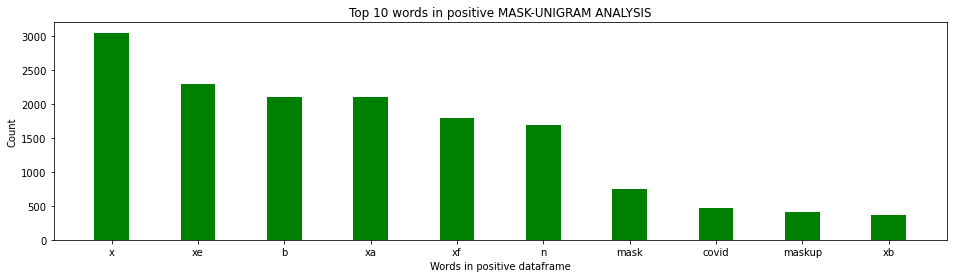

In [87]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive MASK-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

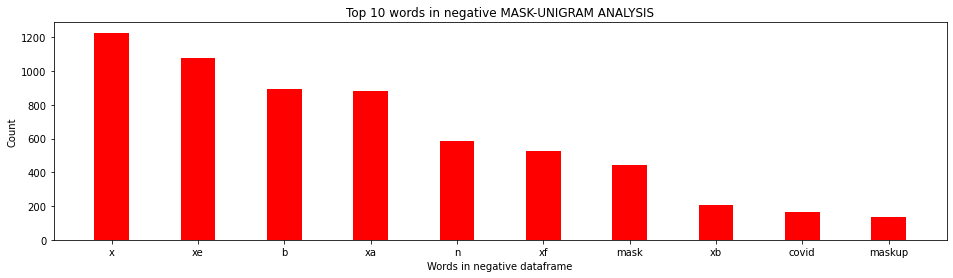

In [88]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative MASK-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

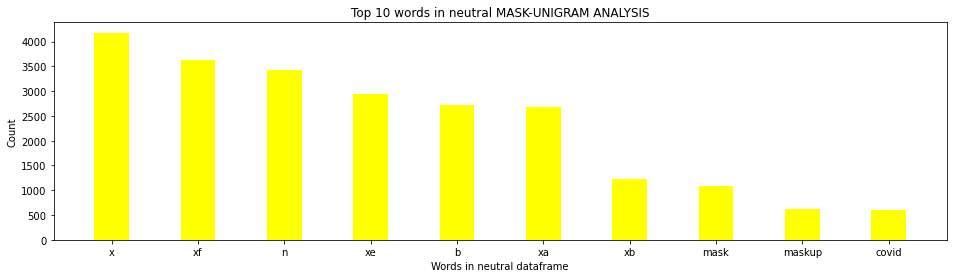

In [89]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral MASK-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [90]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [91]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['b', 'foxnow', 'got', 'keep', 'kids', 'masked', 'especially', 'young', 'ones', 'learn', 'read', 'emotions', 'se', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'make', 'skin', 'radiant', 'xf', 'xf', 'x', 'xd', 'xf', 'xf', 'x', 'xd', 'nif', 'want', 'use', 'free', 'please', 'dm', 'xf', 'xf', 'xa', 'xb', 'xf', 'xf', 'xa', 'xb', 'n', 'n', 'masks', 'eye', 'eyemasks', 'patches', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'please', 'get', 'runout', 'ur', 'life', 'wearamask', 'stay', 'safe', 'stay', 'indoors', 'please', 'want', 'get', 'back', 'normal', 'covid', 'mask', 'vaccine']
Sentence after removing stopwords: ['b', 'asset', 'maskusdtperp', 'nside', 'long', 'nlevel', 'high', 'risk', 'nprice', 'ntimeframe', 'n', 'ncaution', 'data', 'delaye', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'free', 'home', 'covid', 'tests', 'available', 'order', 'n', 'nget', 'vaccinated', 'maskup', 'xe', 'x', 'xa']
Sentence after removin

Sentence after removing stopwords: ['b', 'ebonycartermd', 'mfm', 'washuobgyn', 'highlighting', 'high', 'percentage', 'pregnant', 'patients', 'covid', 'maskup', 'vaccinate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'morning', 'well', 'xe', 'x', 'xs', 'finally', 'happened', 'b', 'gger', 'despite', 'best', 'efforts', 'caught', 'covid', 'oh', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'omicron', 'many', 'vintage', 'folk', 'lords', 'wealth', 'shields', 'covid', 'exposure', 'death', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'much', 'middle', 'know', 'everybody', 'ready', 'done', 'xe', 'x', 'x', 'well', 'xe', 'x', 'x', 'virus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'nopera', 'lebody', 'led', 'professional', 'homerapy', 'facial', 'mask', 'face', 'neck', 'tamanu', 'calming', 'buybest', 'n', 'opera', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yve

Sentence after removing stopwords: ['b', 'good', 'morning', 'peeps', 'n', 'antiqueclique', 'n', 'followvintage', 'n', 'antiquesaregreen', 'xe', 'x', 'xbb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xa', 'nit', 'new', 'week', 'happymonday', 'xe', 'x', 'xba', 'xef', 'xb', 'xf', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'yes', 'corona', 'positive', 'must', 'isolate', 'home', 'follow', 'guidelines', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'morning', 'rebels', 'xf', 'xf', 'xc', 'x', 'ntoday', 'grateful', 'good', 'night', 'sleep', 'nwhat', 'grateful', 'today', 'n', 'positivethoughts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xe', 'hours', 'protection', 'people', 'wearing', 'fit', 'tested', 'n', 'respirators', 'n', 'n', 'xe', 'xa', 'xa', 'xef', 'xb', 'xf', 'comparing', 'n', 'xf', 'xf', 'x', 'xb', 'cloth', 'mas', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rasmussenmed', 'gdd', 'wearamask', 'getvacc

Sentence after removing stopwords: ['b', 'loud', 'people', 'still', 'honking', 'horns', 'flutruxklan', 'ottawaconvoy', 'karenconvoy', 'wearamask', 'humanrights']
Sentence after removing stopwords: ['b', 'vaccines', 'covid', 'tests', 'available', 'university', 'health', 'center', 'keep', 'vaccine', 'records', 'date', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'friday', 'let', 'careful', 'n', 'nyou', 'look', 'good', 'mask', 'wearamask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'mask', 'xe', 'xd', 'xa', 'xe', 'xd', 'xa', 'n', 'buffythevampireslayer', 'darkwillow', 'mask']
Sentence after removing stopwords: ['b', 'maskup', 'advocates', 'schools', 'young', 'children', 'accidentally', 'fueling', 'antivaxxer', 'movement', 'stunting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tldr', 'new', 'florida', 'surgeon', 'general', 'refuses', 'wear', 'mask', 'even', 'meeting', 'immunocompromised', 'cancer', 'patients', 'xe', 'x', 'xa']
Sen

Sentence after removing stopwords: ['b', 'excellent', 'thread', 'dr', 'tmprowell', 'getvaccinated', 'amp', 'getboosted', 'need', 'continue', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nru', 'vaccinated', 'ndo', 'maskup', 'ndo', 'sociallydistance', 'nme', 'yes', 'nthem', 'nwho', 'cares', 'fine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'nhydraskincare', 'led', 'light', 'photon', 'face', 'neck', 'mask', 'rejuvenation', 'skinrapy', 'antiaging', 'us', 'buybest', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'checkout', 'covid', 'free', 'mask', 'mask', 'please', 'suppomy', 'redbubble', 'shop', 'retweeting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'york', 'gov', 'kathy', 'hochul', 'friday', 'announced', 'extension', 'state', 'xe', 'x', 'xs', 'indoor', 'mask', 'mandate', 'feb', 'n']
Sentence after removing stopwords: ['b', 'good', 'morning', 'xe', 'x', 'x', 'xe', 'x', 'x

Sentence after removing stopwords: ['b', 'dang', 'xf', 'xf', 'x', 'xad', 'n', 'ntoday', 'north', 'central', 'phd', 'reporting', 'another', 'new', 'covid', 'cases', 'latah', 'county', 'idaho', 'xf', 'xf', 'x', 'x', 'n', 'nthis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hi', 'everyone', 'n', 'ni', 'hope', 'enjoying', 'sunday', 'afternoon', 'n', 'nat', 'faceclays', 'hq', 'packing', 'orders', 'smallbusinessowner', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gt', 'gt', 'gt', 'custom', 'face', 'masks', 'nshoutout', 'brand', 'great', 'zoom', 'meetings', 'social', 'media', 'pages', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'took', 'risk', 'bless', 'xe', 'x', 'xall', 'xe', 'x', 'xs', 'timeline', 'beardedchocolate', 'lol', 'long', 'days', 'take', 'selfies', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kirnade', 'yveerangnayen', 'nitiaayog', 'great', 'volunteers', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', '

Sentence after removing stopwords: ['b', 'good', 'people', 'give', 'blood', 'save', 'others', 'need', 'irresponsible', 'people', 'xc', 'xbt', 'want', 'wear', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'excellent', 'thread', 'parents', 'young', 'ones', 'ineligible', 'vaccination', 'edge', 'become', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'light', 'pink', 'white', 'lace', 'face', 'mask', 'cotton', 'jersey', 'layer', 'bridal', 'wedding', 'face', 'mask', 'handmade', 'cloth', 'mout', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'days', 'ago', 'carpool', 'kid', 'tested', 'covid', 'positive', 'couple', 'hours', 'driving', 'three', 'us', 'always', 'wear', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'comments', 'follow', 'xe', 'x', 'xaall', 'inspiring', 'n', 'vaccineswork', 'n', 'maskup', 'n', 'followthescience']
Sentence after removing stopwords: ['b', 'thoughts

Sentence after removing stopwords: ['b', 'repstefanik', 'respectful', 'people', 'wear', 'masks', 'indoors', 'global', 'pandemic', 'repstefanikcovidiot', 'maskup', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cnn', 'expensive', 'superbowllvi', 'souvenir', 'mask', 'ever', 'lol', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xf', 'xbd', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'xa', 'xb', 'xf', 'xf', 'xf', 'xbd', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'maskup']
Sentence after removing stopwords: ['b', 'happy', 'republicday', 'everyone', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'x', 'xf', 'n', 'nwear', 'mask', 'nget', 'vaccinated', 'nlet', 'us', 'together', 'strengthen', 'india', 'xe', 'x', 'xs', 'determinatio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bright', 'paisley', 'face', 'mask', 'filter', 'pocket', 'green', 'brown', 'emerald', 'oriental', 'cloth', 'washable', 'facemask', 'xe', 'x', 'xa']
Sentence after removing stopwords

Sentence after removing stopwords: ['b', 'hi', 'drop', 'new', 'nft', 'objktcom', 'bonus', 'check', 'link', 'mask', 'masker', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'damages', 'brain', 'many', 'ways', 'even', 'mild', 'cases', 'want', 'even', 'infection', 'much', 'less', 'repeated', 'ones', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'company', 'works', 'actively', 'trains', 'employees', 'promote', 'safe', 'healthy', 'work', 'processes', 'n', 'n', 'digital', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaxup', 'maskup', 'deathsantis', 'matter', 'donor', 'making', 'money', 'desantis', 'says', 'newly', 'revoked', 'antibody', 'tre', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'deathsantis', 'freedumb', 'floriduh', 'free', 'die', 'florida', 'florida', 'covid', 'update', 'high', 'seven', 'day', 'average', 'deaths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'reminder', 'head', 'weekend', 'xf', 'xf', '

Sentence after removing stopwords: ['b', 'moorepublicsch', 'continued', 'decent', 'humane', 'responsible', 'decision', 'require', 'masks', 'maskup', 'wearamask']
Sentence after removing stopwords: ['b', 'incredible', 'mask', 'vehicles', 'box', 'xf', 'xf', 'x', 'xd', 'xf', 'xf', 'xa', 'xb', 'mask', 'mobile', 'armored', 'strike', 'kommand', 'originally', 'kenner', 'acquired', 'hasbro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ayeeeee', 'issa', 'new', 'week', 'xf', 'xf', 'xd', 'xbe', 'xf', 'xf', 'xa', 'xb', 'n', 'n', 'xf', 'xf', 'x', 'xaa', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'omo', 'ope', 'asakemusik', 'n', 'olamide', 'n', 'n', 'motivationmonday', 'breakfastinthecity', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'monday', 'sport', 'xe', 'x', 'xa', 'xe', 'x', 'xarafa', 'wins', 'race', 'slams', 'five', 'hour', 'classic', 'xe', 'x', 'xa', 'rafa', 'xe', 'x', 'xs', 'goat', 'buster', 'xe', 'x', 'xa', 'xe', 'x', 'xafrank', 'makes', 'xe', 'x', 'xa']
Sentence after

Sentence after removing stopwords: ['b', 'sure', 'maybe', 'mask', 'see', 'nose', 'still', 'see', 'hairy', 'ears', 'n', 'n', 'grooming', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tsnsports', 'wearing', 'mask', 'presser', 'nobody', 'wants', 'get', 'covid', 'miss', 'superbowl', 'wearamask']
Sentence after removing stopwords: ['b', 'many', 'bell', 'ends', 'gna', 'still', 'wear', 'face', 'nappy', 'xe', 'x', 'xs', 'thursday', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'mask', 'covid', 'maskmandate']
Sentence after removing stopwords: ['b', 'croneriffic', 'wontcavedave', 'year', 'old', 'great', 'granddaughter', 'covid', 'sick', 'baby', 'girl', 'please', 'getvaccinated', 'maskup']
Sentence after removing stopwords: ['b', 'potus', 'know', 'creator', 'vax', 'warned', 'us', 'kill', 'get', 'jabbed', 'right', 'would', 'america', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'senatorbern', 'transportation', 'go', 'pharmacy', 'pick', 'free', 'n', 'm

Sentence after removing stopwords: ['b', 'xe', 'x', 'xm', 'registered', 'mstamich', 'conference', 'march', 'lansing', 'excited', 'shareonlyscience', 'excited', 'learn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'wearing', 'stylish', 'fun', 'high', 'protection', 'mask', 'actually', 'breathe', 'easily', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'good', 'handle', 'today', 'learn', 'yesterday', 'amp', 'try', 'hold', 'tightly', 'piggybackpositivity', 'blm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'please', 'understand', 'mild', 'mean', 'mild', 'certain', 'could', 'life', 'ending', 'disease', 'bee', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'would', 'useful', 'information', 'time', 'past', 'years', 'thanks', 'posting', 'mask', 'masking', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wearing', 'n', 'finally', 'admit', 'cloth', 'masks', 'comfortable', 'strangenewworld', 'stayingsafe', 'maskup']
Senten

Sentence after removing stopwords: ['b', 'let', 'find', 'something', 'positive', 'nigtmare', 'shall', 'international', 'travel', 'expored', 'local', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'brenda', 'vibrantankles', 'atensnut', 'mask', 'vax', 'working', 'great', 'thank']
Sentence after removing stopwords: ['b', 'nice', 'see', 'vast', 'majority', 'people', 'continuing', 'wear', 'mask', 'supermarket', 'today', 'restrictions', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'print', 'turn', 'work', 'details', 'paint', 'look', 'fantastic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcwhile', 'omicron', 'curve', 'shot', 'quickly', 'one', 'month', 'ago', 'starting', 'downward', 'fall', 'pressure', 'yet', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'north', 'central', 'phd', 'reporting', 'new', 'covid', 'cases', 'latah', 'county', 'idaho', 'xf', 'xf', 'x', 'xad', 'n', 'nwe', 'xe', 'x', 'xre', 'xe', 'x', 'xc

Sentence after removing stopwords: ['b', 'enough', 'knowledge', 'stay', 'safe', 'prevent', 'illness', 'knowledge', 'must', 'utilized', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'safe', 'protect', 'orher', 'also', 'n', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'xf', 'xf', 'x', 'xb', 'probably', 'effective', 'tool', 'fight', 'omicron']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xve', 'wallafor', 'years', 'purchased', 'first', 'time', 'went', 'mexico', 'family', 'lived', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'flicks', 'good', 'half', 'squidgyone', 'cineworld', 'looking', 'forward', 'belfastmovie', 'maskup']
Sentence after removing stopwords: ['b', 'picking', 'right', 'face', 'covering', 'could', 'difference', 'loved', 'ones', 'getting', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'funko', '

Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'great', 'teachings', 'saint', 'dr', 'gurmeetramrahim', 'singh', 'ji', 'insan', 'n', 'derasachasauda', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'morning', 'rebels', 'xf', 'xf', 'xc', 'x', 'ntoday', 'grateful', 'multiple', 'creative', 'outlets', 'nwhat', 'grateful', 'today', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'morning', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'memphis', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'xd', 'xa', 'xf', 'xf', 'xa', 'xae', 'getvaccinated', 'getboosted', 'xf', 'xf', 'x', 'x', 'maskup', 'xf', 'xf', 'x', 'xb']
Sentence after removing stopwords: ['b', 'continue', 'wearamask', 'pleased', 'see', 'people', 'train', 'mask', 'nd', 'train', 'full', 'college', 'stud', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'man', 'xc', 'xbs', 'best', 'friend', 'amp', 'covid', 'confurm', 'animal', 'trashpanda', 'together', 'one', 'photo', 'raccoon'

Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'well', 'done', 'team', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'x', 'xc', 'nthe', 'great', 'good', 'work', 'one', 'another', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'smiley', 'face', 'flowers', 'face', 'mask', 'smile', 'facemask', 'mask', 'staysafe', 'giftthema', 'wearablea', 'cute', 'funny']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'fit', 'healthy', 'body', 'xe', 'x', 'x', 'best', 'fashion', 'statement', 'youthveerangnayen', 'n', 'corona', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'london', 'great', 'plague', 'killed', 'k', 'months', 'public', 'entertainment', 'banned', 'victims', 'locked', 'homes', 'bu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'patrice', 'murciano', 'canvas', 'murciano', 'mystery', 'mask', 'ready', 'hang', 'canvas', 'choice', 'size']
Sentence after removing stopwords: ['b', 'careful', 'aware', 'n', 'cctv', 'security', '

Sentence after removing stopwords: ['b', 'look', 'free', 'stuff', 'xe', 'x', 'xt', 'worry', 'numbers', 'president', 'said', 'xe', 'x', 'xd', 'shut', 'xe', 'x', 'xs', 'giving', 'stuff', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stylish', 'sad', 'girls', 'nft', 'forget', 'miny', 'free', 'skeleton', 'sadgirls', 'crypto', 'nft', 'mask']
Sentence after removing stopwords: ['b', 'buffalovemom', 'another', 'good', 'reason', 'wearamask', 'n', 'nif', 'xe', 'x', 'xt', 'sure', 'know', 'maybe', 'even', 'say', 'hi', 'xf', 'xf', 'x', 'x', 'n', 'introvertproblems']
Sentence after removing stopwords: ['b', 'hollybriden', 'xe', 'x', 'xt', 'actually', 'good', 'thing', 'kids', 'spread', 'germs', 'therefore', 'spread', 'covid', 'say', 'put', 'lock', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hi', 'missmaipeloyaya', 'kindly', 'note', 'dm', 'responded', 'bn', 'maskup']
Sentence after removing stopwords: ['b', 'blanarovich', 'mattheinzmd', 'safeway', 'walgreens', 'lol', 'true

Sentence after removing stopwords: ['b', 'yveerangnayen', 'best', 'way', 'provide', 'information', 'corona', 'crisis', 'well', 'done', 'youthveerangnaye', 'n', 'awarenesscampaigns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'asahutchinson', 'beprobeproudar', 'chosen', 'representative', 'isnt', 'responsible', 'thousands', 'arkan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'martymckee', 'amazing', 'think', 'difference', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'bluemaga', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'triple', 'moon', 'face', 'mask', 'pagan', 'wicca', 'magic', 'symbols', 'goddess', 'jersey', 'printed', 'handmade', 'face', 'mask', 'reusable', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'artist', 'abstract', 'geometric', 'symbolism', 'perspectivism', 'lifestyle', 'prints', 'panoply', 'levens', 'nice', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tapstimz', 'good', 'morning', 'activated', 'account', 

Sentence after removing stopwords: ['b', 'mediaite', 'happy', 'masked', 'would', 'happy', 'two', 'good', 'coach', 'lead', 'example', 'maskup', 'maskmandates', 'covidiot']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'npcs', 'face', 'mask', 'disposable', 'face', 'blue', 'adult', 'home', 'office', 'man', 'woman', 'blue', 'topfanscorner', 'n', 'pcs', 'face', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'hits', 'family', 'make', 'sure', 'xe', 'x', 'xt', 'happen', 'thanks', 'aboutkp', 'keeping', 'us', 'safe', 'maskup']
Sentence after removing stopwords: ['b', 'nftluffy', 'hi', 'drop', 'new', 'nft', 'objktcom', 'bonus', 'check', 'link', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'shrewsbury', 'town', 'centre', 'shops', 'full', 'mask', 'wearers', 'even', 'plenty', 'outside', 'people', 'frightened', 'swal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'promise', 'trying', 'spam', 'much', '

Sentence after removing stopwords: ['b', 'loved', 'bothy', 'restaurant', 'bothyglasgow', 'foodphotography', 'foodie', 'glasgow', 'haggisneepsandtatties', 'porkbelly', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ausopen', 'mask', 'rule', 'dropped', 'women', 'finals', 'lots', 'folks', 'wearing', 'much', 'en', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'listen', 'teachers', 'temporary', 'virtual', 'options', 'available', 'call', 'governor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'john', 'stockton', 'basketball', 'great', 'season', 'tickets', 'suspended', 'refusing', 'wear', 'mask', 'maskup', 'covid', 'choices']
Sentence after removing stopwords: ['b', 'wait', 'xe', 'x', 'xa', 'xe', 'x', 'xs', 'inspiring', 'patients', 'see', 'value', 'freespirits', 'understand', 'xe', 'x', 'xt', 'need', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'iamspurs', 'agree', 'day', 'still', 'ntriple', 'vaccinated', 'adults', 'single', 'jab', 

Sentence after removing stopwords: ['b', 'wearing', 'rubber', 'gloves', 'mask', 'still', 'gets', 'pregnant', 'xf', 'xf', 'xa', 'xb', 'xf', 'xf', 'xf', 'xbfthe', 'baby', 'likely', 'end', 'looking', 'like', 'batman']
Sentence after removing stopwords: ['b', 'friend', 'let', 'try', 'leather', 'spooky', 'mask', 'damn', 'cool', 'n', 'n', 'mask', 'gothicgirl']
Sentence after removing stopwords: ['b', 'navy', 'blue', 'face', 'mask', 'blue', 'white', 'old', 'norse', 'knit', 'pattern', 'reusable', 'washable', 'mouth', 'cover', 'handmade', 'knit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'talking', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'nwe', 'need', 'lots', 'things', 'together', 'make', 'safe', 'future', 'buc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'rajasthan', 'nth', 'jan', 'covid', 'pm', 'bulletin', 'n', 'nplz', 'keep', 'maskup', 'xf', 'xf', 'x', 'xb', 'amp', 'staysafe', 'n', 'n', 'positive', 'case', 'xe', 'x', 'xa']
Sentence af

Sentence after removing stopwords: ['b', 'nice', 'see', 'many', 'people', 'continuing', 'wear', 'masks', 'southrailway', 'morning', 'despite', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ca', 'oneunderscore', 'pfizer', 'achatweets', 'glad', 'entertain', 'keeps', 'others', 'timelines', 'spewi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'balinese', 'indonesian', 'rare', 'monkey', 'wood', 'mask', 'hand', 'carved', 'wall', 'hanging', 'folk', 'indonesiamask', 'balinesemask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tonight', 'ntonight', 'st', 'fellowship', 'meeting', 'going', 'good', 'time', 'lord', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'simple', 'mardigras', 'mask', 'makeup', 'n', 'mehronmakeup', 'clown', 'white', 'n', 'bobuggles', 'face', 'paint', 'kit', 'n', 'bowitzkis', 'professional', 'fa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bright', 'paisley', 'face', 'mask', 'filter', 'pocket', 'oran

Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'really', 'great', 'job', 'keep', 'n', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'terminator', 'would', 'try', 'use', 'python', 'knowledge', 'reprogram', 'titular', 'villain', 'solely', 'atta', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xci', 'fine', 'xe', 'x', 'xd', 'like', 'mask', 'pal', 'n', 'n', 'mask', 'wearamask', 'facemask', 'ghostface', 'killer', 'scream', 'screammovie', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'time', 'mask', 'coming', 'back', 'gyms', 'need', 'mask', 'get', 'cool', 'mask', 'supposba', 'blues', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'omicron', 'russia', 'new', 'record', 'daily', 'cases', 'germany', 'new', 'cases', 'single', 'day', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jimsciutto', 'reminder', 'covid', 'vaccines', 'developed', 'scien

Sentence after removing stopwords: ['b', 'yveerangnayen', 'yes', 'right', 'n', 'covid', 'n', 'youthveerangnayen', 'n', 'masks', 'n', 'nitiaayog', 'n', 'maskupindia', 'n', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hoping', 'see', 'numbers', 'low', 'shitty', 'job', 'azdhs', 'cute', 'pics', 'maskup', 'ducey', 'requi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stay', 'fresh', 'dry', 'warm', 'wear', 'mask', 'n', 'paand', 'shift', 'endemic', 'brings', 'smile', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'weekend', 'free', 'tasting', 'primoliquors', 'one', 'attend', 'broward', 'fortlauderdale', 'southflorida', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'best', 'way', 'prevent', 'getting', 'infected', 'omicron', 'variant', 'covid', 'get', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cup', 'overflowing', 'dont', 'stadrinking', 'saucer', 'instead', 'happiness', 'knowledge', 'share

Sentence after removing stopwords: ['b', 'judithm', 'mjosling', 'ottawapolice', 'ctvnews', 'cbcnews', 'many', 'police', 'anti', 'vaccine', 'never', 'mind', 'anti', 'proo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccines', 'available', 'lagoon', 'hospitals', 'safe', 'effective', 'n', 'ntake', 'ownership', 'safety', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hopefully', 'wa', 'follow', 'vic', 'early', 'covid', 'strategy', 'contain', 'lockdowns', 'masks', 'vaxx', 'social', 'distance', 'k', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'push', 'keep', 'rising', 'xe', 'x', 'xa', 'price', 'usd', 'xe', 'x', 'xa', 'sharing', 'pushing', 'n', 'n', 'xe', 'x', 'xa', 'real', 'time', 'cryptocurrency', 'trends', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'fabulous', 'humanity', 'work', 'xe', 'xd', 'xa', 'n', 'awarenesscampaigns', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 

Sentence after removing stopwords: ['b', 'xe', 'x', 'xa', 'nytimes', 'xe', 'x', 'xa', 'americans', 'adopted', 'irrational', 'covid', 'beliefs', 'many', 'allowing', 'partisanship', 'influence', 'beliefs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'great', 'humanity', 'work', 'coronavirus', 'maskup', 'saintgurmeetramrahimji']
Sentence after removing stopwords: ['b', 'youth', 'demanding', 'open', 'amp', 'safe', 'schools', 'xe', 'x', 'xcthe', 'pandemic', 'ignited', 'new', 'chapter', 'activism', 'among', 'students', 'cali', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'monday', 'today', 'exchange', 'rates', 'dailyexchangerates', 'bosl', 'allthebankyouneed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'always', 'follow', 'rules', 'safe', 'world', 'spread', 'awareness', 'regarding', 'covid', 'youth', 'veera', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'amp', 'warm',

Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'great', 'going', 'ur', 'efforts', 'limitless', 'n', 'awarenesscampaigns', 'n', 'covidappropriatebehaviour', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'really', 'great', 'job', 'keep', 'n', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sbernsteinmd', 'hi', 'diagnosed', 'stage', 'iii', 'breast', 'cancer', 'look', 'healthy', 'chemo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'zero', 'cases', 'covid', 'maskup', 'nit', 'risky', 'knowing', 'many', 'anti', 'vaxxers', 'stopped', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remember', 'n', 'nif', 'doubt', 'n', 'ndon', 'go', 'n', 'ncontinue', 'practice', 'social', 'distancin', 'measures', 'n', 'nand', 'keep', 'washin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looks', 'familiar', 'many', 'ways', 'n', 'actarus', 'goldrake', '

Sentence after removing stopwords: ['b', 'eyes', 'mask', 'xe', 'x', 'xa', 'price', 'usd', 'n', 'n', 'xe', 'x', 'xa', 'real', 'time', 'cryptocurrency', 'trends', 'xe', 'x', 'xa', 'n', 'n', 'xe', 'x', 'xa', 'mask', 'markets', 'ncrypto', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'michael', 'avenatti', 'says', 'courtroom', 'mask', 'mandate', 'infringes', 'constitutional', 'right', 'face', 'accuser', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'banger', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'ni', 'wear', 'mask', 'smile', 'hours', 'time', 'nstare', 'ceiling', 'hold', 'back', 'mind', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'interesting', 'us', 'federal', 'coudecision', 'pennsylvania', 'mask', 'policy', 'could', 'impact', 'students', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'emmajourno', 'lucky', 'shield', 'day', 'shielded', 'winter', 'personal', 'reasons', 'xe', 'x', 'xa']
Sentence after removin

Sentence after removing stopwords: ['b', 'sandiego', 'often', 'see', 'kids', 'walking', 'around', 'outside', 'frequently', 'wearing', 'masks', 'child', 'abu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nice', 'work', 'done', 'really', 'sweet', 'efforts', 'stop', 'spreading', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'clear', 'maskup', 'aclaramask']
Sentence after removing stopwords: ['b', 'sunshinekas', 'justintrudeau', 'sure', 'n', 'xf', 'xf', 'xa', 'xa', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'n', 'vaccineswork', 'vaxup', 'maskup', 'cdnpoli', 'canada', 'covid', 'covidiots', 'bbqanon', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'first', 'outing', 'since', 'th', 'xe', 'x', 'xa', 'thought', 'flu', 'ended', 'covid', 'even', 'fully', 'vaxxed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'safe', 'mask', 'mask', 'maskup', 'butchgrimes', 'sherrilri', 'covidmasksewing', 'eux', 

Sentence after removing stopwords: ['b', 'happy', 'everybody', 'whiskeytangofoxtrot', 'nobodiesfaultbutmine', 'sleepwhendead', 'blissninny', 'benotafraid', 'lovemylife', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'silken', 'windhound', 'wispy', 'silken', 'adult', 'cloth', 'face', 'mask', 'via', 'zazzle', 'pawsinprofile', 'dog', 'dogs', 'maskup', 'masks']
Sentence after removing stopwords: ['b', 'officialtracieb', 'love', 'mask', 'tracie', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xdbest', 'michael', 'x']
Sentence after removing stopwords: ['b', 'take', 'away', 'gloomy', 'mask', 'tragedy', 'smile', 'maskking', 'smile', 'officialmaskking', 'manysmilesmakeagoodday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'important', 'xe', 'x', 'xt', 'matter', 'mild', 'covid', 'neighbor', 'xe', 'x', 'xs', 'brother', 'xe', 'x', 'xs', 'cousin', 'let', 'xe', 'x', 'xs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog'

Sentence after removing stopwords: ['b', 'cloth', 'mask', 'good', 'enough', 'keep', 'covid', 'bay', 'think', 'twice', 'n', 'n', 'mask', 'clothmask', 'covid', 'yespunjab', 'n', 'n']
Sentence after removing stopwords: ['b', 'state', 'mask', 'mandate', 'new', 'york', 'let', 'hope', 'one', 'gets', 'infected', 'virus', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'violin', 'concerto', 'beethoven', 'starter', 'live', 'concefeels', 'like', 'coming', 'home', 'xf', 'xf', 'xe', 'xbb', 'xf', 'xf', 'xe', 'xbc', 'furthermore', 'felt', 'safe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'adult', 'child', 'sized', 'face', 'masks', 'bandanas', 'featuring', 'artwork', 'allows', 'maskup', 'style']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xb', 'x', 'individuals', 'tested', 'positive', 'covid', 'federal', 'capital', 'tests', 'conducted', 'healt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'derasachasauda', 'volunteers', 'panchkula', 'haryana'

Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'incredible', 'work', 'done', 'derasachasauda', 'volunteers', 'inspiration', 'saint', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'npriori', 'skincare', 'unveiled', 'led', 'mask', 'fda', 'cleared', 'professional', 'lightrapy', 'facial', 'silicone', 'mask', 'buybest', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'may', 'able', 'get', 'free', 'n', 'mask', 'heb', 'pharmacies', 'beginning', 'today', 'paof', 'biden', 'administrat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'checkout', 'covid', 'free', 'mask', 'mask', 'please', 'suppomy', 'redbubble', 'shop', 'retweeting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'germs', 'travel', 'feet', 'surfaces', 'new', 'covid', 'pandemic', 'variant', 'everyday', 'nmake', 'sure', 'wear', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'see', 'one', 

Sentence after removing stopwords: ['b', 'rubenstein', 'wear', 'mask', 'n', 'n', 'fauci', 'lt', 'laugh', 'gt', 'avoid', 'paranoid', 'aspects', 'something', 'positive', 'go', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'grandson', 'great', 'grandson', 'founder', 'soviet', 'rocket', 'industry', 'sergei', 'korolev', 'andrei', 'korolev', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sbernsteinmd', 'beloved', 'autoimmune', 'disease', 'almost', 'killed', 'years', 'ago', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'great', 'volunteers', 'youthveerangnayen', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'n', 'getvaccinated', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'best', 'friends', 'living', 'long', 'haul', 'covid', 'n', 'nit', 'xe', 'x', 'xs', 'joke', 'folks', 'n', 'nit', 'xe', 'x', 'xs', 'destroying', 'life', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'join', 'maskup'

Sentence after removing stopwords: ['b', 'making', 'kids', 'wear', 'masks', 'grown', 'ups', 'get', 'free', 'n', 'n', 'mask', 'masking', 'vaccine', 'covid']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'mask', 'important', 'days', 'good', 'social', 'work', 'n', 'maskupindia', 'n', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enforcement', 'update', 'last', 'hrs', 'dtd', 'rayagadapolice', 'collected', 'rs', 'fine', 'traffic', 'defaul', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'got', 'free', 'govt', 'sponsored', 'covidtesting', 'week', 'ordered', 'tucson', 'getvaccinatedandboosted', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'govkathyhochul', 'says', 'nys', 'pursue', 'every', 'option', 'reverse', 'monday', 'ruling', 'state', 'judge', 'striking', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kolkatapolice', 'making', 'mask', 'awareness', 'fun', 'memes', 'funny', 'videos', 'n', 'n', 'spottedonsocialmedia

Sentence after removing stopwords: ['b', 'book', 'behavior', 'spreads', 'damoncentola', 'xf', 'xf', 'x', 'xd', 'covid', 'pandemic', 'spreads', 'fast', 'wearamask', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'make', 'mask', 'wearing', 'fun', 'practice', 'makes', 'perfect', 'let', 'work', 'together', 'model', 'safe', 'mask', 'looks', 'like', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xd', 'xf', 'xf', 'xf', 'xbe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'best', 'investment', 'ever', 'make', 'health', 'vaccinationcamps', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yahoonews', 'evolution', 'warp', 'speed', 'ndarwin', 'right', 'n', 'n', 'getvaccinated', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'n', 'wearamask', 'xf', 'xf', 'x', 'xb', 'n', 'covid', 'xe', 'x', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'meanwhile', 'many', 'tea

Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccination', 'important', 'remain', 'safe', 'covid', 'vaccinate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'spanswicktweets', 'still', 'wearing', 'mask', 'figures', 'showing', 'true', 'covid', 'numbers', 'pcrtest', 'limited', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'virginia', 'n', 'covid', 'maskmandates', 'maskup', 'via', 'abajournal']
Sentence after removing stopwords: ['b', 'powerful', 'reduce', 'wrinkles', 'fine', 'lines', 'firm', 'eye', 'area', 'xf', 'xf', 'x', 'xd', 'n', 'masks', 'eye', 'eyemasks', 'patches', 'mask', 'girl', 'women', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'finally', 'achieved', 'visual', 'parity', 'style', 'nblender', 'best', 'experimental', 'visual', 'development', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'xe', 'xb', 'name', 'love', 'n', 'n', 'beberexha', 'martingar

Sentence after removing stopwords: ['b', 'dark', 'circle', 'enlightener', 'xf', 'xf', 'x', 'xb', 'n', 'nthe', 'active', 'k', 'gold', 'ability', 'expel', 'harmful', 'toxins', 'significantly', 'hydrate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'xef', 'xb', 'xfrotherham', 'newsupdates', 'vaccination', 'centres', 'open', 'today', 'staff', 'volunteers', 'ready', 'look', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'american', 'eskimodog', 'facemask', 'unique', 'animal', 'aprinted', 'front', 'washable', 'hot', 'water', 'reusable', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'edinburgh', 'live', 'weather', 'staysafe', 'wearamask']
Sentence after removing stopwords: ['b', 'making', 'sure', 'toys', 'get', 'covid', 'maskup']
Sentence after removing stopwords: ['b', 'axios', 'apple', 'testing', 'ability', 'use', 'face', 'id', 'wearing', 'mask', 'paof', 'new', 'developer', 'beta', 'software', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'india', 'reports', 'new', 'covid', 'cases', 'deaths', 'recoveries', 'last', 'hours', 'n', 'nactive', 'case', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'promote', 'wearing', 'mask', 'vaccinate', 'yes', 'illness', 'might', 'mild', 'want', 'prevent', 'spread', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covidjapan', 'n', 'n', 'covid', 'many', 'months', 'nand', 'developed', 'rich', 'nation', 'japan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'excited', 'share', 'item', 'etsy', 'shop', 'kn', 'face', 'mask', 'cover', 'kn', 'mask', 'included', 'disposable', 'kn', 'face', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'drawing', 'definitely', 'fits', 'sound', 'xf', 'xf', 'x', 'xaf', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'x', 'xb', 'maskup']
Sentence after removing stopwords: ['b', 'loving', 'awesome', 'custom', 'funko', 'pop', 'mask', 'hopefully', 'official', 'ones', 'sometime', 'xe', 'x', 'xa']
S

Sentence after removing stopwords: ['b', 'ayeeeee', 'issa', 'new', 'week', 'xf', 'xf', 'xd', 'xbe', 'xf', 'xf', 'xa', 'xb', 'n', 'n', 'xf', 'xf', 'x', 'xaa', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'fan', 'deejayneptune', 'n', 'lojaymusic', 'n', 'zlatanibile', 'n', 'n', 'motivationmonday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'let', 'pledge', 'keep', 'responsible', 'behaviour', 'stay', 'committed', 'republic', 'mumbai', 'n', 'n', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cdcdirector', 'variation', 'omicron', 'fast', 'coming', 'already', 'uk', 'n', 'maskup', 'n', 'getvaccinatednow', 'n', 'getboostednow']
Sentence after removing stopwords: ['b', 'according', 'cdc', 'masks', 'offer', 'best', 'protection', 'covid', 'n', 'kn', 'masks', 'able', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'welcome', 'come', 'join', 'us', 'starting', 'pm', 'info', 'fly', 'bless', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'xf', 'xbd', 'xe', 'xd', 'xa', 'xef', '

In [92]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['b', 'two', 'really', 'difficult', 'years', 'disaster', 'appeared', 'please', 'get', 'vaccinated', 'get', 'booster', 'wear', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'balinese', 'wood', 'mask', 'green', 'singh', 'barong', 'carving', 'indonesian', 'wall', 'ahanging', 'barong', 'singh', 'mask', 'balinese', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tryhardbruins', 'ottawajoe', 'cmckenney', 'ottawapolice', 'one', 'xe', 'x', 'xcfighting', 'freedom', 'xe', 'x', 'xd', 'mean', 'sorry', 'xe', 'x', 'xc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'monday', 'xf', 'xf', 'xa', 'xb', 'let', 'drink', 'xe', 'x', 'x', 'xf', 'xf', 'xd', 'xb', 'together', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'spiritual', 'league', 'n', 'weak', 'let', 'somebody', 'put', 'something', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'birthday', 'birthdaygirl', 'butterfly

Sentence after removing stopwords: ['b', 'dougducey', 'failure', 'anti', 'mask', 'anti', 'vax', 'idiots', 'selfish', 'assholes', 'n', 'n', 'alsmichelle', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'people', 'freak', 'others', 'wearing', 'mask', 'ever', 'think', 'may', 'overreacted', 'little', 'bit']
Sentence after removing stopwords: ['b', 'hjwoof', 'suzeqknits', 'wife', 'runs', 'childcare', 'center', 'double', 'masked', 'still', 'wears', 'mask', 'babysitter', 'n', 'respect']
Sentence after removing stopwords: ['b', 'everything', 'stop', 'spread', 'infectious', 'disease', 'could', 'destroy', 'life', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'sale', 'sales', 'teepublic', 'teepublic', 'tshirt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'f', 'french', 'face', 'mask', 'black', 'linen', 'silver', 'print', 'face', 'mask', 'swearwords', 'breathable', 'handmade', 'cloth', 'xe', 'x', 'xa']
Sente

Sentence after removing stopwords: ['b', 'healthydog', 'wildfire', 'smoke', 'using', 'air', 'filter', 'mask', 'dog', 'serious', 'smoke', 'ash', 'soot', 'wil', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'plain', 'terms', 'get', 'reinfected', 'omicron', 'get', 'covidvaccine', 'get', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'govkathyhochul', 'keeps', 'children', 'masked', 'xe', 'x', 'xs', 'wrong', 'picture', 'maskup', 'newyork']
Sentence after removing stopwords: ['b', 'finished', 'xe', 'x', 'xs', 'yandere', 'xe', 'x', 'xm', 'hoping', 'make', 'lil', 'comic', 'xe', 'x', 'xs', 'crazy', 'let', 'kno', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rentmeistermarc', 'marc', 'yes', 'exactly', 'think', 'almost', 'losses', 'unnecessary', 'done', 'common', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'left', 'health', 'care', 'workers', 'exhausted', 'heartbroken', 'heartbroken', 'caring', 'patients', 'xe', 'x', 'xa']
Sentence after removing 

Sentence after removing stopwords: ['b', 'fuck', 'face', 'mask', 'gray', 'cotton', 'printed', 'face', 'mask', 'reusable', 'washable', 'mouth', 'cover', 'avantgarde', 'facemask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'question', 'screeching', 'continuing', 'wear', 'mask', 'protect', 'vulnerable', 'p', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'got', 'bog', 'roll', 'bulk', 'enough', 'bedwetters', 'dry', 'eyes', 'announcement', 'masks', 'bein', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jannarden', 'never', 'thought', 'tough', 'trucker', 'wearing', 'mask', 'xf', 'xf', 'x', 'xb', 'vaxxed', 'work', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xm', 'sorry', 'day', 'man', 'woulda', 'shit', 'kicked', 'intestines', 'xe', 'x', 'xs', 'harassing', 'elderly', 'lib', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ayeeeee', 'issa', 'new', 'week', 'xf', 'xf', 'xd', 'xbe', 'xf', 'xf', 'xa', 'xb', 'n', 'n', 'xf', 'x

Sentence after removing stopwords: ['b', 'mask', 'two', 'kisses', 'collided', 'spring', 'green', 'lips', 'pattern', 'white', 'background', 'taiche', 'green', 'lips', 'lipstickkiss', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'question', 'etiquette', 'telling', 'fellow', 'passenger', 'put', 'mask', 'late', 'real', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cnn', 'maskup', 'care', 'exhausted', 'healthcare', 'workers', 'grandparents', 'friends', 'newborn', 'siblings', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kid', 'ever', 'killed', 'school', 'book', 'n', 'n', 'besafe', 'xf', 'xf', 'x', 'xe', 'n', 'bekind', 'xf', 'xf', 'x', 'xab', 'n', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'getvaccinated', 'xf', 'xf', 'xa', 'xb', 'n', 'getboostered', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whiskeywineabt', 'nathanielkristo', 'u', 'afraid', 'masks', 'n', 'n', 'vaccineswork', 'vaxup', 'maskup']
Sentence afte

Sentence after removing stopwords: ['b', 'kns', 'offer', 'protection', 'n', 'nfine', 'print', 'fake', 'n', 'mask', 'maskup']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'xe', 'xb', 'lonely', 'n', 'n', 'ayrastarr', 'n', 'n', 'uncensored', 'w', 'n', 'ttarra', 'n', 'n', 'lovetherapy', 'n', 'numberlifestylestation', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'roshanrinaldi', 'least', 'go', 'someone', 'deserves', 'n', 'getvaccinatednow', 'wearamask', 'slowthespread', 'social', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fans', 'game', 'yrs', 'covid', 'shit', 'seriously', 'xe', 'x', 'xs', 'reasoning', 'nhljets', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thatdmvginger', 'holychow', 'usually', 'avoid', 'chinese', 'food', 'kid', 'xe', 'x', 'xt', 'eat', 'gluten', 'accommo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nintendo', 'ds', 'xl', 'gray', 'black', 'console', 'mario', 'land', 'majora'

Sentence after removing stopwords: ['b', 'keith', 'richards', 'effing', 'indestructible', 'says', 'get', 'vaxxed', 'wear', 'mask', 'know', 'shit', 'serious', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'balinese', 'wooden', 'mask', 'black', 'rangda', 'hand', 'carved', 'indonesia', 'mythology', 'wall', 'hanging', 'barong', 'rangda', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'brainless', 'fuking', 'morons', 'shit', 'hole', 'party', 'actually', 'plan', 'listened', 'experts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wear', 'mask', 'nmasks', 'prevent', 'secondary', 'tertiary', 'infections', 'nyour', 'children', 'nand', 'protect', 'parents', 'n', 'n', 'coronavirus', 'n', 'mask', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'masks', 'debate', 'continues', 'pro', 'btw', 'late', 'thephoenixmag', 'thanks', 'pete', 'one', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thepaulgarrard', 'non', 'sequitur', 'wa

Sentence after removing stopwords: ['b', 'ksorbs', 'wtf', 'happening', 'nwhy', 'agreeing', 'n', 'n', 'mondayvibes', 'getvaccinated', 'wearamask', 'turntexasblue', 'betofortexas']
Sentence after removing stopwords: ['b', 'thank', 'everyone', 'watches', 'likes', 'amp', 'shares', 'show', 'beautifully', 'crazy', 'bastards', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lnterestang', 'misinformation', 'nmany', 'businesses', 'closed', 'protect', 'employees', 'n', 'vaccineswork', 'vaxup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thechiefnerd', 'akheriaty', 'listen', 'crazy', 'antivaxxers', 'antimaskers', 'amp', 'january', 'est', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hospice', 'rn', 'admitted', 'vaxed', 'boosted', 'gent', 'home', 'hospice', 'wednesday', 'passed', 'last', 'eve', 'days', 'late', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'sale', 'sales', 'teepublic', 'teepublic', '

Sentence after removing stopwords: ['b', 'wear', 'mask', 'uncomfortable', 'wear', 'mask', 'uncomfortable', 'intubation', 'tube', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nytimes', 'vaccine', 'remarkably', 'effective', 'preventing', 'serious', 'illness', 'xe', 'x', 'xachances', 'getting', 'sick', 'extremely', 'low', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dark', 'brown', 'floral', 'paisley', 'face', 'mask', 'cotton', 'mix', 'print', 'facemask', 'reusable', 'washable', 'sizes', 'nose', 'wire', 'opti', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jimjordan', 'xe', 'x', 'xs', 'wrong', 'mister', 'nurses', 'unvaccinated', 'doctors', 'maskup', 'endjordan', 'endtrump']
Sentence after removing stopwords: ['b', 'stealth', 'variant', 'late', 'mutation', 'omicron', 'detected', 'u', 'states', 'countries', 'much', 'hard', 'diagno', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'baltic', 'pagan', 'symbol', 'auseklis', 'black', 

Sentence after removing stopwords: ['b', 'xe', 'xa', 'xa', 'xe', 'xa', 'xa', 'mask', 'usdt', 'xe', 'xa', 'xa', 'xe', 'xa', 'xa', 'n', 'nsignal', 'type', 'long', 'nalgorithm', 'deltal', 'nentry', 'ntake', 'profit', 'nstop', 'n', 'n', 'mask', 'binance', 'trade', 'signals', 'long']
Sentence after removing stopwords: ['b', 'patterdude', 'xf', 'xf', 'xa', 'x', 'maskup', 'sick', 'provider', 'data', 'prove', 'work', 'virus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xb', 'xef', 'xb', 'xfis', 'everything', 'getting', 'dark', 'xf', 'xf', 'x', 'xb', 'xef', 'xb', 'xf', 'n', 'wait', 'n', 'share', 'retweet', 'n', 'dark', 'photography', 'oneshot', 'darka', 'black', 'full', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'third', 'wave', 'corona', 'pandemic', 'hitting', 'us', 'hard', 'youthveerangnaye', 'putting', 'every', 'effort', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'sad', 'ctdems', 'like', 'seanscan

Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'birthday', 'birthdaygirl', 'butterfly', 'floral', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'burkina', 'faso', 'ecowas', 'leaders', 'demand', 'immediate', 'return', 'constitutional', 'order', 'xe', 'x', 'xasuspends', 'country', 'military', 'coup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'courtney', 'hollow', 'says', 'wearamask', 'stayhome']
Sentence after removing stopwords: ['b', 'seriously', 'earnestly', 'youthepeople', 'especially', 'party', 'would', 'collectively', 'maskup', 'get', 'damn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stay', 'away', 'face', 'mask', 'black', 'cotton', 'printed', 'facemask', 'reusable', 'washable', 'mouth', 'cover', 'avantgarde', 'face', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oregon', 'weekend', 'maskless', 'chronicles', 'n', 'nyouth', 'hoops', 'game', 'xe', 'xc', 'x', 'nsubway', 'xe', 'xc', 'x', 'ns

Sentence after removing stopwords: ['b', 'covid', 'ever', 'end', 'n', 'n', 'nft', 'opensea', 'nfta', 'nftcommunity', 'nftartist', 'nftcollector', 'dirty', 'mask', 'sanitizer', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'created', 'life', 'mask', 'collectible', 'rarible', 'ethereum', 'nonfungible', 'digitalasset', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskswork', 'maskup', 'getvaccinatedandboosted', 'nwe', 'must', 'unite', 'end', 'deadly', 'virus', 'save', 'lives', 'n', 'xe', 'xac', 'x', 'xef', 'xb', 'xf']
Sentence after removing stopwords: ['b', 'weird', 'think', 'years', 'covid', 'still', 'pleading', 'people', 'mask', 'medical', 'masks', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'approject', 'maskup', 'care', 'exhausted', 'healthcare', 'workers', 'grandparents', 'friends', 'newborn', 'sibli', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'meat', 'loaf', 'herman', 'cain', 'phil', 'valentine', 'bob', 'enyrt', 'marcus'

Sentence after removing stopwords: ['b', 'please', 'xe', 'x', 'xt', 'take', 'mask', 'shops', 'xf', 'xf', 'x', 'xf', 'xe', 'x', 'xs', 'little', 'thing', 'keep', 'look', 'shop', 'workers', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dc', 'locals', 'react', 'new', 'mask', 'mandate', 'comply', 'whatever', 'want', 'n', 'ill', 'usnationalnews', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'slowing', 'mean', 'covid', 'disappeared', 'please', 'continue', 'mask', 'sanitize', 'follow', 'social', 'distancing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'dead', 'deadly', 'n', 'nthe', 'virus', 'came', 'update', 'precautions', 'remain', 'masks', 'folk', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'idiot', 'loudon', 'county', 'named', 'erin', 'thomas', 'whose', 'daughters', 'loudoun', 'county', 'students', 'compared', 'wearing', 'masks', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'okay', 'tried', 'new', 'mask', 'fri

Sentence after removing stopwords: ['b', 'sad', 'see', 'none', 'press', 'wearing', 'masks', 'maskup', 'xf', 'xf', 'x', 'xb']
Sentence after removing stopwords: ['b', 'please', 'keep', 'testing', 'mask', 'wearing', 'yet', 'long', 'long', 'way', 'n', 'itsnottheflu', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'exhausted', 'maskup', 'covid', 'covid', 'getvaccinated', 'getvaccinatednow', 'getvaccinatedandboosted', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'balinese', 'wood', 'mask', 'indonesian', 'singh', 'barong', 'green', 'carving', 'wall', 'adecor', 'inch', 'barong', 'singh', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'co', 'meter', 'reads', 'dangerous', 'levels', 'within', 'minutes', 'n', 'nimagine', 'child', 'wearing', 'day', 'n', 'ntak', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'sale', 'sales', 'discount', 'teepublic', 'teepublic', 'xe', 'x', 'xa']
Sentence afte

Sentence after removing stopwords: ['b', 'tpexpresstrains', 'gmpolice', 'poor', 'train', 'staff', 'fighting', 'loosing', 'battle', 'masks', 'even', 'station', 'police', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ncgovernor', 'omicron', 'hitting', 'state', 'hard', 'xe', 'x', 'xt', 'make', 'statewide', 'mask', 'mandate', 'instead', 'leavi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'culture', 'continues', 'gon', 'na', 'fill', 'mask', 'popcorn', 'everyday', 'eat', 'em', 'meetings', 'n', 'n', 'popcorn', 'n', 'maskup', 'n', 'mask']
Sentence after removing stopwords: ['b', 'ci', 'vediamo', 'dopo', 'see', 'late', 'xe', 'x', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'xa', 'xe', 'xb', 'xe', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xab', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'daymotivation', 'poldo', 'italianfood', 'ph', 'order', 'xe', 'x', 'xa']
Sentence after removing stop

Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'mean', 'n', 'n', 'justinbieber', 'n', 'n', 'uncensored', 'w', 'n', 'ttarra', 'n', 'n', 'waybackwednesday', 'n', 'numberlifestylestation', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'despite', 'horrific', 'everything', 'us', 'population', 'caught', 'covid', 'caught', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'please', 'sign', 'link', 'spread', 'word', 'help', 'slow', 'spread', 'covid', 'starts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thetimes', 'urm', 'xe', 'x', 'xa', 'believe', 'choice', 'immunosuppressed', 'xe', 'x', 'xt', 'xe', 'x', 'xa', 'still', 'vulnerable', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cosmic', 'night', 'sky', 'planets', 'black', 'face', 'mask', 'cotton', 'jersey', 'printed', 'reusable', 'washable', 'mouth', 'cover', 'handmade', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pcs', 'ply', 'b

Sentence after removing stopwords: ['b', 'waste', 'product', 'hedonistic', 'indulgence', 'since', 'million', 'children', 'slaughtered', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'frontpage', 'n', 'killed', 'abducted', 'boko', 'haram', 'attacks', 'chibok', 'community', 'cry', 'n']
Sentence after removing stopwords: ['b', 'darrenflicker', 'wife', 'covid', 'new', 'year', 'horrible', 'xe', 'x', 'xre', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wan', 'na', 'see', 'another', 'variant', 'covid', 'nthen', 'wear', 'mask', 'n', 'mask', 'covid', 'darkhumor']
Sentence after removing stopwords: ['b', 'gujarat', 'reports', 'new', 'covid', 'cases', 'deaths', 'past', 'hours', 'n', 'n']
Sentence after removing stopwords: ['b', 'sciencewins', 'last', 'week', 'ers', 'beat', 'silly', 'liar', 'anti', 'vaxxer', 'aaron', 'rodgers', 'tonight', 'warriors', 'beat', 'silly', 'anti', 'vaxxer', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'butterfly', 'print', 'fac

In [93]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['b', 'angelsfeartogo', 'time', 'maskup']
Sentence after removing stopwords: ['b', 'case', 'missed', 'st', 'state', 'rd', 'district', 'address', 'watch', 'replay', 'subscribe', 'rddistrictrva', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'n', 'vaccinationcamp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nfinal', 'inspection', 'npa', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'n', 'n', 'digitala', 'concepta', 'comica', 'clipstudiopaint', 'blender', 'raven', 'mask', 'birds', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'went', 'local', 'shop', 'today', 'st', 'day', 'masks', 'sign', 'door', 'said', 'masks', 'mandatory', 'amp', 'mine', 'workers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'organized', 'people', 'save', 'lives', 'everyone', 'aro', 'xe',

Sentence after removing stopwords: ['b', 'capeflatslinect', 'noutbound', 'nt', 'arrived', 'wetton', 'station', 'en', 'route', 'heathfield', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'variants', 'watched', 'variety', 'different', 'countries', 'variants', 'concern', 'maskup', 'getvaccinatedandboosted']
Sentence after removing stopwords: ['b', 'turn', 'tune', 'drop', 'take', 'vaccine', 'counterculture', 'era', 'hippie', 'phrase', 'popularized', 'timothy', 'lear', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'forcing', 'people', 'wear', 'masks', 'going', 'save', 'anyone', 'mydisabledlifeisworthy', 'xe', 'x', 'xt', 'deal', 'discrimin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tools', 'need', 'help', 'end', 'pandemic', 'part', 'getthevax', 'maskup', 'socialdistance']
Sentence after removing stopwords: ['b', 'loudwire', 'done', 'research', 'n', 'n', 'kidrock', 'covidiot', 'n', 'n', 'maskup', 'protection', 'fellow', 'humans', 'xe', 'x', 'xa']
Sen

Sentence after removing stopwords: ['b', 'way', 'ndoes', 'tonikroos', 'kids', 'njust', 'remember', 'son', 'times', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'protect', 'respect', 'makrite', 'niosh', 'n', 'particulaterespirator', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xhartford', 'order']
Sentence after removing stopwords: ['b', 'longcovid', 'result', 'abnormalities', 'microstructure', 'lungs', 'shown', 'mri', 'study', 'wearamask', 'co', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskup', 'get', 'vaccines', 'boostershot', 'everyone', 'else']
Sentence after removing stopwords: ['b', 'aai', 'coimbatoreinternationalairport', 'n', 'aaicbeairport', 'n', 'n', 'update', 'arrival', 'departure', 'flight', 'schedule', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'getting', 'xf', 'xf', 'xa', 'xb', 'xf', 'xf', 'x', 'xaf', 'xf', 'xf', 'x', 'xaa', 'n', 'n', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'jalebi', 'baby', 'rmx', 'teshermusic', 'ft', 'jasonde

Sentence after removing stopwords: ['b', 'ny', 'xf', 'xf', 'xb', 'xyour', 'tryannical', 'mask', 'amp', 'vaccine', 'mandates', 'govkathyhochul', 'agjames', 'going', 'flu', 'variants', 'weve', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'downloads', 'month', 'could', 'help', 'save', 'people', 'hospitalisation', 'death', 'would', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'greenswelfares', 'gurmeetramrahim', 'maskup', 'prevend', 'covid', 'transmission']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcfree', 'n', 'masks', 'arriving', 'pharmacies', 'grocery', 'stores', 'get', 'xe', 'x', 'xd']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbcram', 'jaidop', 'n', 'non', 'n', 'n', 'sportcity', 'xtra', 'n', 'nwith', 'n', 'n', 'dsilentg', 'x', 'damilojusaliu', 'x', 'onomeappeal', 'n', 'n', 'numberlifestylestation', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'xf', 'xbe', 'xf',

Sentence after removing stopwords: ['b', 'source', 'verge', 'nfull', 'story', 'link', 'bio', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xbc', 'xef', 'xb', 'xf', 'n', 'n', 'apple', 'ios', 'faceid', 'mask', 'news']
Sentence after removing stopwords: ['b', 'southernlinect', 'noutbound', 'nt', 'departed', 'mowbray', 'station', 'en', 'route', 'fish', 'hoek', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'today', 'fantasyli', 'wenhave', 'missy', 'chanel', 'miko', 'bree', 'featured', 'tgirl', 'lucii', 'peepshows', 'wearamask', 'privatelapdances', 'adulttheaters']
Sentence after removing stopwords: ['b', 'die', 'covid', 'srilanka', 'n', 'n', 'wearamask', 'lka']
Sentence after removing stopwords: ['b', 'pollyrowena', 'intention', 'coming', 'house', 'therefore', 'maskup']
Sentence after removing stopwords: ['b', 'northernlinect', 'noutbound', 'nt', 'approaching', 'century', 'city', 'station', 'en', 'route', 'kraaifontein', 'station', 'n', 'wearamask']
Sentence after removing stopwords: ['b',

Sentence after removing stopwords: ['b', 'truefactsstated', 'grab', 'mask', 'fund', 'billboard', 'xf', 'xf', 'x', 'xb', 'maskup', 'n', 'n']
Sentence after removing stopwords: ['b', 'way', 'ndoes', 'tonikroos', 'kids', 'njust', 'remember', 'son', 'times', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kids', 'ball', 'colouring', 'easter', 'mask', 'crafts', 'n', 'n', 'exeter', 'wales', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'honeybear', 'mindbrain', 'racist', 'n', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'n', 'nyall', 'say', 'whatever', 'nhilarious', 'n', 'n', 'vaccineswork', 'vaxup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'reminder', 'flu', 'season', 'people', 'died', 'died', 'covid', 'last', 'days', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rob

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xaawanted', 'xef', 'xbc', 'xanitrile', 'glove', 'nbrand', 'xef', 'xbc', 'xacranberry', 'nquantity', 'xef', 'xbc', 'xam', 'boxes', 'nshipping', 'terms', 'xef', 'xbc', 'xaexw', 'ncondition', 'xef', 'xbc', 'xaready', 'stock', 'ndestination', 'port', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xbwanted', 'xef', 'xbc', 'xaurea', 'nquantity', 'xef', 'xbc', 'xamt', 'nshipping', 'terms', 'xef', 'xbc', 'xacif', 'ncondition', 'xef', 'xbc', 'xaready', 'stock', 'ndestination', 'port', 'xef', 'xbc', 'xahazira', 'port', 'n', 'nquote', 'xef', 'xbc', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'n', 'xe', 'xc', 'x', 'increased', 'hour', 'n', 'xf', 'xf', 'x', 'xb', 'price', 'usdt', 'n', 'xe', 'xf', 'xb', 'xef', 'xb', 'xf', 'jan', 'utc', 'n', 'mask', 'maskusdt', 'cryptobot']
Sentence after removing stopwords: ['b', 'getvaccinatednow', 'masku

Sentence after removing stopwords: ['b', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xad', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'xe', 'xe', 'xb', 'xa', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'see', 'tomorrow', 'buona', 'notte', 'n', 'daymotivation', 'poldo', 'italianfood', 'ph', 'order', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wearing', 'mask', 'essential', 'covid', 'pandemic', 'help', 'prevent', 'others', 'getting', 'co', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stehoare', 'mask', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'appreciable', 'work', 'derasachasauda', 'volunteers', 'inspiration', 'saint', 'dr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'n', 'vaccinationcamp', 'xe',

Sentence after removing stopwords: ['b', 'see', 'instagram', 'photo', 'n', 'cyborg', 'robot', 'abstractpainting', 'abstracta', 'abstract', 'eye', 'girl', 'boy', 'artist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'johnsonout', 'johnsonliedpeopledied', 'johnsonpartiedwhilepeopledied', 'freenazanin', 'whereswhitty', 'safeedforall', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'palpable', 'hit', 'mr', 'cook', 'spotify', 'applemusic', 'neilyoungisright', 'joerogan', 'vaccineswork', 'maskup', 'donotdie', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nothing', 'nefarious', 'going', 'n', 'msm', 'liars', 'n', 'mask', 'lietome', 'n', 'covid', 'n', 'omicron', 'n', 'reporter', 'liar', 'n', 'fauci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'discount', 'get', 'masks', 'n', 'bees', 'maskup', 'staysafe', 'savethebees', 'sociallydistanced', 'solitarybees', 'n']
Sentence after removing stopwords: ['b', 'covid', 'omicron', 'ending', 'p

Sentence after removing stopwords: ['b', 'lesotho', 'covid', 'statistics', 'rd', 'th', 'january', 'n', 'maskup', 'n', 'staysafe', 'n', 'covidlesotho', 'n', 'vforvaccinate']
Sentence after removing stopwords: ['b', 'sanfrancisco', 'easing', 'mask', 'requirements', 'office', 'workers']
Sentence after removing stopwords: ['b', 'iqviaglobal', 'jillnotte', 'thought', 'saw', 'iqviaglobal', 'going', 'scope', 'months', 'since', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'magudanchavady', 'salem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sbernsteinmd', 'ihaveapreexistingcondition', 'xe', 'x', 'xm', 'look', 'like', 'xe', 'x', 'xm', 'born', 'preexisting', 'conditions', 'xe', 'x', 'xm', 'va', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'decided', 'dress', 'homeless', 'today', 'people', 'would', 'stop', 'bugging', 'wearing', 'mask', 'n', 'specialdispensation

Sentence after removing stopwords: ['b', 'dream', 'achieve', 'amp', 'dream', 'big', 'piggybackpositivity', 'blm', 'maskup', 'staysafe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hotel', 'breakfast', 'none', 'guests', 'staff', 'wearamask', 'n', 'covid', 'infection', 'rates', 'guaranteed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'corona', 'n', 'youthveerangnayen', 'n', 'covidappropriatebehaviour', 'n', 'vaccinated', 'n', 'maskup', 'n', 'maskupindia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'celticnotorious', 'look', 'like', 'six', 'feet', 'apart', 'continue', 'maskup', 'n', 'fac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'n', 'vaccinationcamp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'daily', 'covid', 'vaccination', 'progress', 'repo', 'dated', 'january', 'covid', 'campaign', '

Sentence after removing stopwords: ['b', 'check', 'nft', 'sapiensfarm', 'wazirxnft', 'nworld', 'phantasm', 'navidit', 'xc', 'xa', 'greed', 'n', 'fictional', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'masks', 'amp', 'tests', 'back', 'stock', 'kn', 'kf', 'covid', 'tests', 'n', 'nuse', 'link', 'bio']
Sentence after removing stopwords: ['b', 'done', 'psyop', 'done', 'mask']
Sentence after removing stopwords: ['b', 'even', 'news', 'obvious', 'wearamask']
Sentence after removing stopwords: ['b', 'violet', 'unicorn', 'face', 'mask', 'fitted', 'horror', 'skull', 'facemask', 'reusable', 'washable', 'mouth', 'cover', 'handmade', 'punk', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'erictopol', 'covid', 'hospital', 'admits', 'day', 'children', 'adults', 'soared', 'omicron', 'wave', 'vax', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'navy', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'x

Sentence after removing stopwords: ['b', 'jeremyvine', 'wearing', 'mask', 'anyway', 'supermarkets', 'shops', 'buses', 'one', 'cared']
Sentence after removing stopwords: ['b', 'smokey', 'bear', 'says', 'xe', 'x', 'xconly', 'stop', 'spread', 'xe', 'x', 'xd', 'west', 'seattle', 'farmers', 'market', 'january', 'smokeythebear', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'schools', 'england', 'reinstate', 'mask', 'wearing', 'rules', 'covid', 'cases', 'soar']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xre', 'dying', 'make', 'fries', 'covid', 'maskup', 'vaxup', 'getboostednow', 'gettested']
Sentence after removing stopwords: ['b', 'yetanothersql', 'people', 'watch', 'fox', 'dying', 'covid', 'rate', 'cr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'violet', 'alchemy', 'face', 'mask', 'horror', 'experiments', 'facemask', 'reusable', 'washable', 'mouth', 'cover', 'handmade', 'punk', 'face', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vs', 'co

Sentence after removing stopwords: ['b', 'one', 'shop', 'depressed', 'people', 'admit', 'ordered', 'yet', 'another', 'pair', 'sweat', 'pants', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'moisture', 'moisture', 'everywhere', 'garnier', 'moisture', 'bomb', 'range', 'face', 'facemask', 'garniermoisturebomb', 'mask', 'moisturebomb']
Sentence after removing stopwords: ['b', 'last', 'time', 'n', 'still', 'catch', 'covid', 'vaccinated', 'willfully', 'ignorant', 'n', 'vaccinessavelives', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'k', 'protest', 'dc', 'join', 'movement', 'end', 'covidvaccine', 'amp', 'mask', 'mandates', 'n', 'stoptheshot', 'wakeupamerica', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jammmmmm', 'n', 'n', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'turn', 'olamide', 'n', 'n', 'waybackwednesday', 'xf', 'xf', 'xe', 'xb', 'breakfastinthecity', 'n', 'chiweteonyema', 'x', 'bybisasa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'amp'

Sentence after removing stopwords: ['b', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xa', 'xe', 'x', 'x', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xad', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xaf', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xaa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xaf', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x

Sentence after removing stopwords: ['b', 'meeting', 'forgot', 'shave', 'xf', 'xf', 'xa', 'x', 'n', 'n', 'siliconemask', 'realorfake', 'smitizen', 'smitizenmask', 'siliconemask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nnn', 'nanosynth', 'group', 'nhs', 'masks', 'contract', 'way', 'n', 'covidtesting', 'covid', 'covidab', 'covid', 'investing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thirteencanuck', 'mrmubinshaikh', 'yup', 'n', 'covidiot', 'n', 'n', 'covidiot', 'n', 'nmore', 'people', 'hospital', 'n', 'n', 'xf', 'xf', 'x', 'xd', 'xf', 'xf', 'x', 'xd', 'n', 'vaccineswork', 'vaxup', 'maskup']
Sentence after removing stopwords: ['b', 'weekend', 'wayyyy', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'come', 'way', 'wandecoal', 'n', 'tgif', 'breakfastinthecity', 'n', 'chiweteonyema', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'outside', 'world', 'festival', 'april', 'huhnerposten', 'hambu

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xc', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'champion', 'soynd', 'davido', 'focalistic', 'n', 'topuptuesday', 'citycafe', 'n', 'melodyhassan', 'n', 'n', 'numberlifestylestation', 'n', 'maskup', 'n', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'xf', 'xbe']
Sentence after removing stopwords: ['b', 'lozzafox', 'man', 'flu', 'actually', 'existent', 'try', 'allergy', 'n', 'one', 'neither', 'covid', 'got', 'last', 'en', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'efficient', 'clinicaltrials', 'key', 'efficient', 'orphan', 'drug', 'development', 'n', 'n']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'conniebigballz', 'xe', 'x', 'xt', 'lyin', 'xe', 'x', 'x', 'n', 'nstay', 'jerseystrong', 'xf', 'xf', 'x', 'xaa', 'go', 'getvaccinatedandboosted', 'xf', 'xf', 'x', 'x', 'n', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'red', 'floral', 'paisley',

Sentence after removing stopwords: ['b', 'navy', 'microscheme', 'face', 'mask', 'cyberpunk', 'facemask', 'cotton', 'reusable', 'washable', 'mouth', 'cover', 'programmers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'magicjohnson', 'xe', 'x', 'xs', 'mask']
Sentence after removing stopwords: ['b', 'daily', 'covid', 'vaccination', 'progress', 'repo', 'dated', 'january', 'covid', 'campaign', 'awareness', 'precautions', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mschoffrocook', 'united', 'n', 'nan', 'iq', 'deficiency', 'n', 'nthere', 'books', 'n', 'n', 'maskup', 'mingle', 'anti', 'vaccine', 'jingle', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'moorepublicsch', 'hope', 'decision', 'maskup', 'schools', 'xe', 'x', 'xt', 'delay', 'life', 'saving', 'cancer', 'treatment', 'weeks']
Sentence after removing stopwords: ['b', 'overview', 'covid', 'nia

Sentence after removing stopwords: ['b', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xbc', 'xf', 'xd', 'x', 'xbd', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xae', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xae', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xbc', 'xf', 'xd', 'x', 'xbc', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xbb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xae', 'xf', 'xd', 'x', 'xbf', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xae', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xae', 'xf', 'xd', 'x', 'xbf', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xbc', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x

Sentence after removing stopwords: ['b', 'wear', 'mask', 'wherever', 'go', 'please']
Sentence after removing stopwords: ['b', 'mask', 'distribution', 'dss', 'volunteers', 'following', 'pious', 'teachings', 'saint', 'dr', 'gurmeetramrahim', 'singh', 'ji', 'insan', 'sh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wear', 'mask', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'n', 'nsheesh', 'xe', 'x', 'xt', 'even', 'wear', 'panties', 'xf', 'xf', 'xa', 'xaa', 'xf', 'xf', 'x', 'xc']
Sentence after removing stopwords: ['b', 'yovroc', 'itsaburner', 'melissalmrogers', 'maximebernier', 'andrewbarbacki', 'development', 'muffin', 'xf', 'xf', 'xa', 'xb', 'n', 'na', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ianbrown', 'neilyoung', 'jonimitchell', 'nilslofgren', 'idea', 'getvaccinated', 'wearamask']
Sentence after removing stopwords: ['b', 'died', 'lied', 'via', 'youtube', 'covid', 'coronavirus', 'maskup', 'vaccineswork']
Sentence after removing stopwords: ['b', 'xf', '

Sentence after removing stopwords: ['b', 'february', 'th', 'burlesque', 'x', 'kj', 'give', 'inn', 'ballard', 'lt', 'seattle', 'burlesque', 'lgbt', 'transvisibility', 'poc', 'blm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nadhimzahawi', 'racheldesouza', 'evidence', 'based', 'mitigation', 'xe', 'x', 'xs', 'place', 'maskup']
Sentence after removing stopwords: ['b', 'tr', 'mp', 'sledgehammer', 'civil', 'liberties', 'issues', 'facing', 'american', 'people', 'biden', 'scalpe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'saturdaybreakfastshow', 'w', 'ttarra', 'n', 'n', 'nowplaying', 'baby', 'riddim', 'n', 'faveszn', 'n', 'saturdaymorning', 'n', 'numberlifestylesation', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'train', 'london', 'xe', 'x', 'xre', 'masked', 'loads', 'others', 'seem', 'quite', 'smug', 'extent', 'tha', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'look', 'ebay', 'n', 'n', 'fashion', 'style', 'shopsmall', 'mask', 'staysa

Sentence after removing stopwords: ['b', 'ci', 'vediamo', 'marted', 'xc', 'xac', 'see', 'tuesday', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xad', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'xa', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'xad', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'xa', 'poldo', 'italianfood', 'ph', 'fo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ad', 'samsung', 'via', 'alainberset', 'richtermueller', 'arzt', 'bag', 'werbung', 'mask', 'mountain', 'samsung', 'k', 'uhd', 'wo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'xe', 'xb', 'touch', 'body', 'remix', 'n', 'n', 'mariahcarey', 'x', 'thekingdream', 'n', 'n', 'uncensored', 'w', 'n', 'ttarra', 'n', 'n', 'freakyfriday', 'n', 'musicafterdark', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbwithout', 'd

Sentence after removing stopwords: ['b', 'rajlabn', 'asahutchinson', 'adhpio', 'ba', 'variant', 'also', 'found', 'uk', 'denmark', 'denmark', 'reports', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'southernlinect', 'ninbound', 'nt', 'departed', 'st', 'james', 'en', 'route', 'cape', 'town', 'station', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'mask', 'n', 'xe', 'xc', 'x', 'increased', 'hour', 'n', 'xf', 'xf', 'x', 'xb', 'price', 'usdt', 'n', 'xe', 'xf', 'xb', 'xef', 'xb', 'xf', 'jan', 'utc', 'n', 'mask', 'maskusdt', 'cryptobot']
Sentence after removing stopwords: ['b', 'ty', 'nighjonah', 'christmas', 'present', 'braving', 'blizzard', 'pandemic', 'afternoon', 'musicmanbway', 'yea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'summary', 'vaccinatethenaturalstate', 'maskup', 'protect', 'citizens', 'children', 'following', 'adh', 'recommended', 'health', 'pr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'distribution', 'dss',

Sentence after removing stopwords: ['b', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xf', 'xbc', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xfphotography', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xf', 'xbc', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'n', 'n', 'photographer', 'artist', 'college', 'photography', 'photographylovers', 'photo', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'works', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'weekend', 'wayyyy', 'n', 'n', 'atlantic', 'n', 'addxcion', 'n', 'n', 'tgif', 'citycafe', 'n', 'melodyhassan', 'n', 'n', 'cheersdfreakend', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rochester', 'bussiness', 'xe', 'x', 'xs', 'bitching', 'ny', 'mask', 'mandate', 'seriously', 'western', 'ny', 'wake', 'covidiots']
Sentence after removing stopwords: ['b', 'paulnonsense', 'velobetty', 'xe', 'x', 'xs', 'safety', 'maskup']
Sentenc

Sentence after removing stopwords: ['b', 'party', 'background', 'copyspace', 'xf', 'xf', 'xe', 'x', 'n', 'label', 'vintage', 'mask', 'harlequin', 'carnival', 'n', 'vectora', 'digitalart', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'please', 'getvaxed', 'maskup', 'pandemic', 'political', 'theatre']
Sentence after removing stopwords: ['b', 'farley', 'mmaboxingtalk', 'bigtastey', 'pigletmusic', 'realize', 'buddies', 'ppc', 'never', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'comedy', 'suppogroup', 'open', 'mic', 'mideastclub', 'corner', 'wednesdays', 'done', 'pm', 'nshow', 'go', 'list', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'northernlinect', 'ninbound', 'nt', 'approaching', 'stikland', 'station', 'en', 'route', 'cape', 'town', 'station', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'trump', 'inequality', 'amp', 'civics', 'decisions', 'market', 'economy', 'vs', 'market', 'society', 'ted', 'michael', 'sandel', 'immoral', 'xe', 

Sentence after removing stopwords: ['b', 'race', 'get', 'vaccine', 'n', 'n', 'vaccine', 'jab', 'maskon', 'safetyfirst', 'jktyre', 'jkmotorspo']
Sentence after removing stopwords: ['b', 'reminder', 'parents', 'child', 'xe', 'x', 'xt', 'care', 'wearing', 'mask', 'xe', 'x', 'xt', 'n', 'ndrawn', 'son', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'healthcare', 'givers', 'believe', 'vaccines', 'medicines', 'fda', 'n', 'n', 'getvaccinatedandboosted', 'covidisairborne', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'weekend', 'wayyyy', 'n', 'n', 'kilode', 'n', 'diceyalways', 'n', 'n', 'tgif', 'citycafe', 'n', 'melodyhassan', 'n', 'n', 'cheersdfreakend', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ci', 'vediamo', 'marted', 'xc', 'xac', 'see', 'tuesday', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xad', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'xa', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'xad', 'xe', 'xb', 'xb', 'xe', 'xb

Sentence after removing stopwords: ['b', 'againstunions', 'jeffreycmckay', 'fcpsnews', 'fairfax', 'county', 'public', 'schools', 'fcps', 'provided', 'verbal', 'written', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'continue', 'wearing', 'mask', 'official', 'mandate', 'ended', 'england', 'n', 'n', 'sainsburys', 'waitrose', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'monster', 'mask', 'gen', 'nstreetmask', 'nopensea', 'n', 'n', 'n', 'nft', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ryanstruyk', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'n', 'nfellow', 'americans', 'n', 'nfight', 'virus', 'xf', 'xf', '

Sentence after removing stopwords: ['b', 'even', 'world', 'apocalypse', 'wear', 'mask', 'n', 'n', 'covid', 'coronavirus', 'omicronvarient', 'mask']
Sentence after removing stopwords: ['b', 'drdooleymd', 'tend', 'smdh', 'people', 'say', 'trust', 'vaccination', 'take', 'otc', 'medication', 'wi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'imagine', 'man', 'whose', 'co', 'worker', 'immune', 'condition', 'permit', 'times', 'around', 'someo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'n', 'wearing', 'mask', 'protects', 'others', 'hhsgov', 'n', 'n', 'mask', 'maskup', 'maskuppa', 'slowthespread', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ask', 'everyone', 'maskup', 'n', 'loveyourneighbor']
Sentence after removing stopwords: ['b', 'savetheuspo', 'wearamask', 'see', 'post', 'tablet', 'chisel', 'phone', 'xf', 'xf', 'x', 'xad']
Sentence after removing stopwords: ['b', 'covid', 'spread', 'people', 'breathe', 'talk', 'cough', 'sneeze', 'face', 'm

Sentence after removing stopwords: ['b', 'thumbs', 'mask', 'whether', 'headed', 'office', 'classroom', 'visiting', 'nytransitmuseum', 'riding', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'time', 'ease', 'anything', 'time', 'double', 'society', 'covid', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ihuffman', 'hi', 'requesting', 'listen', 'might', 'like', 'loveisstronger', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xaa', 'wearamask', 'thankanurse', 'hugyourdog', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskup', 'foreseeable', 'future', 'please']
Sentence after removing stopwords: ['b', 'mask', 'sleek', 'n', 'photoediting', 'photoretouching', 'retouching', 'photoshoot', 'photoedit', 'editing', 'photos', 'work', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'see', 'conservatives', 'wearing', 'masks', 'today', 'wearamask', 'johnsonout', 'toriesunfittogovern']
Sentence after removing stopwords: ['b', 'numbers', 'going', 'xe',

Sentence after removing stopwords: ['b', 'tsa', 'screened', 'people', 'airposecurity', 'checkpoints', 'nationwide', 'yesterday', 'sunday', 'jan', 'stil', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'act', 'fight', 'vaccinemandate', 'mask', 'qrcode', 'stop', 'medicalapartheid', 'end', 'bordercrisis', 'nsto', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'aai', 'coimbatoreinternationalairport', 'n', 'aaicbeairport', 'n', 'n', 'update', 'arrival', 'departure', 'flight', 'schedule', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yonifreedhoff', 'krismeloche', 'covid', 'covid', 'says', 'vaccineswork', 'maskup']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbin', 'head', 'mind', 'motiofficial', 'n', 'non', 'n', 'n', 'housecity', 'w', 'onomeappeal', 'n', 'n', 'numberlifestylestation', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'xf', 'xbe', 'xf', 'xf', 'x', 'xaf',

Sentence after removing stopwords: ['b', 'face', 'mask', 'animated', 'banner', 'google', 'web', 'designer', 'n', 'banner', 'codecanyon', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'therealrevk', 'notrerene', 'chrispbacin', 'vicva', 'thank', 'wearing', 'mask', 'profile', 'pic', 'keeping', 'us', 'al', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sarahbeth', 'possibly', 'wearing', 'mask', 'indoors', 'maskup']
Sentence after removing stopwords: ['b', 'bretweinstein', 'microphone', 'reaches', 'millions', 'listeners', 'one', 'day', 'may', 'cross', 'line', 'xe', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'crypto', 'alert', 'n', 'mask', 'usdt', 'resistance', 'level', 'breakout', 'detected', 'h', 'n', 'nft', 'crypto', 'cryptocurrency', 'binance', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'appreciable', 'work',

Sentence after removing stopwords: ['b', 'bilkul', 'use', 'mask', 'xf', 'xf', 'x', 'xf', 'n', 'maskup', 'n', 'mask', 'n', 'writingprompts', 'n', 'writingcommunity', 'n', 'writerscommunity']
Sentence after removing stopwords: ['b', 'red', 'n', 'na', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'sundayvibes', 'covid', 'giveaways', 'ukgiftam', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'corona', 'n', 'medical', 'help', 'youthveerangnayen', 'n', 'covid', 'n', 'covidappropriatebehaviour', 'n', 'indiafightscovid', 'n', 'wecareforyou', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'govrondesantis', 'fund', 'money', 'biden', 'feds', 'books', 'selected', 'characters', 'inclus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskless', 'manhattan', 'bound', 'l', 'train', 'xe', 'x', 'xcar', 'mta', 'n', 'n', 'thanksfornothingman', 'maskupnyc', 'wearadamnmask', 'xe', 'x', 'xa']
Sentence after removing sto

Sentence after removing stopwords: ['b', 'select', 'kn', 'n', 'masks', 'men', 'women', 'children', 'n', 'health', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'robastorino', 'angrybklynmom', 'govkathyhochul', 'districts', 'need', 'ban', 'together', 'say', 'defund', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jesus', 'christ', 'knew', 'child', 'never', 'would', 'refused', 'wearamask', 'getvaccinated', 'jesus', 'taught', 'us', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'iphone', 'users', 'feature', 'waiting', 'since', 'pandemic', 'struck', 'everything', 'need', 'know', 'ab', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'smoke', 'work', 'nyour', 'second', 'hand', 'smoke', 'threat', 'health', 'others', 'nnow', 'xe', 'x', 'xccovid', 'xe', 'x', 'xd', 'n', 'getvaccinatedandboosted', 'maskup']
Sentence after removing stopwords: ['b', 'hjellebrian', 'friend', 'kidney', 'double', 'lung', 'transplant', 'recipient', 'wearamas

Sentence after removing stopwords: ['b', 'nowthisnews', 'praying', 'pandemic', 'end', 'wear', 'mask', 'xf', 'xf', 'x', 'xb', 'maskup', 'let', 'xe', 'x', 'xs', 'stop', 'spread']
Sentence after removing stopwords: ['b', 'mrsmarshmello', 'polishmello', 'personal', 'vehicles', 'actual', 'truckers', 'n', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'n', 'n', 'vaccineswork', 'vaxup', 'maskup', 'n', 'flutruxklan']
Sentence after removing stopwords: ['b', 'well', 'whack', 'maskup']
Sentence after removing stopwords: ['b', 'omicron', 'still', 'wreaking', 'havoc', 'despite', 'decrease', 'nationwide', 'daily', 'covid', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mint', 'chip', 'mania', 'xe', 'x', 'xa', 'cooling', 'amp', 'soothing', 'face', 'mask', 'review', 'n', 'n', 'mask', 'facemask', 'skincare', 'facialcare', 'xe', 'x', '

Sentence after removing stopwords: ['b', 'leftwingsociety', 'resign', 'n', 'borisjohnson', 'boristheclown', 'xf', 'xf', 'xa', 'xa', 'pennywise', 'xf', 'xf', 'xe', 'x', 'n', 'n', 'conservative', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'government', 'xf', 'xf', 'xa', 'x', 'n', 'johnsonvariant', 'xf', 'xf', 'xa', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'kcc', 'nagar', 'hosur', 'krishnagiri', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'eyewear', 'ski', 'goggles', 'men', 'women', 'lens', 'uv', 'anti', 'fog', 'skiing', 'snowmobile', 'snowboard', 'snow', 'skating', 'mask', 'ski', 'glasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'southernlinect', 'nt', 'arrived', 'claremont', 'station', 'en', 'route', 'fish', 'hoek', 'ninbound', 'nt', 'departed', 'retreat', 'station', 'e', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'jasonmiyaresva', 'n', 'nbreaking', 'virginia', 'state', 'universities', 'prohibit', 'voluntary', 'covid', 'covid', 'vaccina', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'boom', 'goes', 'mask', 'narrative', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'india', 'wake', 'hell']
Sentence after removing stopwords: ['b', 'durable', 'protection', 'severe', 'illness', 'vaccines', 'need', 'vaccine', 'plus', 'strategy', 'need', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'roncostarica', 'vitalvegas', 'went', 'vegas', 'holidays', 'got', 'omicron', 'want', 'get', 'n', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'weekend', 'wayyyy', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'omo', 'rapala', 'officialniniola', 'n', 'tgif', 'breakfastinthecity', 'n', 'chiweteonyema', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'xb', 'xe', 'x', 'xb', 'xef', 'xb'

Sentence after removing stopwords: ['b', 'mask', 'drew', 'hehe', 'mask', 'eyes']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbwait', 'tobipeter', 'feat', 'shaunmbah', 'n', 'non', 'n', 'n', 'housecity', 'w', 'onomeappeal', 'n', 'n', 'numberlifestylestation', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'xf', 'xbe', 'xf', 'xf', 'x', 'xaf', 'xf', 'xf', 'x', 'xa']
Sentence after removing stopwords: ['b', 'agree', 'xf', 'xf', 'x', 'xaf', 'n', 'getvaccinatednow', 'n', 'getboostednow', 'n', 'wearamask', 'xf', 'xf', 'x', 'xb']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'distribution', 'corona', 'kits', 'work', 'youthveerangnaeyen', 'appreciable', 'n', 'n', 'vaccinated', 'n', 'maskup', 'n', 'covid']
Sentence after removing stopwords: ['b', 'elisestefanik', 'putting', 'students', 'staff', 'risk', 'going', 'unseat', 'unhinged', 'person', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', '

Sentence after removing stopwords: ['b', 'navy', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'thursdayvibes', 'covid', 'giveaways', 'ukgiftam', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jimpillen', 'jim', 'pillen', 'clue', 'maskup', 'voteblue']
Sentence after removing stopwords: ['b', 'northernlinect', 'ninbound', 'nt', 'departed', 'belville', 'station', 'en', 'route', 'cape', 'town', 'station', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'priorities', 'mask', 'even', 'getting', 'vaccinated', 'xe', 'xc', 'xc', 'xf', 'xf', 'xf', 'xbeand', 'boosted', 'xf', 'xf', 'x', 'x', 'nto', 'help', 'protect', 'everyone', 'around', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oh', 'man', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'mornings', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'vibration', 

Sentence after removing stopwords: ['b', 'meshmixer', 'sculpting', 'texture', 'meshmixer', 'dprinting', 'fyp', 'dmodeling', 'digitala', 'mask', 'designzbyjjs', 'sculpture', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskcult', 'n', 'maskoff', 'nftcollector', 'nft', 'nmask', 'hello', 'everyone', 'name', 'kate', 'nabout', 'years', 'ago', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hatindersinghr', 'staysafe', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'solnatamd', 'must', 'stop', 'treating', 'healthcareheroes', 'way', 'expect', 'miracles', 'tie', 'hands', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'point', 'basically', 'vaxxed', 'covid', 'rampant', 'everywhere', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'vaccinated', 'logic', 'explained']
Sentence after removing stopwords: ['b', 'mobiletrician', 'pandamoanimum', 'masks', 'scrapped', 'optional', 'difference', 'covidisairborne', 'wearamask']
Sentence 

Sentence after removing stopwords: ['b', 'reconsidered', 'type', 'mask', 'wearing', 'xf', 'xf', 'x', 'xb', 'n', 'n', 'omicron', 'spreading', 'rapidly', 'millions', 'contract', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'wearamask', 'needy', 'people']
Sentence after removing stopwords: ['b', 'hoping', 'newyork', 'mask', 'mandate', 'survives', 'maskup', 'n']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbheya', 'sigaglauren', 'remix', 'brymolawale', 'n', 'non', 'n', 'n', 'housecity', 'w', 'onomeappeal', 'n', 'n', 'numberlifestylestation', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'xf', 'xbe', 'xf', 'xf', 'x', 'xaf', 'xf', 'xf', 'x', 'xa']
Sentence after removing stopwords: ['b', 'listen', 'cr', 'xce', 'xb', 'xcf', 'x', 'xce', 'xdo', 'different', 'populist', 'johnson', 'govt', 'acting', 'like', 'england', 'worl', 'xe', 'x', 'xa']
Sentence after removi

Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'jakkappan', 'nagar', 'th', 'cross', 'k', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mans', 'fam', 'growing', 'every', 'day', 'thank', 'xe', 'x', 'xall', 'k', 'luhhh', 'yuuu', 'n', 'n', 'n', 'asmr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'imp', 'possible', 'imp', 'mask', 'zagonestudios']
Sentence after removing stopwords: ['b', 'possible', 'ta', 'became', 'caught', 'race', 'wealth', 'politics', 'morrisonfail', 'government', 'orde', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'xe', 'xb', 'trip', 'n', 'n', 'ellamai', 'n', 'n', 'uncensored', 'w', 'n', 'ttarra', 'n', 'n', 'lovetherapy', 'n', 'numberlifestylestation', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'coming', 'news', 'dcnews', 'dmv', 'dc', 'md', 'va', 'n', 'biden', 'troo

Sentence after removing stopwords: ['b', 'dinosaur', 'face', 'mask', 'filter', 'pocket', 'dinosaur', 'print', 'facemask', 'reusable', 'washable', 'folded', 'facemask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'delta', 'want', 'give', 'anonymous', 'shout', 'one', 'duty', 'flight', 'attendants', 'stayed', 'passengers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'guardian', 'never', 'removed', 'xe', 'x', 'xs', 'local', 'public', 'health', 'teams', 'input', 'regarding', 'local', 'infection', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbb', 'zedd', 'x', 'katyperry', 'n', 'non', 'n', 'n', 'housecity', 'w', 'onomeappeal', 'n', 'n', 'numberlifestylestation', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'xf', 'xbe', 'xf', 'xf', 'x', 'xaf', 'xf', 'xf', 'x', 'xa']
Sentence after removing stopwords: ['b', 'flutruxklan', 'ist', 'freedomconvoycanada', 'nwe', 'see', '

Sentence after removing stopwords: ['b', 'maskup', 'join', 'shield', 'wall', 'covid', 'today']
Sentence after removing stopwords: ['b', 'saturdaybreakfastshow', 'w', 'ttarra', 'n', 'n', 'nowplaying', 'holy', 'father', 'n', 'iammayorkun', 'victny', 'n', 'saturdaymorning', 'n', 'numberlifestylesation', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'sethdillon', 'nobody', 'censoring', 'spotify', 'rogan', 'bag', 'choosing', 'another', 'company', 'xe', 'x', 'xt', 'spread', 'deadl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'item', 'opensea', 'via', 'opensea', 'n', 'n', 'nft', 'nftcommunity', 'nftgiveaway', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'scootercasterny', 'nytimes', 'america', 'n', 'alaska', 'n', 'newyork', 'newyorkcity', 'n', 'n', 'covid', 'sarahpalin', 'goes', 'without', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'way', 'ndoes', 'tonikroos', 'kids', 'njust', 'remember', 'son', 'times', 'xe', 'x', 'xa']
Se

Sentence after removing stopwords: ['b', 'southernlinect', 'noutbound', 'nt', 'departed', 'retreat', 'station', 'en', 'route', 'fish', 'hoek', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'guess', 'wears', 'mask', 'xe', 'x', 'xt', 'covid', 'yet']
Sentence after removing stopwords: ['b', 'afa', 'kenner', 'k', 'euro', 'adventure', 'pack', 'arctic', 'assault', 'calhoun', 'mask', 'toy', 'misb', 'n', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'governorva', 'fulfilling', 'pledge', 'unite', 'virginians', 'maybe', 'way', 'intended', 'virginia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'another', 'reason', 'avoid', 'infected', 'omicron', 'n', 'n', 'maskup', 'n', 'n', 'socialdistancing', 'n', 'vitamind', 'k', 'iu', 'daily', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'skinceuticals', 'biocellulose', 'restorative', 'mask', 'provides', 'moisture', 'soothing', 'calming', 'irritation', 'xe', 'x', 'xa']
Sentence after removing stopwords

Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbdon', 'call', 'lilkeshofficial', 'ft', 'zinoleesky', 'n', 'non', 'n', 'n', 'sportcity', 'xtra', 'n', 'nwith', 'n', 'n', 'dsilentg', 'x', 'damilojusaliu', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'said', 'helping', 'patients', 'months', 'without', 'proper', 'staff', 'equipment', 'felt', 'like', 'emptying', 'ocean', 'bucket', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lozzafox', 'refusing', 'wearamask', 'get', 'vaccinated', 'severe', 'consequences']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'disney', 'kinda', 'day', 'disneyland', 'disney', 'disneyparks', 'anaheim', 'california', 'maskup']
Sentence after removing stopwords: ['b', 'apple', 'might', 'let', 'use', 'face', 'id', 'mask', 'next', 'ios', 'update', 'n', 'n', 'ios', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'xe', 'xb',

Sentence after removing stopwords: ['b', 'healthfficiai', 'unccoalition', 'ohhh', 'carmen', 'xe', 'x', 'xa', 'endcovid', 'maskup', 'getvaccinated', 'vaccinessavelives', 'xe', 'x', 'xaalways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'begin', 'year', 'covid', 'virus', 'could', 'left', 'us', 'july', 'know', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'majorityrules', 'enoughofthecovidiots', 'n', 'getvaccinatednow', 'n', 'wearamask', 'n', 'truthmatters', 'n', 'letsgodarwin', 'nthe', 'liars', 'den', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'agree', 'traffic', 'indiagate', 'cause', 'respiratory', 'problems', 'provided', 'mask', 'atleast', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'burgundy', 'velvet', 'face', 'mask', 'handmade', 'fashion', 'facemask', 'gothic', 'alt', 'breathable', 'mask', 'reusable', 'face', 'mask', 'nose', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'find', 'mask', 'xf', 'xf', 'x'

Sentence after removing stopwords: ['b', 'fox', 'mask', 'paof', 'traveling', 'mask', 'project', 'traveled', 'photographers', 'usa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'c', '', 'xe', 'xd', 'xa', 'xef', 'xb', 'xf', 'n', 'n', 'coffeeshi', 'apparel', 'mask', 'tshirts', 'coffeemerch', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xa', 'nglenn', 'youngkin', 'toxic', 'virginia', 'va', 'us', 'usa', 'n', 'mask', 'masks', 'nomaskmandates', 'n', 'nomasksinclass', 'maskmandate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wcw', 'time', 'crush', 'jyn', 'erso', 'rogueone', 'n', 'starwars', 'jynerso', 'badasswomen', 'coexist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hi', 'meena', 'doctor', 'epidemiologist', 'teacher', 'mentor', 'amp', 'advocate', 'nbut', 'also', 'ihaveapreexistingcondition', 'amp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'noidl

Sentence after removing stopwords: ['b', 'times', 'covid', 'need', 'like', 'suppoand', 'motivate', 'people', 'around', 'us', 'nlet', 'wear', 'mask', 'properly', 'alway', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'going', 'uplevel', 'mask', 'soon', 'testing', 'cosplays', 'way', 'xf', 'xf', 'x', 'xab', 'xf', 'xf', 'x', 'xa', 'mask', 'gasmask', 'twilightdollasmr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'friends', 'colleagues', 'prek', 'publiceducator', 'across', 'va', 'reached', 'today', 'various', 'states', 'distress', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'weekend', 'wayyyy', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'ozumba', 'mbadiwe', 'reekadobanks', 'n', 'tgif', 'breakfastinthecity', 'n', 'chiweteonyema', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nft', 'want', 'f', 'cking', 'transmission', 'put', 'mask', 'get', 'vaccinated', 'ya', 'dumbos', 'n', 'n', 'covid

Sentence after removing stopwords: ['b', 'soquelcreek', 'robertfritzenk', 'kevinkileyca', 'yeah', 'know', 'happen', 'shut', 'downs', 'maskup', 'isolate', 'ju', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'donewithcovid', 'nwe', 'donewithcovid', 'since', 'june', 'n', 'nbut', 'covid', 'done', 'us', 'n', 'nso', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'let', 'xe', 'x', 'xs', 'amplify', 'parents', 'maskup', 'virginia']
Sentence after removing stopwords: ['b', 'get', 'aprinted', 'awsome', 'products', 'link', 'n', 'scan', 'qr', 'code', 'n', 'valentine', 'cat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'almost', 'done', 'n', 'nwaiting', 'straps', 'zipper', 'end', 'journey', 'n', 'n', 'latexmask', 'monstermaker', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'toyecho', 'arttoy', 'studio', 'nmono', 'link', 'nporcelain', 'nsilver', 'glaze', 'nhandmade', 'n', 'n', 'ceramic', 'ceramica', 'porcelain', 'toy', 'xe', 'x', 'xa']
Sentence after 

Sentence after removing stopwords: ['b', 'repvaldemings', 'people', 'watch', 'fox', 'die', 'covid', 'rate', 'covid', 'wearamask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jfeldschuetz', 'thebabylonbee', 'maskup', 'lowers', 'children']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbspeed', 'wizkhalifa', 'x', 'tydollasign', 'x', 'lilyachty', 'x', 'suecothechild', 'n', 'non', 'n', 'n', 'sportcity', 'xtra', 'n', 'nwith', 'n', 'n', 'dsilentg', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'blue', 'floral', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'sundayvibes', 'covid', 'giveaways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'red', 'metallic', 'lace', 'facemask', 'lace', 'layer', 'reusable', 'washable', 'mouth', 'cover', 'avantgarde', 'face', 'mask', 'handmade', 'xe', 

Sentence after removing stopwords: ['b', 'maskup', 'follow', 'precautionary', 'measures', 'protect', 'others', 'covid']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'youthveerangnayen', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'n', 'getvaccinated', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'infinitet', 'reported', 'threatening', 'harm', 'nwow', 'nsuper', 'chud', 'n', 'vaccineswork', 'vaxup', 'maskup', 'cdnpoli', 'canada', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'cases', 'continuing', 'fall', 'public', 'called', 'upon', 'guard', 'complacency', 'pandemi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'save', 'lives', 'wearamask']
Sentence after removing stopwords: ['b', 'keep', 'reading', 'xf', 'xf', 'x', 'xc', 'bannedbooks', 'bookrecommendations', 'votebluetosavedemocracy', 'wearamask']
Sentence after removing stopwords: ['b', 'mask', 'n', 'xe', 'xc', 'x', 'increased', 'hour', 'n

Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'appreciable', 'work', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'focus', 'individual', 'freedom', 'global', 'pandemic', 'shortsighted', 'unvaccinated', 'ones', 'fill', 'icu', 'beds', 'overwh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'transpofor', 'london', 'still', 'mandate', 'mask', 'wearing', 'services', 'despite', 'plan', 'b', 'restrictions', 'ending', 'today']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'wearing', 'mask', 'keep', 'distance', 'get', 'vaccinated', 'necessary', 'every', 'person', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beauty', 'go', 'xf', 'xf', 'xc', 'xb', 'xf', 'xf', 'xe', 'xd', 'xf', 'xf', 'xc', 'xbf', 'innisfree', 'capsule', 'recipe', 'packs', 'give', 'skin', 'nourishment', 'needs', 'niniko', 'mask', 'pack', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf

In [94]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

 

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [114]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_bigrampositive.csv",mode='w',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_bigramnegative.csv",mode='w',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_bigramneutral.csv",mode='w',index=False,header=False)

In [115]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_bigram_combine.csv",mode='a',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_bigram_combine.csv",mode='a',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_bigram_combine.csv",mode='a',index=False,header=False)

In [116]:
df4=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_bigram_combine.csv",header=None,names=["bigram","repetation"])
#np.random.seed(df4.head(20)0))

df4.shape

(91160, 2)

In [117]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

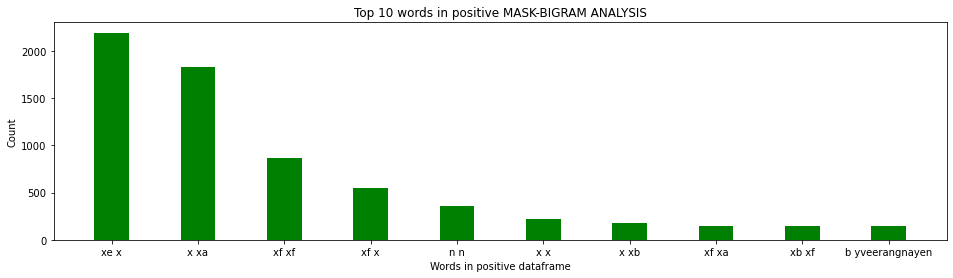

In [118]:
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive MASK-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

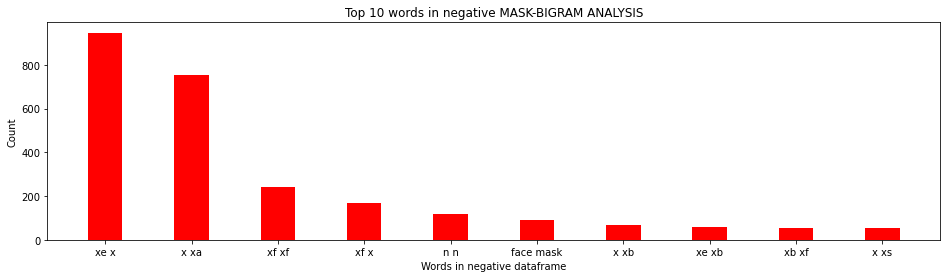

In [119]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative MASK-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

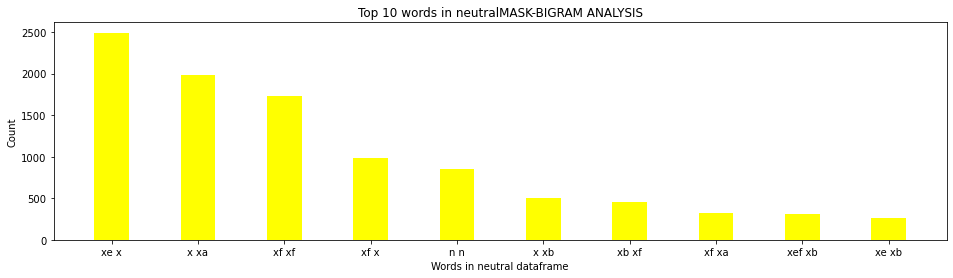

In [120]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutralMASK-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#top 10 bigram neutral | n-grams


In [121]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['b', 'foxnow', 'got', 'keep', 'kids', 'masked', 'especially', 'young', 'ones', 'learn', 'read', 'emotions', 'se', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'make', 'skin', 'radiant', 'xf', 'xf', 'x', 'xd', 'xf', 'xf', 'x', 'xd', 'nif', 'want', 'use', 'free', 'please', 'dm', 'xf', 'xf', 'xa', 'xb', 'xf', 'xf', 'xa', 'xb', 'n', 'n', 'masks', 'eye', 'eyemasks', 'patches', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'please', 'get', 'runout', 'ur', 'life', 'wearamask', 'stay', 'safe', 'stay', 'indoors', 'please', 'want', 'get', 'back', 'normal', 'covid', 'mask', 'vaccine']
Sentence after removing stopwords: ['b', 'asset', 'maskusdtperp', 'nside', 'long', 'nlevel', 'high', 'risk', 'nprice', 'ntimeframe', 'n', 'ncaution', 'data', 'delaye', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'free', 'home', 'covid', 'tests', 'available', 'order', 'n', 'nget', 'vaccinated', 'maskup', 'xe', 'x', 'xa']
Sentence after removin

Sentence after removing stopwords: ['b', 'maintaining', 'good', 'communication', 'recruitment', 'participation', 'n', 'n', 'clinicalresearch', 'clinicaltrials', 'cro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dog', 'cool', 'presents', 'n', 'n', 'xe', 'x', 'xdog', 'cool', 'xe', 'x', 'x', 'n', 'navailable', 'n', 'dog', 'cool', 'unique', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hollywood', 'entertaining', 'millions', 'good', 'ppl', 'amp', 'ideas', 'many', 'others', 'xf', 'xf', 'xa', 'xa', 'getreal', 'maskup', 'enjoylife']
Sentence after removing stopwords: ['b', 'lovingsgirl', 'realcandaceo', 'whatever', 'granny', 'pulling', 'maskup', 'cool', 'xf', 'xf', 'xa', 'xa']
Sentence after removing stopwords: ['b', 'premierscottmoe', 'good', 'see', 'want', 'move', 'time', 'someone', 'scrap', 'restricti', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'youthveerangnayen', 'really', 'appreciate', 'work', 'nmarks', 'maintaining', 'social

Sentence after removing stopwords: ['b', 'get', 'aprinted', 'awesome', 'products', 'suppome', 'redbubble', 'rbandme', 'findyourthing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wearing', 'mask', 'basics', 'normal', 'breathing', 'pretty', 'straightforward', 'xc', 'xa', 'breathe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'government', 'fit', 'purpose', 'xe', 'x', 'xs', 'tweet', 'safeschools', 'rejoineu', 'corrupttoriesout', 'covidisairborne', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'great', 'job', 'done', 'youth', 'veerangnayen', 'pandemic', 'salute', 'youth', 'veerangnayen', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'xf', 'xbb', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'xf', 'xbb', 'xf', 'xf', 'x', 'xd', 'xf', 'xf', 'xf', 'xbb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pandemic', 'covid', 'endemic', 'get', 'yet', 'omicron', 'still', 'overwhelming', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dssnews

Sentence after removing stopwords: ['b', 'beautiful', 'travel', 'themed', 'face', 'mask', 'next', 'vacation', 'travel', 'vacation', 'roadtrip', 'mask', 'covid']
Sentence after removing stopwords: ['b', 'fjrsally', 'tomthunkitsmind', 'good', 'thing', 'librarian', 'encountered', 'let', 'right', 'betwee', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'gym', 'reopening', 'day', 'celebrate', 'xf', 'xf', 'xf', 'xb', 'xf', 'xf', 'xf', 'xbb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xb', 'girlswholift', 'maskon', 'vaxxedup']
Sentence after removing stopwords: ['b', 'valentine', 'day', 'red', 'hearts', 'beautiful', 'pattern', 'premium', 'face', 'mask', 'zazzle', 'zazzlemade', 'hearts', 'coronavirus', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'soccer', 'design', 'available', 'teepublic', 'store', 'n', 'teepublic', 'n', 'soccer', 'football', 'sports', 'n', 'tshi', 'design', 'tees', 'xe', 'x', 'xa']
Sentence after removing 

Sentence after removing stopwords: ['b', 'pandamoanimum', 'jon', 'wearamask', 'pleased', 'rules', 'still', 'apply', 'wales']
Sentence after removing stopwords: ['b', 'randolphbracy', 'transportation', 'go', 'pharmacy', 'pick', 'free', 'n', 'masks', 'disabled', 'low', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'joannalink', 'davidstaplesyeg', 'edmontonjournal', 'ontario', 'schools', 'repoabsences', 'per', 'cent', 'high', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'blackwave', 'zimviral', 'nedbankzimbabwe', 'good', 'day', 'sincerely', 'apologise', 'inconveniences', 'caused', 'may', 'kin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'new', 'nft', 'opensea', 'via', 'opensea', 'n', 'n', 'nftartists', 'nftcommunity', 'nftgiveaway', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mnglin', 'mngl', 'n', 'mahanagarnaturalgasltd', 'nyour', 'new', 'line', 'installation', 'staff', 'entered', 'flat', 'nashik', 'without', 'mask', 'xe', '

Sentence after removing stopwords: ['b', 'xe', 'x', 'xcmasque', 'xe', 'x', 'xd', 'l', 'hunt', 'framed', 'n', 'nsee', 'original', 'artwork', 'amalgamation', 'show', 'april', 'n', 'n', 'lhunt', 'art', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vedpa', 'hero', 'looks', 'like', 'folks', 'true', 'hero', 'congratulations', 'blue', 'belle', 'big', 'thank', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'price', 'rising', 'xe', 'x', 'xa', 'price', 'usd', 'xe', 'x', 'xa', 'sharing', 'pushing', 'n', 'n', 'xe', 'x', 'xa', 'real', 'time', 'cryptocurrency', 'trends', 'xe', 'x', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tmprowell', 'omicronvariant', 'peaking', 'early', 'feb', 'oregon', 'according', 'ohaoregon', 'mask', 'vaccineswork']
Sentence after removing stopwords: ['b', 'get', 'vaccinated', 'get', 'booster', 'maskup', 'action', 'inaction', 'solely', 'affects', 'person', 'taking', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 

Sentence after removing stopwords: ['b', 'kids', 'active', 'wear', 'face', 'mask', 'n', 'n', 'xe', 'xe', 'xa', 'xef', 'xb', 'xf', 'comfortable', 'n', 'xe', 'xe', 'xa', 'xef', 'xb', 'xf', 'reusable', 'amp', 'washable', 'n', 'xe', 'xe', 'xa', 'xef', 'xb', 'xf', 'one', 'size', 'fits', 'n', 'n', 'brookwoodmed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bright', 'paisley', 'face', 'mask', 'filter', 'pocket', 'green', 'brown', 'emerald', 'oriental', 'cloth', 'washable', 'facemask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'travel', 'patco', 'must', 'wear', 'facial', 'covering', 'please', 'remember', 'also', 'practice', 'social', 'distancing', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'getting', 'vaccinated', 'covid', 'one', 'best', 'way', 'protect', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'velobetty', 'jorichardskent', 'exactly', 'wearamask', 'maskup']
Sentence after removing stopwords

Sentence after removing stopwords: ['b', 'beautiful', 'travel', 'themed', 'face', 'mask', 'next', 'vacation', 'spain', 'caribbean', 'travel', 'hike', 'camp', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'scare', 'cloth', 'mask', 'good', 'enough', 'keep', 'covid', 'bay', 'n', 'n']
Sentence after removing stopwords: ['b', 'chinese', 'know', 'bio', 'security', 'right', 'way', 'maskup', 'vaccineswork', 'vaccinemandate', 'vaccinepassport']
Sentence after removing stopwords: ['b', 'sold', 'amp', 'shipped', 'thank', 'much', 'mask', 'dumplings']
Sentence after removing stopwords: ['b', 'fantastic', 'detailed', 'thread', 'groups', 'pushing', 'masks', 'optional', 'schools', 'dishonestly', 'distorting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rambokuvanhu', 'good', 'day', 'sincere', 'apologies', 'inconveniences', 'caused', 'may', 'kindly', 'check', 'dm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xre', 'starting', 'mask

Sentence after removing stopwords: ['b', 'much', 'know', 'vaccine', 'masking', 'reluctance', 'could', 'overcome', 'good', 'messaging', 'trump', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nesara', 'emmausa', 'best', 'way', 'crimes', 'public', 'still', 'able', 'look', 'mirror', 'kkk', 'democrats', 'biden', 'mask']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'great', 'work', 'youthveerangnaye', 'n', 'covid', 'n', 'vaccinationcamp', 'n', 'getvaccinated', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'new', 'podcast', 'left', 'wants', 'control', 'health', 'safety', 'spreaker', 'kfyi', 'bias', 'circus', 'color', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'corona', 'epidemic', 'reduced', 'awareness', 'youth', 'virangnayen', 'good', 'job', 'making', 'p', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'cool', 'nft', 'buy', 'metar', 'xc', 'xb', 'n', 'n

Sentence after removing stopwords: ['b', 'theblindeternal', 'cubeapril', 'right', 'make', 'decision', 'expose', 'covid', 'fully', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'let', 'xe', 'x', 'xs', 'stop', 'disrespectful', 'jobs', 'trying', 'stay', 'healthy', 'n', 'maskup', 'n', 'n']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'every', 'corona', 'positive', 'person', 'home', 'isolation', 'must', 'know', 'seek', 'medical', 'help', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'confirmed', 'suspicions', 'omicron', 'far', 'last', 'virus', 'covid', 'persist', 'vaccinate', 'wea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'biden', 'allows', 'xe', 'x', 'xs', 'illegals', 'stream', 'usa', 'n', 'psaki', 'wants', 'mask', 'children', 'n', 'n', 'bacteria', 'oxygen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xb', 'biden', 'administration', 'providing', 'million', 'n', 'masks', 'americans', 'free', 'n', 'nbefore

Sentence after removing stopwords: ['b', 'today', 'editorial', 'page', 'new', 'indian', 'express', 'maskup', 'mohfwindia', 'lavagarwal', 'sujakrao', 'telanganahealth', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'must', 'follow', 'guidelines', 'corona', 'positive', 'safe', 'life', 'nd', 'around', 'us', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskon', 'blooddrive', 'chapel', 'street', 'new', 'ct']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'mixed', 'messages', 'turned', 'many', 'people', 'bcpoli', 'bcgovt', 'bcndp', 'pandemic', 'bcleg', 'pho', 'dix', 'covidbc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whole', 'face', 'id', 'mask', 'would', 'great', 'years', 'ago', 'day', 'uk', 'lifts', 'law', 'wearing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'many', 'people', 'googling', 'covid', 'appendicitis', 'seeing', 'xe', 'x', 'xs', 'probable', 'connection', 'getwellsoonjimin', 

Sentence after removing stopwords: ['b', 'surge', 'far', 'michigan', 'xe', 'x', 'xs', 'schools', 'need', 'everyone', 'xe', 'x', 'xs', 'cooperation', 'order', 'remain', 'open', 'pers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'rajasthan', 'nth', 'jan', 'covid', 'pm', 'bulletin', 'n', 'nplz', 'keep', 'maskup', 'xf', 'xf', 'x', 'xb', 'amp', 'staysafe', 'n', 'n', 'positive', 'case', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'awesome', 'second', 'kid', 'got', 'exposed', 'positive', 'classroom', 'waiting', 'call', 'rd', 'kid', 'thi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'collentirivamwe', 'chipomtasa', 'per', 'telephone', 'conversation', 'escalated', 'issue', 'technical', 'super', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'live', 'saintcharles', 'xe', 'x', 'xt', 'believe', 'one', 'minute', 'xe', 'x', 'xve', 'reached', 'covid', 'missouri', 'getvaccinatedandboosted', 'wearamask']
Sentence after removing 

Sentence after removing stopwords: ['b', 'request', 'citizens', 'follow', 'covid', 'appropriate', 'behaviour', 'safe', 'maskup', 'follow', 'socialdistancing', 'n', 'nto', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remains', 'effective', 'tool', 'protecting', 'people', 'living', 'hiv', 'aids', 'covid', 'mask', 'maskup', 'xf', 'xf', 'x', 'xb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'chrismasterjohn', 'like', 'amp', 'appreciate', 'addition', 'maskup', 'thanks', 'n', 'health', 'covid', 'medicine', 'naturalmedicine']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'every', 'corona', 'positive', 'person', 'home', 'isolation', 'must', 'know', 'seek', 'medical', 'help', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remember', 'next', 'time', 'hear', 'say', 'xe', 'x', 'xa', 'xe', 'x', 'xcbut', 'many', 'people', 'die', 'covid', 'xe', 'x', 'xd', 'answer', 'k', 'deaths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jan', 'newl

Sentence after removing stopwords: ['b', 'seem', 'unleashed', 'anti', 'maskers', 'covid', 'deniers', 'pro', 'tories', 'tweet', 'xe', 'x', 'xa', 'wow', 'wonder', 'rates', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'funny', 'bones', 'evilclown', 'mask']
Sentence after removing stopwords: ['b', 'gop', 'last', 'months', 'workers', 'pandemic', 'related', 'absences', 'cost', 'employers', 'billion', 'xe', 'x', 'x', 'nearly', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'many', 'us', 'including', 'waiting', 'covid', 'pandemic', 'please', 'safe', 'wherever', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mauraresister', 'knew', 'would', 'come', 'vaccinated', 'really', 'hoping', 'thank', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kmcgair', 'let', 'favorite', 'doctor', 'fauci', 'speak', 'issue', 'n', 'n', 'fauci', 'mask', 'covid']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'great', 'volunteers', 'corona', 'n', 'youthve

Sentence after removing stopwords: ['b', 'even', 'japanese', 'people', 'wear', 'masks', 'want', 'take', 'masks', 'enjoy', 'conversation', 'dinner', 'n', 'ni', 'knew', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pandemic', 'receding', 'people', 'minds', 'tested', 'going', 'work', 'acute', 'hospital', 'ie', 'carrying', 'follo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'npriori', 'skincare', 'unveiled', 'led', 'mask', 'fda', 'cleared', 'professional', 'lightrapy', 'facial', 'silicone', 'mask', 'buybest', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whether', 'kariba', 'safari', 'lodge', 'crowned', 'eagle', 'boutique', 'hotel', 'make', 'valentine', 'day', 'special', 'n', 'n', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'champion', 'sound', 'n', 'focalistic', 'n', 'n', 'motivationmonday', 'breakfastinthecity', 'n', 'melodyhassan', 'xe', 'x', 'xa']
Sentence after removing stopwor

Sentence after removing stopwords: ['b', 'ayeeeee', 'issa', 'new', 'week', 'xf', 'xf', 'xd', 'xbe', 'xf', 'xf', 'xa', 'xb', 'n', 'n', 'xf', 'xf', 'x', 'xaa', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'come', 'way', 'wandecoal', 'n', 'n', 'motivationmonday', 'breakfastinthecity', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'boredalive', 'bumbaclot', 'ashleybdz', 'wow', 'nvery', 'convincing', 'n', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'xa', 'xa', 'n', 'n', 'vaccineswork', 'vaxup', 'maskup']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'npriori', 'skincare', 'unveiled', 'led', 'mask', 'fda', 'cleared', 'professional', 'lightrapy', 'facial', 'silicone', 'mask', 'buybest', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'new', 'algo', 'detection', 'mask', 'usdt', 'xf'

Sentence after removing stopwords: ['b', 'nathaliejacoby', 'quite', 'ready', 'join', 'covid', 'crowd', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'high', 'quality', 'hoodie', 'n', 'n', 'trackpants', 'manufacturing', 'hoodies', 'tshirtdesign', 'brand', 'clothingbrands', 'leggings', 'belt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'maskmandate', 'newyork', 'njudge', 'strikes', 'new', 'york', 'indoor', 'mask', 'mandate']
Sentence after removing stopwords: ['b', 'masks', 'effective', 'worn', 'properly', 'woman', 'grocery', 'store', 'sneezed', 'amp', 'mask', 'xf', 'xf', 'xa', 'xaeku', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'krell', 'good', 'morning', 'may', 'kindly', 'provide', 'landline', 'number', 'assist', 'ngj', 'maskup', 'staysafe']
Sentence after removing stopwords: ['b', 'people', 'things', 'holding', 'old', 'ways', 'advancing', 'thing', 'resent', 'behaviors', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'several',

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xaclear', 'unequivocal', 'information', 'one', 'world', 'large', 'reliable', 'mask', 'manufacturers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thank', 'frenchmontana', 'ur', 'music', 'make', 'get', 'rid', 'covid', 'thing', 'easy', 'stay', 'safe', 'guys', 'definitely', 'real', 'xf', 'xf', 'x', 'xb', 'maskon']
Sentence after removing stopwords: ['b', 'uh', 'oh', 'xe', 'x', 'xa', 'xe', 'x', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xaemask', 'social', 'distance', 'xf', 'xf', 'x', 'xb', 'quarantine', 'stayinside', 'stayathome', 'wearamask']
Sentence after removing stopwords: ['b', 'kerala', 'reports', 'new', 'covid', 'cases', 'reports', 'death', 'ntpr', 'n', 'nlesser', 'yesterday', 'n', 'n', 'staysafe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cool', 'people', 'wear', 'masks', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'patriottakes', 'jimmylevymusic', 

Sentence after removing stopwords: ['b', 'feel', 'like', 'metaphor', 'whole', 'pandemic', 'one', 'person', 'photo', 'wearing', 'mask', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'govrondesantis', 'reason', 'high', 'case', 'numbers', 'schools', 'maskup']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'great', 'work', 'dn', 'yveerangnayen', 'n', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'paulnonsense', 'velobetty', 'neither', 'seems', 'doubt', 'much', 'whether', 'qualifications', 'field', 'wearamask', 'maskup']
Sentence after removing stopwords: ['b', 'president', 'biden', 'nprevent', 'covid', 'infections', 'spread', 'nwe', 'must', 'consistent', 'keep', 'fighting', 'end', 'pandem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'long', 'mandatory', 'wear', 'mask', 'nit', 'xe', 'x', 'xs', 'mandatory', 'look', 'left', 'amp', 

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'npcs', 'face', 'mask', 'disposable', 'face', 'blue', 'adult', 'home', 'office', 'man', 'woman', 'blue', 'topfanscorner', 'n', 'pcs', 'face', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'hits', 'family', 'make', 'sure', 'xe', 'x', 'xt', 'happen', 'thanks', 'aboutkp', 'keeping', 'us', 'safe', 'maskup']
Sentence after removing stopwords: ['b', 'nftluffy', 'hi', 'drop', 'new', 'nft', 'objktcom', 'bonus', 'check', 'link', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'shrewsbury', 'town', 'centre', 'shops', 'full', 'mask', 'wearers', 'even', 'plenty', 'outside', 'people', 'frightened', 'swal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'promise', 'trying', 'spam', 'much', 'xf', 'xf', 'xa', 'xa', 'asked', 'share', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'x', 'x', 'n', 'nto', 'find', 'covid', 'vaccine', 'l', 'xe', 'x', 'xa']

Sentence after removing stopwords: ['b', 'iamspurs', 'agree', 'day', 'still', 'ntriple', 'vaccinated', 'adults', 'single', 'jab', 'kids', 'house', 'fit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'grandson', 'sends', 'msg', 'saw', 'xe', 'x', 'xci', 'love', 'nana', 'going', 'school', 'know', 'xe', 'x', 'xt', 'go', 'near', 'anyone', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'please', 'get', 'vaccinated', 'n', 'nyes', 'even', 'xe', 'x', 'xre', 'excellent', 'athlete', 'think', 'immune', 'system', 'compete', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tfsquareone', 'ooo', 'exciting', 'wonder', 'gobots', 'mask', 'powerrangers', 'starwars', 'motu', 'bravestarr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'balinese', 'wood', 'mask', 'monkey', 'rare', 'color', 'white', 'indonesian', 'carved', 'wall', 'ahanging', 'indonesiamask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'must', 'fight', 'children', '

Sentence after removing stopwords: ['b', 'masks', 'caused', 'increase', 'childhood', 'speech', 'delays', 'among', 'issues', 'xe', 'x', 'xm', 'sure', 'bananas', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'christchurch', 'hospital', 'banned', 'people', 'fabric', 'mask', 'covidnz', 'cjsbishop', 'advice', 'good', 'mask', 'nzpol']
Sentence after removing stopwords: ['b', 'raza', 'nephew', 'decided', 'make', 'best', 'use', 'sunny', 'day', 'today', 'n', 'snow', 'woman', 'maskup', 'shopian', 'kashmir']
Sentence after removing stopwords: ['b', 'titus', 'company', 'point', 'usual', 'accurate', 'statistics', 'covid', 'deaths', 'dying', 'please', 'enjoy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'stay', 'home', 'stay', 'safe', 'covid', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 'n', 'maskupindia', 'n', 'youthveerangnayen']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xc', 'xa', 'xef', 'xb', 'xfwarming', 'center', 'xf', '

Sentence after removing stopwords: ['b', 'indiafightscorona', 'rajasthan', 'nth', 'jan', 'covid', 'pm', 'bulletin', 'n', 'nplz', 'keep', 'maskup', 'xf', 'xf', 'x', 'xb', 'amp', 'staysafe', 'n', 'n', 'positive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'great', 'humanity', 'work', 'xf', 'xf', 'x', 'xc', 'maskup']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'get', 'vaccinated', 'precaution', 'good', 'cure', 'n', 'nitiaayog', 'n', 'covidappropriatebehaviour', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'juliahb', 'berniespofforth', 'fascinating', 'high', 'nwhen', 'surveyed', 'audience', 'mask', 'umasked', 'optional', 'na', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'republic', 'day', 'every', 'indian', 'planet', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xb', 'n', 'n', 'diya', 'design', 'studio', 'style', 'swag', 'statement', 'love', 'xe', 'x', 'xa']
Sentence afte

Sentence after removing stopwords: ['b', 'nathanmackbrown', 'damn', 'actually', 'hope', 'wakes', 'get', 'good', 'touched', 'hand', 'science', 'xf', 'xf', 'xa', 'xaa', 'xe', 'x', 'xm', 'v', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'memreddog', 'thanks', 'michael', 'demvoice', 'n', 'resistanceunited', 'onev', 'n', 'votingrights', 'climate', 'n', 'saveanimals', 'lgbtqia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rachelburden', 'bbclive', 'polite', 'replies', 'please', 'nmeanwhile', 'real', 'world', 'finally', 'perform', 'years', 'n', 'try', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bubble', 'tea', 'design', 'available', 'teepublic', 'n', 'teepublic', 'n', 'tees', 'tshi', 'stickers', 'n', 'pins', 'bubble', 'bubbletea', 'tea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'best', 'lessons', 'one', 'learn', 'life', 'master', 'remain', 'calm', 'remember', 'none', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'e

Sentence after removing stopwords: ['b', 'good', 'morning', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'nearlier', 'morning', 'picking', 'iguanas', 'putting', 'sun', 'xf', 'xf', 'xa', 'xe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'xe', 'xb', 'lose', 'love', 'n', 'selenagomez', 'n', 'n', 'uncensored', 'w', 'ttarra', 'n', 'n', 'chooseday', 'n', 'numberlifestylestation', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'new', 'nft', 'tribe', 'mask', 'mondang', 'mask', 'n', 'eds', 'xtz', 'n', 'n', 'nft', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'best', 'paof', 'wear', 'face', 'mask', 'make', 'funny', 'faces', 'people', 'never', 'know', 'n', 'maskup', 'mask', 'masks']
Sentence after removing stopwords: ['b', 'elliewhipwrites', 'good', 'day', 'may', 'kindly', 'provide', 'landline', 'number', 'physical', 'address', 'alternative', 'contact', 'numbe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sfch

Sentence after removing stopwords: ['b', 'hopefully', 'wa', 'follow', 'vic', 'early', 'covid', 'strategy', 'contain', 'lockdowns', 'masks', 'vaxx', 'social', 'distance', 'k', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'push', 'keep', 'rising', 'xe', 'x', 'xa', 'price', 'usd', 'xe', 'x', 'xa', 'sharing', 'pushing', 'n', 'n', 'xe', 'x', 'xa', 'real', 'time', 'cryptocurrency', 'trends', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'fabulous', 'humanity', 'work', 'xe', 'xd', 'xa', 'n', 'awarenesscampaigns', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 'n', 'maskupindia']
Sentence after removing stopwords: ['b', 'positive', 'cases', 'school', 'since', 'september', 'know', 'documented', 'cases', 'contracted', 'sch', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'drop', 'nft', 'nthe', 'tribe', 'mask', 'mondang', 'mask', 'n', 'eds', 'xtz', 'n', 'n', 'nftdrop', 'nftcommmunity', 'xe', 'x', 'xa'

Sentence after removing stopwords: ['b', 'let', 'revive', 'responsible', 'citizen', 'celebrate', 'glory', 'nation', 'wearing', 'mask', 'stay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beautiful', 'outdoorsy', 'face', 'mask', 'travel', 'hike', 'camp', 'mask', 'ppe']
Sentence after removing stopwords: ['b', 'wearamask', 'nit', 'keeps', 'face', 'warm']
Sentence after removing stopwords: ['b', 'saturday', 'wearing', 'mask', 'hiked', 'mountwilson', 'clean', 'could', 'see', 'beyond', 'catalinaisland', 'onto', 'sancleme', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'please', 'get', 'touch', 'free', 'obligation', 'quote', 'calling', 'visit']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'say', 'clear', 'healthcare', 'workers', 'lifeboat', 'especially', 'pandemic', 'xf', 'xf', 'x', 'xb', 'maskup', 'omicron', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'thanks', 'ton', 'guideline', 'xf', 'xf', 'xa', 'x', 'nyour', 'organiz

Sentence after removing stopwords: ['b', 'listening', 'ignoring', 'parents', 'special', 'needs', 'kids', 'listening', 'address', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'great', 'tips', 'shopping', 'online', 'masks', 'especially', 'ns', 'find', 'spot', 'fakes', 'stay', 'sa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'twitter', 'xf', 'xf', 'xc', 'xd', 'live', 'xe', 'x', 'xa', 'u', 'awesome', 'healthcare', 'humans', 'xe', 'x', 'xa', 'xe', 'x', 'xm', 'going', 'tell', 'u', 'real', 'xf', 'xf', 'xc', 'xd', 'across', 'co', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wearing', 'mask', 'important', 'xe', 'x', 'xs', 'life', 'saving', 'wear', 'mask', 'protect', 'amp', 'others', 'n', 'n', 'ambicam', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uvmlarnermed', 'prof', 'med', 'amp', 'uvmmedcenter', 'chief', 'critical', 'care', 'gil', 'allen', 'md', 'models', 'important', 'characteristics', 'xe', 'x', 'xa']
Sentence after removing stopword

Sentence after removing stopwords: ['b', 'science', 'compassion', 'meet', 'decent', 'sensible', 'thing', 'please', 'continue', 'wear', 'masks', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskup', 'california', 'else', 'xe', 'x', 'xa', 'nexcept', 'rich', 'amp', 'famous', 'like', 'extra', 'special', 'governor', 'california', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'believe', 'cdc', 'right', 'proof', 'independent', 'source', 'see', 'right', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'living', 'cancer', 'increases', 'risk', 'flu', 'complications', 'undergoing', 'treatment', 'staying', 'healthy', 'durin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'president', 'biden', 'nthank', 'listening', 'received', 'free', 'covid', 'tests', 'week', 'nstill', 'thousands', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covidnz', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xb', 'n', 'n', 'omicronvarient', 'new', 'mask', 'mandates', 'r

Sentence after removing stopwords: ['b', 'covid', 'progressed', 'need', 'wear', 'masks', 'slow', 'prevent', 'spread', 'covid', 'good', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'morning', 'good', 'afternoon', 'evening', 'beautiful', 'humans', 'species', 'hope', 'everyone', 'great', 'day', 'stay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'public', 'school', 'teacher', 'every', 'since', 'xe', 'x', 'xve', 'wearing', 'mask', 'uncomfortable', 'honestly', 'say', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'vaxxed', 'boosted', 'folks', 'yet', 'wear', 'best', 'mask', 'avoidcrowds', 'especia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'boom', 'boom', 'boomer', 'staying', 'safe', 'pretty', 'weird', 'ideas', 'germs', 'work', 'maskup', 'covid', 'boomers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'alrighty', 'new', 'xe', 'x', 'xcstealth', 'xe', 'x', 'xd', 'omicron', 'variant', 'transmissible', 'regul

Sentence after removing stopwords: ['b', 'important', 'xe', 'x', 'xt', 'matter', 'mild', 'covid', 'neighbor', 'xe', 'x', 'xs', 'brother', 'xe', 'x', 'xs', 'cousin', 'let', 'xe', 'x', 'xs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'best', 'way', 'prevent', 'getting', 'infected', 'omicron', 'variant', 'covid', 'get', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'reinfections', 'uncommon', 'prior', 'xe', 'x', 'xcnatural', 'xe', 'x', 'xd', 'bout', 'provide', 'boost', 'need', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'quotelladesign', 'good', 'day', 'currently', 'experiencing', 'technical', 'challenge', 'resulting', 'service', 'disruption', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'quick', 'small', 'target', 'potential', 'inverted', 'head', 'shoulder', 'ascending', 'triangle', 'ta', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'putting', 'antivaxxers', 'antimask', 'vi

Sentence after removing stopwords: ['b', 'fun', 'facemask', 'covid', 'mask', 'skincare', 'staysafe', 'beauty', 'coronavirus', 'masks', 'maskerwajah', 'skincareroutine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'getting', 'vaccinated', 'covid', 'significantly', 'reduces', 'risk', 'getting', 'virus', 'importantly', 'preven', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'politico', 'complainers', 'expect', 'magic', 'magic', 'maskup', 'getvaccinatedandboosted', 'ffs']
Sentence after removing stopwords: ['b', 'delighted', 'take', 'another', 'big', 'step', 'forward', 'morning', 'wonderful', 'see', 'librarymu', 'maynoothuni', 'bus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'update', 'new', 'cases', 'new', 'deaths', 'reported', 'lucknow', 'reported', 'cases', 'jhansi', 'noida', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'safety', 'first', 'mask', 'everybody', 'xf', 'xf', 'x', 'xb', 'happy', 'lunar', 'new', 'year', 'everyone

Sentence after removing stopwords: ['b', 'good', 'morning', 'never', 'doubt', 'coffee', 'blessed', 'sunday', 'n', 'coffeetime', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xa', 'lifetips', 'xf', 'xf', 'xa', 'x', 'wearamask', 'xf', 'xf', 'x', 'xb', 'getvaxxed', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'precisely', 'datamining', 'since', 'last', 'week', 'answer', 'xf', 'xf', 'x', 'x', 'th', 'time', 'covid', 'become', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pre', 'existing', 'conditions', 'know', 'many', 'people', 'triplevaxxed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'incredible', 'work', 'done', 'derasachasauda', 'volunteers', 'inspiration', 'saint', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'npriori', 'skincare', 'unveiled', 'led', 'mask', 'fda', 'cleared', 'professional', 'light

Sentence after removing stopwords: ['b', 'factions', 'n', 'nthe', 'shepherds', 'symbol', 'n', 'ngather', 'people', 'unity', 'wise', 'caring', 'shepherds', 'educate', 'social', 'iss', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'realsteel', 'eminem', 'donate', 'tobeakingofrobot', 'rich', 'champion', 'morefamous', 'moremoney', 'n', 'mask', 'ironman', 'king', 'queen', 'n', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'say', 'new', 'virginia', 'governor', 'glennyoungkin', 'governorva', 'mini', 'orange', 'donald', 'trump', 'know', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'love', 'australia', 'happy', 'australia', 'day', 'th', 'january', 'hoodie', 'n', 'zazzlemade', 'zazzle', 'mask', 'covid', 'coronavirus', 'facemask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'got', 'bullied', 'wearing', 'mask', 'public', 'high', 'school', 'kid', 'xf', 'xf', 'x', 'x', 'ffs', 'dontcomeatmebro', 'maskup', 'donthate']
Sentence after removing stop

Sentence after removing stopwords: ['b', 'new', 'ds', 'legend', 'zelda', 'majora', 'mask', 'limitededition', 'w', 'skull', 'kid', 'sealed', 'ebay', 'unitedstates', 'auction', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'next', 'piece', 'gear', 'would', 'advise', 'new', 'diver', 'purchase', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'dpm', 'thailand', 'n', 'n', 'wearessi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'much', 'covid', 'staof', 'pandemic', 'knowledge', 'help', 'provide', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nathaliejacoby', 'good', 'old', 'fashion', 'radio', 'cd', 'create', 'playlist', 'pin', 'drive', 'let', 'good', 'times', 'roll', 'n', 'maskup', 'getvaxxed', 'getboosted']
Sentence after removing stopwords: ['b', 'bncnews', 'tswhitlow', 'jenynedonaldson', 'thank', 'highlighting', 'tswhitlow', 'omicron', 'still', 'rise', 'many', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'makes', 'aci', 'surgical', 'n',

Sentence after removing stopwords: ['b', 'heard', 'many', 'cary', 'morrisville', 'amp', 'apex', 'working', 'hard', 'meet', 'mask', 'needs', 'nstarting', 'today', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'family', 'member', 'colorado', 'texted', 'library', 'giving', 'free', 'n', 'masks', 'today', 'saw', 'another', 'p', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'free', 'n', 'masks', 'nstores', 'put', 'display', 'unwrapped', 'everyone', 'touching', 'using', 'dirty', 'hands', 'possibly', 'contaminated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'look', 'sexy', 'face', 'mask', 'n', 'n', 'coronavirus', 'lockdown', 'mask', 'n']
Sentence after removing stopwords: ['b', 'skynews', 'wonderful', 'infection', 'sickness', 'death', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'getvaccinated', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'new', 'covid', 'symptoms', 'longcovid', 'covid', 'mask']
Sen

Sentence after removing stopwords: ['b', 'omicron', 'mild', 'said', 'n', 'lincolnshire', 'bbcradiolincs', 'thelincolnite', 'wearamask']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'important', 'work', 'covid', 'n', 'youthveerangnayen', 'n', 'masks', 'n', 'nitiaayog', 'n', 'maskupindia', 'n', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'kf', 'mask', 'best', 'protecting', 'covid', 'xe', 'x', 'xb', 'xf', 'xf', 'x', 'xb']
Sentence after removing stopwords: ['b', 'original', 'sketch', 'time', 'back', 'plan', 'one', 'original', 'creations', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'still', 'far', 'transition', 'endemic', 'sars', 'cov', 'transmission', 'stops', 'growing', 'globally', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wonderful', 'sunday', 'everyone', 'xf', 'xf', 'x', 'x', 'n', 'n', 'mhhsbd', 'smartsocial', 'craftbizparty', 'mikesthoughts', 'sundaymorning', 'earlybiz', 'xe', 'x', 'xa']
Sentence after removing 

Sentence after removing stopwords: ['b', 'first', 'air', 'purifier', 'type', 'mask', 'usa', 'norder', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'airpurification', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xalt', 'right', 'xe', 'x', 'xd', 'news', 'outlets', 'want', 'teachers', 'kids', 'grandma', 'dead', 'xe', 'x', 'xa', 'oh', 'wait', 'weeks', 'week', 'say', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskup', 'ncovid', 'still', 'around', 'look', 'also', 'looking', 'others', 'stay', 'safe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cindian', 'gunalcheesh', 'sharing', 'heajust', 'xe', 'x', 'xt', 'know', 'think', 'family', 'already', 'lost', 'many', 'xf', 'xf', 'x', 'xad', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xm', 'sure', 'xe', 'x', 'xs', 'nothing', 'let', 'xe', 'x', 'xs', 'maskup', 'amp', 'vaxup', 'get', 'back', 'xe', 'x', 'xcnormal', 'xe', 'x', 'xd', 'soon', 'ok']
Sentence after removing stopwo

Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'good', 'job', 'xf', 'xf', 'x', 'xf', 'wearamask', 'derasachasauda', 'saintdrmsg']
Sentence after removing stopwords: ['b', 'huge', 'thank', 'boris', 'johnson', 'covid', 'omicron', 'tories', 'pro', 'corruption', 'pro', 'virus', 'since', 'le', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remember', 'planning', 'going', 'hawaii', 'march', 'tickets', 'cheap', 'haha', 'fun', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'head', 'toe', 'denim', 'bold', 'look', 'make', 'n', 'n', 'pepejeansindia', 'pepeison', 'thenewblue', 'ss', 'welovepepe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jesus', 'way', 'truth', 'life', 'npraise', 'god', 'hallelujah', 'n', 'ninspirational', 'hour', 'live', 'n', 'bybisasa', 'n', 'n', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'equivalent', 'kn', 'many', 'colors', 'available', 'order', 'al

Sentence after removing stopwords: ['b', 'good', 'morning', 'ngood', 'afternoon', 'amp', 'ngood', 'evening', 'everyone', 'n', 'xf', 'xf', 'xc', 'xe', 'xe', 'xd', 'xa', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'xf', 'xbe', 'xf', 'xf', 'x', 'xb', 'n', 'leadwithlove', 'n', 'gowithgod', 'n', 'beblessed', 'n', 'bekind', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'real', 'talk', 'n', 'nlittles', 'vaccinated', 'covid', 'amp', 'depend', 'rest', 'us', 'protect', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'covid', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 'n', 'maskupindia', 'make', 'safe', 'india', 'n', 'youthveerangnayen']
Sentence after removing stopwords: ['b', 'free', 'uk', 'shipping', 'amp', 'international', 'xc', 'xa', 'n', 'norder', 'charlesrenniemackintosh']
Sentence after removing stopwords: ['b', 'good', 'morning', 'good', 'afternoon', 'evening', 'beautiful', 'humans', 'aliens', 'great', 'week', 'stay', 

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'free', 'giveaway', 'grab', 'coin', 'web', 'edition', 'xf', 'xf', 'xa', 'xa', 'ncelebrate', 'ens', 'gtc', 'mask', 'listings', 'prize', 'p', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'might', 'know', 'booked', 'birthday', 'parties', 'customize', 'imaginative', 'painting', 'involvi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hear', 'people', 'say', 'things', 'going', 'get', 'covid', 'eventually', 'need', 'okay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcmasks', 'xe', 'x', 'xt', 'work', 'xe', 'x', 'xd', 'considered', 'xe', 'x', 'xcmisinformation', 'xe', 'x', 'xd', 'xe', 'x', 'xanow', 'know', 'true', 'n', 'n', 'joerogan', 'maskup', 'spotify', 'xe', 'x', 'xa']


In [122]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['b', 'two', 'really', 'difficult', 'years', 'disaster', 'appeared', 'please', 'get', 'vaccinated', 'get', 'booster', 'wear', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'balinese', 'wood', 'mask', 'green', 'singh', 'barong', 'carving', 'indonesian', 'wall', 'ahanging', 'barong', 'singh', 'mask', 'balinese', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tryhardbruins', 'ottawajoe', 'cmckenney', 'ottawapolice', 'one', 'xe', 'x', 'xcfighting', 'freedom', 'xe', 'x', 'xd', 'mean', 'sorry', 'xe', 'x', 'xc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'monday', 'xf', 'xf', 'xa', 'xb', 'let', 'drink', 'xe', 'x', 'x', 'xf', 'xf', 'xd', 'xb', 'together', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'spiritual', 'league', 'n', 'weak', 'let', 'somebody', 'put', 'something', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'birthday', 'birthdaygirl', 'butterfly

Sentence after removing stopwords: ['b', 'pineapple', 'face', 'mask', 'lycra', 'blue', 'pink', 'pineapples', 'reusable', 'washable', 'mouth', 'cover', 'handmade', 'facemask', 'xxl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jrtruth', 'coconinonf', 'kristenwaring', 'cityofflagstaff', 'enjoy', 'pathetic', 'irrelevant', 'groupies', 'anonymous', 'one', 'n', 'ni', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'n', 'xf', 'xf', 'x', 'xbb', 'decreased', 'day', 'n', 'xf', 'xf', 'x', 'xb', 'price', 'usdt', 'n', 'xe', 'xf', 'xb', 'xef', 'xb', 'xf', 'jan', 'utc', 'n', 'mask', 'maskusdt', 'cryptobot']
Sentence after removing stopwords: ['b', 'new', 'post', 'virginia', 'parents', 'fight', 'ill', 'founded', 'school', 'mask', 'mandates', 'asranomani', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lientje', 'exactly', 'common', 'sense', 'people', 'n', 'ni', 'one', 'never', 'got', 'corona', 'n', 'ni', 'fully', 'vaccinated', 'xe', 'x', 'xa']
Sentence afte

Sentence after removing stopwords: ['b', 'lbc', 'tomswarbrick', 'downing', 'st', 'parties', 'obviously', 'completely', 'wrong', 'real', 'world', 'needs', 'normality', 'decimated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'moving', 'right', 'direction', 'soon', 'stop', 'houston', 'xe', 'x', 'xs', 'late', 'day', 'average', 'covid', 'positivity', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'name', 'popped', 'customer', 'survey', 'comment', 'recently', 'xe', 'x', 'xcyou', 'one', 'negative', 'employee', 'named', 'xe', 'x', 'xd', 'yes', 'xe', 'x', 'xm', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'thing', 'note', 'mask', 'mandate', 'ottawa', 'basically', 'dead', 'weekend', 'n', 'nvirtually', 'masks', 'worn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'black', 'velvet', 'face', 'mask', 'shiny', 'handmade', 'fashion', 'face', 'mask', 'gold', 'glitter', 'gothic', 'alt', 'breathable', 'mask', 'reusable', 'xe', 'x', 'xa']

Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'sale', 'sales', 'discount', 'teepublic', 'teepublic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'smgrevisited', 'marcfish', 'source', 'misinformation', 'threatens', 'life', 'sick', 'disabled', 'immun', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'unicorns', 'black', 'facemask', 'cotton', 'jersey', 'printed', 'reusable', 'washable', 'mouth', 'cover', 'handmade', 'face', 'mask', 'xxl', 'adult', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cases', 'less', 'likely', 'controls', 'repo', 'mask', 'usage', 'high', 'risk', 'exposures', 'aor', 'adjusted', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whiskeywineabt', 'grift', 'yall', 'sad', 'n', 'ngrow', 'n', 'n', 'vaccineswork', 'vaxup', 'maskup']
Sentence after removing stopwords: ['b', 'pink', 'gold', 'stripes', 'facemask', 'reusable', 'washable', 'mouth', 'cover', 'face', 'mask', 'handmade', 'artsy', 

Sentence after removing stopwords: ['b', 'arishapiro', 'xe', 'x', 'xa', 'music', 'owned', 'corp', 'bad', 'history', 'joe', 'rogan', 'xe', 'x', 'xa', 'yes', 'wearamask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'giantfoodstores', 'giant', 'clifton', 'heights', 'pa', 'yesterday', 'staff', 'behind', 'deli', 'counter', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'helm', 'awe', 'face', 'mask', 'aegishjalmur', 'icelandic', 'symbol', 'old', 'norse', 'mask', 'black', 'cotton', 'jersey', 'reusable', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sessler', 'wa', 'candidate', 'congress', 'poses', 'dead', 'state', 'trooper', 'robelamay', 'jerrod', 'seeking', 'endorsements', 'fr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'govrondesantis', 'deathsantis', 'vaxup', 'maskup', 'psaki', 'says', 'crazy', 'florida', 'gov', 'ron', 'desantis', 'push', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'feel', 'like', 'people'

Sentence after removing stopwords: ['b', 'kns', 'offer', 'protection', 'n', 'nfine', 'print', 'fake', 'n', 'mask', 'maskup']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'xe', 'xb', 'lonely', 'n', 'n', 'ayrastarr', 'n', 'n', 'uncensored', 'w', 'n', 'ttarra', 'n', 'n', 'lovetherapy', 'n', 'numberlifestylestation', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'roshanrinaldi', 'least', 'go', 'someone', 'deserves', 'n', 'getvaccinatednow', 'wearamask', 'slowthespread', 'social', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fans', 'game', 'yrs', 'covid', 'shit', 'seriously', 'xe', 'x', 'xs', 'reasoning', 'nhljets', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thatdmvginger', 'holychow', 'usually', 'avoid', 'chinese', 'food', 'kid', 'xe', 'x', 'xt', 'eat', 'gluten', 'accommo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nintendo', 'ds', 'xl', 'gray', 'black', 'console', 'mario', 'land', 'majora'

Sentence after removing stopwords: ['b', 'mmortemm', 'sorry', 'hear', 'maskup', 'vaxxup', 'physicaldistance']
Sentence after removing stopwords: ['b', 'carollrose', 'everything', 'wrong', 'man', 'drive', 'school', 'cough', 'spread', 'saliva', 'minor', 'student', 'bec', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'black', 'history', 'month', 'mask', 'collection', 'blackhistorymonth', 'maskup', 'africaamericanmasks', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'mandates', 'illegal', 'valid', 'argument', 'duty', 'nypd', 'exempt', 'paying', 'fares', 'zero', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hicksyalex', 'costacoffee', 'staff', 'still', 'mask', 'amp', 'behind', 'plastic', 'screen', 'head', 'office', 'mandate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'well', 'sucks', 'covid', 'corona', 'chicagoartist', 'comicbookwriter', 'comicbookartist', 'omicron', 'xc', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'xa',

Sentence after removing stopwords: ['b', 'game', 'changer', 'air', 'quality', 'breathing', 'safety', 'n', 'qualiyofbreath', 'teachers', 'children', 'maskup', 'childcare', 'limi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'cared', 'put', 'mask', 'squid', 'game', 'probably', 'masks', 'maskup', 'thenautilusartshow']
Sentence after removing stopwords: ['b', 'iainmartin', 'downing', 'st', 'parties', 'obviously', 'completely', 'wrong', 'real', 'world', 'needs', 'normality', 'decimated', 'arts', 'af', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'robinsonirma', 'lisachr', 'mask', 'xe', 'x', 'xt', 'work', 'people', 'seriously', 'read', 'watch', 'news', 'say', 'masks', 'xe', 'x', 'xt', 'wo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'governorva', 'unfortunately', 'relegating', 'public', 'health', 'policy', 'individual', 'choice', 'midst', 'covid', 'surge', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'many', 'children', 'teachers'

Sentence after removing stopwords: ['b', 'nytimes', 'vaccine', 'remarkably', 'effective', 'preventing', 'serious', 'illness', 'xe', 'x', 'xachances', 'getting', 'sick', 'extremely', 'low', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dark', 'brown', 'floral', 'paisley', 'face', 'mask', 'cotton', 'mix', 'print', 'facemask', 'reusable', 'washable', 'sizes', 'nose', 'wire', 'opti', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jimjordan', 'xe', 'x', 'xs', 'wrong', 'mister', 'nurses', 'unvaccinated', 'doctors', 'maskup', 'endjordan', 'endtrump']
Sentence after removing stopwords: ['b', 'stealth', 'variant', 'late', 'mutation', 'omicron', 'detected', 'u', 'states', 'countries', 'much', 'hard', 'diagno', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'baltic', 'pagan', 'symbol', 'auseklis', 'black', 'cotton', 'jersey', 'printed', 'reflective', 'handmade', 'facemask', 'reusable', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'slbahr', 'ab

Sentence after removing stopwords: ['b', 'everyone', 'going', 'crazy', 'maskup', 'young', 'kids', 'even', 'absence', 'meaningful', 'data', 'suppoit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'neeshbloggs', 'wearamask', 'follow', 'tory', 'herd', 'immunity', 'caused', 'death', 'amp', 'lifelong', 'suffering', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xac', 'bass', 'drop', 'dna', 'lounge', 'starting', 'vaccinated', 'mask', 'bassdrop', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tom', 'ahead', 'curve', 'wearing', 'mask', 'around', 'sick', 'kids', 'e', 'n', 'desperatehousewives', 'podcast', 'recap', 'maskup']
Sentence after removing stopwords: ['b', 'nassauexec', 'dare', 'ignorance', 'child', 'ill', 'since', 'everyone', 'wearing', 'mask', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'people', 'gr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cold', 'sore', 'pimple', 'hiv'

Sentence after removing stopwords: ['b', 'green', 'tea', 'cleansing', 'mask', 'stick', 'acne', 'antiaging', 'blackheads', 'cosmetics', 'deepclean', 'greentea', 'mask', 'nourishing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'random', 'aussie', 'things', 'n', 'nan', 'australian', 'face', 'diaper', 'verbal', 'dioreahea', 'spill', 'xf', 'xf', 'xa', 'xa', 'n', 'randomaussie', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'board', 'game', 'teach', 'children', 'prevention', 'protocols', 'news', 'n', 'n', 'safetyfirst', 'makesasafe', 'mask']
Sentence after removing stopwords: ['b', 'dark', 'green', 'velvet', 'face', 'mask', 'handmade', 'fashion', 'facemask', 'gothic', 'alt', 'breathable', 'mask', 'reusable', 'face', 'mask', 'nos', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'birthday', 'birthdaygirl', 'butterfly', 'floral', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bu

Sentence after removing stopwords: ['b', 'might', 'dip', 'omicron', 'cases', 'mean', 'let', 'guards', 'maskup', 'sanatize', 'mai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'ever', 'end', 'n', 'n', 'nft', 'opensea', 'nfta', 'nftcommunity', 'nftartist', 'nftcollector', 'dirty', 'mask', 'sanitizer', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'created', 'life', 'mask', 'collectible', 'rarible', 'ethereum', 'nonfungible', 'digitalasset', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskswork', 'maskup', 'getvaccinatedandboosted', 'nwe', 'must', 'unite', 'end', 'deadly', 'virus', 'save', 'lives', 'n', 'xe', 'xac', 'x', 'xef', 'xb', 'xf']
Sentence after removing stopwords: ['b', 'weird', 'think', 'years', 'covid', 'still', 'pleading', 'people', 'mask', 'medical', 'masks', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'approject', 'maskup', 'care', 'exhausted', 'healthcare', 'workers', 'grandparents', 'friends', 'newborn'

Sentence after removing stopwords: ['b', 'see', 'people', 'relaxing', 'wearing', 'masks', 'wise', 'still', 'get', 'sick', 'long', 'covid', 'vaccinat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'helm', 'awe', 'face', 'mask', 'aegishjalmur', 'icelandic', 'symbol', 'old', 'norse', 'mask', 'black', 'cotton', 'jersey', 'reusable', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'eatsleepmask', 'thank', 'courage', 'allergy', 'cockroach', 'waste', 'bad', 'news', 'glad', 'vaccinate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cancel', 'spotify', 'taking', 'stand', 'dangerous', 'misinformation', 'putting', 'lives', 'risk', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'increase', 'number', 'intensive', 'care', 'beds', 'hospitals', 'kids', 'instead', 'preventing', 'get', 'sick', 'nwho', 'xe', 'x', 'xs', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oh', 'washington', 'state', 'seattle', 'areas', 'guess', 'going', 'next', 'on

Sentence after removing stopwords: ['b', 'ci', 'vediamo', 'dopo', 'see', 'late', 'xe', 'x', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'xa', 'xe', 'xb', 'xe', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xab', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'daymotivation', 'poldo', 'italianfood', 'ph', 'order', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'thinks', 'weird', 'someone', 'wears', 'mask', 'cover', 'nose', 'like', 'woman', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oz', 'nanny', 'state', 'silver', 'proof', 'round', 'n', 'silver', 'silvershield', 'vaccine', 'policestate', 'karen', 'nwo', 'fauci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'updated', 'rash', 'school', 'closures', 'amp', 'pivots', 'remote', 'learning', 'due', 'lack', 'staff', 'continues', 'grow', 'ac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sad', 'see', 'none', 'press

Sentence after removing stopwords: ['b', 'nnn', 'n', 'n', 'mask', 'n', 'n', 'nhs', 'contract', 'due', 'n', 'n']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'teepublic', 'teepublic', 'pillow', 'mug', 'sticker', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'sale', 'sales', 'teepublic', 'teepublic', 'pillow', 'mug', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'navy', 'pink', 'stripes', 'face', 'mask', 'reusable', 'washable', 'mouth', 'cover', 'facemask', 'handmade', 'punk', 'face', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'xe', 'x', 'xs', 'truly', 'bitterly', 'cold', 'keep', 'mask', 'driving', 'home', 'work', 'xe', 'x', 'xaalone', 'car', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remembering', 'vbnw', 'loyalist', 'amp', 'defundthepolice', 'propaganda', 'smear', 'campaign', 'maskoff', 'n', 'nbiden', 'calls', 'using', 'xe', 'x', 'xa

Sentence after removing stopwords: ['b', 'everything', 'site', 'wide', 'today', 'n', 'teepublic', 'teepublic', 'pillow', 'mug', 'sticker', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'serious', 'business', 'statistic', 'n', 'covid', 'covid', 'biden', 'china', 'heroesworkhere', 'vaccineswork', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'republic', 'day', 'parade', 'people', 'attending', 'parade', 'follow', 'covid', 'protocols', 'children', 'age', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xm', 'gon', 'na', 'need', 'hippies', 'stapicking', 'uniforms', 'turtles', 'stadying', 'xf', 'xf', 'x', 'xd', 'xf', 'xf', 'xf', 'xbb', 'mask', 'useless', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oz', 'crucible', 'silver', 'bu', 'round', 'n', 'silver', 'silvershield', 'vaccine', 'policestate', 'karen', 'nwo', 'fauci', 'silversqueeze', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jtfisherman', 'attracted', 'like', 'mas

Sentence after removing stopwords: ['b', 'witnessing', 'crew', 'members', 'several', 'times', 'approach', 'passengers', 'seated', 'behind', 'request', 'wear', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'xa', 'xa', 'xe', 'xa', 'xa', 'mask', 'usdt', 'xe', 'xa', 'xa', 'xe', 'xa', 'xa', 'n', 'nsignal', 'type', 'long', 'nalgorithm', 'alphal', 'nentry', 'ntake', 'profit', 'nstop', 'n', 'n', 'mask', 'binance', 'trade', 'signals', 'long']
Sentence after removing stopwords: ['b', 'ballad', 'stretched', 'staff', 'allow', 'asymptomatic', 'staff', 'work', 'virginia', 'covid', 'getvaccinated', 'maskup']
Sentence after removing stopwords: ['b', 'ariannablue', 'oh', 'xe', 'x', 'xm', 'sorry', 'hopefully', 'runs', 'xe', 'x', 'xs', 'course', 'quickly', 'son', 'recover', 'sooner', 'xe', 'x', 'xm', 'sor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'balinese', 'xe', 'xb', 'xbabali', 'garuda', 'bird', 'green', 'wooden', 'mask', 'indonesia', 'carving', 'wa

In [123]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['b', 'angelsfeartogo', 'time', 'maskup']
Sentence after removing stopwords: ['b', 'case', 'missed', 'st', 'state', 'rd', 'district', 'address', 'watch', 'replay', 'subscribe', 'rddistrictrva', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'n', 'vaccinationcamp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nfinal', 'inspection', 'npa', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'n', 'n', 'digitala', 'concepta', 'comica', 'clipstudiopaint', 'blender', 'raven', 'mask', 'birds', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'went', 'local', 'shop', 'today', 'st', 'day', 'masks', 'sign', 'door', 'said', 'masks', 'mandatory', 'amp', 'mine', 'workers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'organized', 'people', 'save', 'lives', 'everyone', 'aro', 'xe',

Sentence after removing stopwords: ['b', 'teacher', 'singing', 'mask', 'song', 'trying', 'indoctrinate', 'children', 'nnotice', 'kids', 'mostly', 'silent', 'nthey', 'like', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ringtrick', 'uaprogressives', 'joerogan', 'spotify', 'americans', 'listen', 'spotify', 'joe', 'rogan', 'dying', 'rate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'capeflatslinect', 'noutbound', 'nt', 'arrived', 'wetton', 'station', 'en', 'route', 'heathfield', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'variants', 'watched', 'variety', 'different', 'countries', 'variants', 'concern', 'maskup', 'getvaccinatedandboosted']
Sentence after removing stopwords: ['b', 'turn', 'tune', 'drop', 'take', 'vaccine', 'counterculture', 'era', 'hippie', 'phrase', 'popularized', 'timothy', 'lear', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'forcing', 'people', 'wear', 'masks', 'going', 'save', 'anyone', 'mydisabledlifeiswort

Sentence after removing stopwords: ['b', 'yveerangnayen', 'youth', 'virangana', 'distributing', 'coronaprevention', 'kits', 'save', 'others', 'life', 'apprec', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wildcrafttweet', 'happyrepublicday', 'team', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xb', 'n', 'republicday', 'republicday', 'republicdayindia', 'n', 'haintaiyaarhum', 'maskup']
Sentence after removing stopwords: ['b', 'check', 'balinese', 'wood', 'mask', 'barong', 'tiger', 'red', 'indonesian', 'carving', 'wall', 'hanging', 'folk', 'barong', 'singh', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'collaboration', 'sawescaperoom', 'xf', 'xf', 'xc', 'x', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xaa', 'xa', 'filming', 'renzohead', 'saw', 'lionsgate', 'trickortreat', 'joshstolberg', 'n', 'xe', 'x', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'days', 'home', 'taking', 'medicines', 'tari', 'pan', 'sala', 'kalat', 'nahi', 'corona', 'aahe', '

Sentence after removing stopwords: ['b', 'pack', 'navy', 'floral', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'thursdayvibes', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jammmmmm', 'n', 'n', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'yawa', 'burnaboy', 'n', 'n', 'waybackwednesday', 'xf', 'xf', 'xe', 'xb', 'breakfastinthecity', 'n', 'chiweteonyema', 'x', 'bybisasa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'weekend', 'wayyyy', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'fan', 'djneptizzle', 'ft', 'lojaymusic', 'x', 'zlatanibile', 'n', 'tgif', 'breakfastinthecity', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'n', 'xe', 'xc', 'x', 'increased', 'hour', 'n', 'xf', 'xf', 'x', 'xb', 'price', 'usdt', 'n', 'xe', 'xf', 'xb', 'xef', 'xb', 'xf', 'jan', 'utc', 'n', '

Sentence after removing stopwords: ['b', 'mornings', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'geng', 'iammayorkun', 'n', 'topuptuesday', 'breakfastinthecity', 'n', 'bybisasa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'st', 'davids', 'cross', 'welsh', 'dragon', 'mask', 'taiche', 'wales', 'cymru', 'uk', 'cardiff', 'northwales', 'welsh', 'england', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xbd', 'n', 'n', 'getvaccinatednow', 'wearamask', 'xf', 'xf', 'x', 'xb', 'amp', 'mahalo', 'xf', 'xf', 'x', 'xf', 'drcandysurf', 'jemilahmahmood', 'erinhughey', 'adelinakamal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lovedogs', 'yes', 'maskup', 'public']
Sentence after removing stopwords: ['b', 'greetings', 'parliament', 'xf', 'xf', 'x', 'xab', 'n', 'politics', 'work', 'citycouncel', 'loveit', 'wearthemask', 'mask', 'rathaus', 'stadtbern', 'xe', 'x', 'xa']
Sentence after removing stopw

Sentence after removing stopwords: ['b', 'govrondesantis', 'deathsantis', 'vaxup', 'maskup', 'florida', 'covid', 'hospitalizations', 'increase', 'number', 'florida', 'hospit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'masksoff', 'covid', 'disinformation', 'reported', 'vaccineswork', 'maskup']
Sentence after removing stopwords: ['b', 'coviduk', 'omicron', 'superstores', 'sainsbury', 'johnlewis', 'continue', 'masking', 'despite', 'uk', 'pm', 'xe', 'x', 'xclet', 'bodies', 'pile', 'hi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'southernlinect', 'ninbound', 'nt', 'departed', 'wynberg', 'en', 'route', 'cape', 'town', 'station', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'joebiden', 'bring', 'back', 'mask', 'mandate', 'people', 'dying', 'covid', 'maskup', 'omicronvariant', 'covidvaccine', 'politics']
Sentence after removing stopwords: ['b', 'imagine', 'londoners', 'run', 'around', 'blitz', 'yelling', 'blackout', 'regulations', 'bomb', 'shelter

Sentence after removing stopwords: ['b', 'belgium', 'woman', 'punched', 'face', 'police', 'mask', 'became', 'undone', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'coronaupdate', 'coronavirusupdates', 'n', 'nmercifully', 'covid', 'numbers', 'dip', 'rajasthan', 'n', 'nnew', 'covid', 'cases', 'slide', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gotklss', 'dearauntcrabby', 'people', 'watch', 'fox', 'dying', 'covid', 'rate', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'staysafe', 'staystrong', 'mama', 'listen', 'got', 'mask', 'covid', 'mom', 'motivation', 'inspire', 'ad']
Sentence after removing stopwords: ['b', 'daily', 'reminder', 'done', 'already', 'medical', 'reason', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'would', 'xe', 'xc', 'xb', 'xf', 'xf', 'xf', 'xbe', 'ni', 'ni', 'n', 'socialdistance', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xbe', 'vaccinate', 'xf', 'xf', 'x', 'x', 'wearamask', 'xf', 'xf', 'x', 'xb', 'n', 'am

Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'appreciable', 'work', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'publicity', 'jivi', 'photos', 'modi', 'deliberately', 'clicked', 'angle', 'face', 'visible', 'rastrapa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hanoverschools', 'maskup', 'virginia', 'maskmandates', 'governorva', 'vote', 'yes', 'mask']
Sentence after removing stopwords: ['b', 'health', 'coronavirus', 'covid', 'omicron', 'masks', 'wearamask', 'xf', 'xf', 'x', 'xb', 'xe', 'x', 'x', 'gt', 'gavinnewsom', 'mayorofla', 'criticized', 'spotte', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'reasons', 'kolkatans', 'cite', 'violating', 'covid', 'mask', 'protocol', 'covidprotocol', 'maskupkolkata', 'maskup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'daily', 'reminder', 'n', 'n', 'sundaymotivation', 'n', 'thinkbigsundaywithmarsha', 'n', 'wisdom', 'n', 'peace', 'n', 'bethechange', 'n', 

Sentence after removing stopwords: ['b', 'used', 'store', 'seattlepikeplacemarket', 'said', 'poulsbo', 'shop', 'regularly', 'experiencing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'need', 'wear', 'mask', 'outing', 'seconds', 'need', 'wash', 'hands', 'sani', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'popped', 'shops', 'felt', 'like', 'people', 'wearing', 'masks', 'actually', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nathaliejacoby', 'xf', 'xf', 'x', 'xb', 'xe', 'xc', 'x', 'xef', 'xb', 'xf', 'nvaxxed', 'nboosted', 'nsharing', 'aura', 'masks', 'xe', 'x', 'xa', 'n', 'maskup', 'n', 'getvaccinated']
Sentence after removing stopwords: ['b', 'masked', 'karens', 'losing', 'xf', 'xf', 'x', 'x', 'n', 'mask', 'psychosis']
Sentence after removing stopwords: ['b', 'click', 'amp', 'edits', 'nedit', 'n', 'cksatyam', 'maskon', 'n', 'clicksandedits', 'puma', 'puma']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 

Sentence after removing stopwords: ['b', 'personalized', 'face', 'mask', 'n', 'nyou', 'customize', 'masks', 'name', 'logo', 'message', 'community', 'support', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'borisjohnson', 'resign', 'n', 'borisjohnson', 'boristheclown', 'xf', 'xf', 'xa', 'xa', 'pennywise', 'xf', 'xf', 'xe', 'x', 'n', 'conservative', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'government', 'xf', 'xf', 'xa', 'x', 'n', 'n', 'johnsonvariant', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskup', 'n', 'nfollowing', 'holy', 'inspiration', 'saint', 'dr', 'gurmeetramrahim', 'singh', 'ji', 'insan', 'volunteers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'us', 'world', 'n', 'n', 'westlifemusic', 'n', 'n', 'uncensored', 'w', 'n', 'ttarra', 'n', 'n', 'waybackwednesday', 'n', 'numberlifestylestation', 'n

Sentence after removing stopwords: ['b', 'playing', 'n', 'xf', 'xf', 'xe', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xfholy', 'father', 'iammayorkun', 'n', 'n', 'superdrivetimeshow', 'n', 'mkaycee', 'n', 'n', 'superdrivetimeshow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watching', 'sklarbrothers', 'patreonpod', 'exclsuive', 'ep', 'patreon', 'n', 'n', 'patreon', 'comedy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'things', 'obvious', 'school', 'mask', 'mandate', 'help', 'reduce', 'transmission', 'classroom', 'anothe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xre', 'testing', 'amp', 'xe', 'x', 'xre', 'masking', 'xe', 'x', 'xre', 'gigging', 'xe', 'x', 'xre', 'gigging', 'feb', 'crystalsville', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'defeat', 'covid', 'everyone', 'help', 'vaxup', 'booster', 'maskup']
Sentence after removing stopwords: ['b', 'remember', 'joined', 'twitter', 'mytwitteranniversary', 'blessed', 'sunda

Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'crypto', 'alert', 'n', 'mask', 'usdt', 'resistance', 'level', 'breakout', 'detected', 'n', 'nft', 'crypto', 'cryptocurrency', 'binance', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'see', 'instagram', 'photo', 'gxrppereza', 'n', 'n', 'octopus', 'eel', 'coral', 'ocean', 'art', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'word', 'english', 'language', 'origins', 'italian']
Sentence after removing stopwords: ['b', 'youngkin', 'ends', 'school', 'mask', 'mandate', 'virginia', 'liberal', 'school', 'districts', 'respond', 'lawsuits', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pack', 'blue', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'thursdayvibes', 'covid', 'giveaways', 'xe', 'x', 'xa']
Sentence after removi

Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'gandhi', 'nagar', 'krishnagiri', 'aw', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'phemexofficial', 'grabacoin', 'phemex', 'ens', 'gtc', 'mask', 'giveaway', 'cryptocurrency', 'n', 'n', 'masudtrader', 'n', 'n', 'ripontrader', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'xe', 'xb', 'days', 'n', 'n', 'kizzdaniel', 'n', 'n', 'uncensored', 'w', 'n', 'ttarra', 'n', 'n', 'lovetherapy', 'n', 'numberlifestylestation', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xre', 'struggling', 'today', 'want', 'know', 'need', 'know', 'matter', 'xe', 'x', 'xve', 'made', 'xe', 'x', 'xs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mm', 'ated', 'antimask', 'antivaxxers', 'invermectin', 'coronavirus', 'medicalfreedom', 'faucilied', 'fauciliedpeopledied', 'xe', '

Sentence after removing stopwords: ['b', 'grandma', 'amp', 'autoimmune', 'illnesses', 'amp', 'take', 'meds', 'low', 'immune', 'system', 'pandemic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'tamilnadu', 'housing', 'board', 'pha', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pack', 'tartan', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'wednesdaymotivation', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'ernapuram', 'village', 'salem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'works', 'wear', 'nkotlaa', 'safety', 'shoes', 'n', 'safetymask', 'mask', 'covid', 'facemask', 'masks', 'xe', 'x', 'xa']
Sentence after rem

Sentence after removing stopwords: ['b', 'drphilippaw', 'annewstrike', 'yup', 'xe', 'x', 'xs', 'told', 'nigel', 'xf', 'xf', 'x', 'xb', 'maskup']
Sentence after removing stopwords: ['b', 'refusing', 'wear', 'mask', 'like', 'refusing', 'get', 'along', 'everyone', 'else', 'n', 'nkinda', 'reminds', 'constitution', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'still', 'xe', 'xd', 'x', 'xef', 'xb', 'xf', 'xe', 'xb', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'xc', 'xac', 'xf', 'xf', 'xa', 'xb', 'bundle', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'n', 'xf', 'xf', 'x', 'xaf', 'commonsense', 'equalityforall', 'lightthedarkness', 'n', 'xf', 'xf', 'x', 'xa', 'womensrights', 'humanrights', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rodneydavis', 'big', 'cause', 'death', 'law', 'enforcement', 'officers', 'last', 'year', 'covid', 'oppos', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'take', 'reduce', 'viruses', 'face', 'mask', 'xe', 'x', 'xac', 'arfacemask', 

Sentence after removing stopwords: ['b', 'spreading', 'lies', 'bullshit', 'covid', 'freedom', 'nit', 'irresponsibility', 'n', 'howardstern', 'look', 'forward', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'yes', 'got', 'vaccinate', 'doses', 'chances', 'infection', 'decrease', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oddballwoofwoof', 'helen', 'wearamask', 'ffp', 'ffp', 'masks', 'protect', 'wearer', 'well', 'community', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xre', 'struggling', 'today', 'want', 'know', 'need', 'know', 'matter', 'xe', 'x', 'xve', 'made', 'xe', 'x', 'xs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'week', 'xe', 'x', 'xve', 'trying', 'use', 'dprinting', 'capabilities', 'made', 'friend', 'xe', 'x', 'xs', 'kiddo', 'cut', 'mask', 'earsavers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'covid', 'n', 'vaccinationca

Sentence after removing stopwords: ['b', 'yveerangnayen', 'rising', 'number', 'cases', 'covid', 'omicron', 'necessary', 'maskup', 'maintain', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'xc', 'xanew', 'drop', 'xe', 'xc', 'xa', 'n', 'n', 'kuncaran', 'n', 'nthis', 'second', 'works', 'west', 'java', 'traditional', 'dance', 'series', 'n', 'n', 'tezos', 'navailable', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'navy', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'wednesdaymotivation', 'covid', 'giveaways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'india', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xb']
Sentence after removing stopwords: ['b', 'mask']
Sentence after removing stopwords: ['b', 'papaquals', 'milhousevanho', 'maximebernier', 'ummm', 'nwe', 'n', 'nactually', 'majority', 'us', 'vaccinated', 'xe', 'x', 'xa

Sentence after removing stopwords: ['b', 'fozziebear', 'choose', 'believe', 'keep', 'ship', 'afloat', 'biden', 'captain', 'xe', 'x', 'xt', 'see', 'problem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mile', 'run', 'done', 'maskup', 'teamasthma']
Sentence after removing stopwords: ['b', 'could', 'agree', 'getvaccinatedandboosted', 'maskup']
Sentence after removing stopwords: ['b', 'nsw', 'extends', 'mask', 'gathering', 'restrictions', 'amid', 'covid', 'surge', 'via', 'newscomauhq']
Sentence after removing stopwords: ['b', 'please', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'amp', 'getvaccinated', 'xf', 'xf', 'xa', 'xb', 'n', 'amp', 'get', 'boostershot', 'xf', 'xf', 'x', 'xe', 'n', 'n', 'imvaxxed', 'xe', 'xc', 'x', 'n', 'boostered', 'xf', 'xf', 'x', 'xe', 'n', 'amp', 'ni', 'still', 'wearamask', 'xf', 'xf', 'x', 'xb', 'n', 'n', 'xf', 'xf', 'x', 'xaf', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xre', 'making', 'decisions', 'whether', 'kids', 'wearamas

Sentence after removing stopwords: ['b', 'pediatric', 'cases', 'mom', 'yo', 'yet', 'eligible', 'vaccine', 'maskup', 'getboostednow']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'protecthawaii', 'maskup', 'vaccinate', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xb']
Sentence after removing stopwords: ['b', 'weekend', 'wayyyy', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'solace', 'ajebohustlers', 'n', 'tgif', 'breakfastinthecity', 'n', 'chiweteonyema', 'x', 'bybisasa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'organized', 'patiala', 'unit', 'also', 'n', 'awarenesscampaigns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'weekend', 'wayyyy', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'ntyilo', 'ntyilo', 'rethabilersa', 'ft', 'masterkgsa'

Sentence after removing stopwords: ['b', 'va', 'governor', 'creating', 'problems', 'teachers', 'amp', 'principals', 'damn', 'reason', 'va', 'voters', 'fell', 'n', 'youngkin', 'va', 'maskup']
Sentence after removing stopwords: ['b', 'someone', 'says', 'mask', 'vaxx']
Sentence after removing stopwords: ['b', 'status', 'covid', 'cases', 'today', 'jan', 'coimbatore', 'corporation', 'areas', 'nwe', 'request', 'citizens', 'follow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'poojahegde', 'jaipur', 'film', 'shooting', 'amp', 'daily', 'remainder', 'maskup', 'n', 'n', 'poojahegdeatshoot', 'maskupindia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wear', 'mask', 'correctly', 'see', 'tips', 'pics', 'maskup', 'wearamask', 'protection', 'covid', 'omicron', 'omicronvariant']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'work', 'done', 'youth', 'veerangnayen', 'helpful', 'avoiding', 'corona', 'epidemic', 'societ', 'xe', 'x', 'xa']
Sentence after

Sentence after removing stopwords: ['b', 'madhurendra', 'except', 'security', 'personnel', 'without', 'mask', 'maskup']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xre', 'healing', 'xe', 'x', 'xs', 'face', 'make', 'n', 'nthe', 'xe', 'x', 'xcfaking', 'xe', 'x', 'xd', 'either', 'got', 'k', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'democrat', 'politicians', 'prepare', 'lose', 'school', 'mask', 'wars', 'n', 'maskmandates', 'n']
Sentence after removing stopwords: ['b', 'bluetooth', 'sleep', 'mask', 'white', 'noise', 'n', 'code', 'kwmo', 'n', 'ad', 'sleep', 'mask', 'n']
Sentence after removing stopwords: ['b', 'deemed', 'masks', 'kids', 'unconstitutional', 'nbased', 'every', 'state', 'lift', 'thei', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'centrallinect', 'ninbound', 'nt', 'departed', 'langa', 'en', 'route', 'cape', 'town', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'valentinesday', 'specialoffer', 'discount', 'nwe', 'got', 'tshi', 

Sentence after removing stopwords: ['b', 'greenswelfares', 'gurmeetramrahim', 'appreciable', 'humanity', 'works', 'done', 'derasachasauda', 'volunteer', 'pious', 'gui', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'appreciable', 'work', 'team', 'nd', 'people', 'pls', 'get', 'vaccinated', 'n', 'corona', 'n', 'youthveerangnayen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'cases', 'jaipur', 'maskup']
Sentence after removing stopwords: ['b', 'translation', 'xe', 'x', 'xeyou', 'xe', 'x', 'xc', 'xe', 'x', 'xaas', 'always', 'government', 'also', 'translates', 'xe', 'x', 'xeit', 'fa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'govkathyhochul', 'forget', 'maskup']
Sentence after removing stopwords: ['b', 'weekend', 'wayyyy', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'omahlay', 'n', 'tgif', 'breakfastinthecity', 'n', 'chiweteonyema', 'x', 'bybisasa', 'xe', 'x', 'xa']
Sentence

Sentence after removing stopwords: ['b', 'weekend', 'wayyyy', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'odg', 'themaineltee', 'n', 'tgif', 'breakfastinthecity', 'n', 'chiweteonyema', 'x', 'bybisasa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'kothakondapalli', 'hosur', 'kris', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'feel', 'exasperated', 'covid', 'want', 'still', 'wearing', 'mask', 'cautious', 'fully', 'vaxx', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'crypto', 'alert', 'n', 'mask', 'usdt', 'resistance', 'level', 'breakout', 'detected', 'h', 'n', 'nft', 'cryptocurrency', 'binance', 'coinbase', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskup', 'maskdown', 'eating', 'xf', 'xf', 'xa', 'x']
Sentence after 

Sentence after removing stopwords: ['b', 'reusing', 'disposable', 'masks', 'need', 'know', 'pa', 'via', 'youtube', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stay', 'together', 'fight', 'together', 'us', 'means', 'let', 'devide', 'us', 'n', 'n', 'europe', 'usa', 'nyc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'las', 'days', 'americans', 'died', 'covid', 'n', 'n', 'per', 'johns', 'hopkins', 'n', 'n', 'maskup', 'getvaccinatednow']
Sentence after removing stopwords: ['b', 'middaylifestyle', 'n', 'n', 'masks', 'still', 'save', 'lives', 'thirdwave', 'begins', 'guide', 'maskup', 'n', 'nvia', 'nascim', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pack', 'dino', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'thursdayvibes', 'covid', 'giveaways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cartoonsjpt', 'wearing', '

Sentence after removing stopwords: ['b', 'n', 'uscovidupdate', 'n', 'cases', 'n', 'av', 'n', 'states', 'n', 'hospital', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'timobrien', 'people', 'watch', 'fox', 'dying', 'covid', 'rate', 'crimin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xaupdate', 'xf', 'xf', 'x', 'xa', 'weather', 'xe', 'xd', 'x', 'xef', 'xb', 'xf', 'xe', 'x', 'xt', 'stop', 'us', 'getting', 'together', 'worship', 'god', 'xf', 'xf', 'x', 'xc', 'join', 'us', 'either', 'person', 'onlin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'n', 'xe', 'xc', 'x', 'increased', 'hour', 'n', 'xf', 'xf', 'x', 'xb', 'price', 'usdt', 'n', 'xe', 'xf', 'xb', 'xef', 'xb', 'xf', 'jan', 'utc', 'n', 'mask', 'maskusdt', 'cryptobot']
Sentence after removing stopwords: ['b', 'starts', 'friday', 'scotties', 'apparel', 'designs', 'n', 'n', 'kevinhurriedesigns', 'teamdynasty', 'scotties', 'xe', 'x', 'xa']
Sentence after removing stop

Sentence after removing stopwords: ['b', 'covid', 'omicron', 'never', 'capitalism', 'herd', 'immunity', 'works', 'ruling', 'class', 'visit', 'webinars', 'wswsupdates', 'end', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'well', 'done', 'youthveerangnayen', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'n', 'getvaccinated', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'daniellogan', 'mattboom', 'please', 'stay', 'home', 'please', 'wear', 'mask', 'must', 'go', 'public', 'get', 'vaccinated', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'xa', 'x', 'xf', 'xf', 'x', 'xbd', 'xf', 'xf', 'x', 'xa', 'threesixmafia', 'djpaul', 'memphis', 'mafia', 'maskup', 'slummafia', 'yelawolf', 'trapbeats', 'trapmusic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'capitalism', 'bbcnews', 'dutifully', 'repeats', 'govt', 'lies', 'russia', 'invade', 'ukraine', 'criti

Sentence after removing stopwords: ['b', 'watching', 'viewfromthecheapseats', 'w', 'sklarbrothers', 'ft', 'dempster', 'patreon', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'c', '', 'xe', 'xd', 'xa', 'xef', 'xb', 'xf', 'n', 'n', 'coffeeshi', 'apparel', 'mask', 'tshirts', 'coffeemerch', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'still', 'hanging', 'know', 'getting', 'palliative', 'care', 'point', 'even', 'though', 'sh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kids', 'ball', 'colouring', 'easter', 'mask', 'crafts', 'n', 'n', 'exeter', 'wales', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'getting', 'xf', 'xf', 'xa', 'xb', 'xf', 'xf', 'x', 'xaf', 'xf', 'xf', 'x', 'xaa', 'n', 'n', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'party', 'next', 'door', 'dangbanarep', 'x', 'fineboybella', 'n', 'breakfastinthecity', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf'

Sentence after removing stopwords: ['b', 'seanflan', 'kokocuddles', 'eileenmaksym', 'tizzyent', 'people', 'watch', 'fox', 'dying', 'covid', 'rate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'grandpasnarky', 'jerasikehorn', 'kthrem', 'shelly', 'johnwdell', 'stephenlynnward', 'joelbgreen', 'trishlinner', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'create', 'mask', 'ppe', 'product', 'catalog', 'sell', 'sheet', 'line', 'sheet', 'n', 'catalog', 'linesheet', 'mask', 'sellsheet']
Sentence after removing stopwords: ['b', 'vaccineswork', 'xf', 'xf', 'x', 'x', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'socialdistancing', 'xf', 'xf', 'x', 'xaa', 'n']
Sentence after removing stopwords: ['b', 'neeceysays', 'might', 'donewithcovid', 'covidaintdonewithyou', 'n', 'n', 'maskup', 'vaxxup', 'getboosted', 'stayhome', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'sleek', 'n', 'photoediting', 'photoretouching', 'retouching', 'photoshoot', 'photoedit', 'ed

Sentence after removing stopwords: ['b', 'brown', 'polkadot', 'face', 'mask', 'reusable', 'washable', 'mouth', 'cover', 'facemask', 'handmade', 'artsy', 'face', 'mask', 'sizes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xb', 'giddy', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'music', 'producer', 'mixing', 'recording', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'southernlinect', 'noutbound', 'nt', 'departed', 'mowbray', 'en', 'route', 'fish', 'hoek', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'vikas', 'nagar', 'hosur', 'krishnag', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'saying', 'goodbye', 'people', 'spoken', 'covid', 'south', 'floriduh', 'bite', 'still', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'virus', 'spreading', 'mutating', 'evolving', 'mask', 'needs', 'keep', 'time', 'upgrade', 'n', 'kn',

Sentence after removing stopwords: ['b', 'maskup', 'foreseeable', 'future', 'please']
Sentence after removing stopwords: ['b', 'mask', 'sleek', 'n', 'photoediting', 'photoretouching', 'retouching', 'photoshoot', 'photoedit', 'editing', 'photos', 'work', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'see', 'conservatives', 'wearing', 'masks', 'today', 'wearamask', 'johnsonout', 'toriesunfittogovern']
Sentence after removing stopwords: ['b', 'numbers', 'going', 'xe', 'x', 'xa', 'shelbytnhealth', 'xe', 'x', 'xa', 'says', 'xe', 'x', 'xve', 'got', 'continuethecourse', 'maskup', 'getvaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'knew', 'music', 'video', 'collaboration', 'reddecember', 'premiering', 'thursday', 'nexttime', 'newmusic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'crypto', 'alert', 'n', 'mask', 'usdt', 'resistance', 'level', 'breakout', 'detected', 'n', 'nf

Sentence after removing stopwords: ['b', 'status', 'covid', 'cases', 'madurai', 'corporation', 'areas', 'n', 'covid', 'maskup', 'maduraicity']
Sentence after removing stopwords: ['b', 'vailresorts', 'going', 'lift', 'indoor', 'mask', 'amp', 'indoor', 'dining', 'proofofvaccination', 'summitcounty', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'robertsixto', 'supposcience', 'cancel', 'spotify', 'neilyoung', 'supportscience', 'trustfauci', 'maskup', 'vaxup', 'endcovid']
Sentence after removing stopwords: ['b', 'guy', 'gaston', 'wearamask', 'xf', 'xf', 'x', 'xb', 'doyourparttoendcovid', 'responsibilityisgoodcitizenship', 'n']
Sentence after removing stopwords: ['b', 'yall', 'know', 'immunocompromised', 'people', 'ladies', 'lupus', 'guys', 'getting', 'treated', 'prostate', 'ca', 'maybe', 'could', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'magicjohnson', 'continues', 'expose', 'california', 'politicians', 'refuse', 'follow', 'rules', 'impose', 'res', 'xe', 'x', '

Sentence after removing stopwords: ['b', 'care', 'others', 'borisjohnson', 'sajidjavid', 'still', 'wearing', 'mask', 'n', 'nnumbers', 'going', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'nme', 'amp', 'family', 'gone', 'day', 'quarantine', 'drs', 'instructions', 'feeling', 'well', 'alhamdolil', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'govtimwalz', 'nevernormal', 'mask', 'please', 'stop', 'masksonkidsnomore']
Sentence after removing stopwords: ['b', 'seven', 'school', 'boards', 'sue', 'stop', 'gov', 'youngkin', 'xe', 'x', 'xs', 'mask', 'optional', 'order', 'day', 'takes', 'effect', 'n', 'maskup', 'n']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'vip', 'nagar', 'bargur', 'krishnagir', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'regularly', 'spreading', 'awareness', 'weldone', 'corona', 'n', 'youthveerangnayen', 

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'n', 'nfellow', 'americans', 'n', 'nfight', 'virus', 'xf', 'xf', 'xa', 'xa', 'n', 'nnot', 'measures', 'n', 'n', 'defeat', 'n', 'n', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa',

Sentence after removing stopwords: ['b', 'mask', 'cgc', 'white', 'pages', 'dc', 'comics', 'based', 'animated', 'series', 'n', 'xf', 'xf', 'x', 'x', 'info', 'sear', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'slides', 'xe', 'x', 'xa', 'cdcgov', 'xe', 'x', 'xa', 'xe', 'x', 'xa', 'idsainfo', 'xe', 'x', 'xa', 'hosted', 'webinar', 'n', 'nnote', 'rate', 'decline', 'vaccine', 'effectiveness', 'vs', 'omicron', 'aft', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbmusic', 'stop', 'ogranya', 'x', 'jimivibecreator', 'n', 'non', 'n', 'n', 'sportcity', 'xtra', 'n', 'nwith', 'n', 'n', 'dsilentg', 'x', 'damilojusaliu', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'erm', 'hello', 'thought', 'done', 'schools', 'england', 'reinstate', 'mask', 'wearing', 'rules', 'covid', 'ca', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'canadian', 'friends', 'xf', 'xf', 'x', 'x', 'n', 'masks', 'n', 'maskup

Sentence after removing stopwords: ['b', 'laurie', 'gofundme', 'ottawa', 'capital', 'people', 'go', 'protest', 'get', 'n', 'n', 'wearamask', 'democracy', 'cdnpoli']
Sentence after removing stopwords: ['b', 'qanonfinland', 'koronafi', 'koronapassi', 'koronapassi', 'koronarokote', 'covid', 'lockdown', 'koronakusetus', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'awarenesscampaigns', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 'n', 'maskupindia', 'ncovid', 'vaccin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'centrallinect', 'noutbound', 'nt', 'departed', 'mutual', 'en', 'route', 'langa', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'bretbaier', 'fox', 'news', 'kills', 'foxnewslies', 'foxnewsknew', 'maskup']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'market', 'trend', 'xf', 'xf', 'x', 'x', 'current', 'market', 'trend', 'mask', 'bearish', 'xf', 'xf', 'x', 'xbb', 'maskne

Sentence after removing stopwords: ['b', 'thank', 'god', 'jesus', 'name', 'amen', 'n', 'n', 'besafe', 'n', 'xf', 'xf', 'x', 'xab', 'n', 'bekind', 'n', 'nmatthew', 'n', 'nhugs', 'xf', 'xf', 'x', 'xe', 'n', 'n', 'ibelieve', 'miracles', 'n', 'grateful', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maskrage', 'yesterday', 'could', 'ended', 'police', 'custody', 'wanted', 'grab', 'snap', 'guy', 'xe', 'x', 'xs', 'mask', 'bac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'feb', 'month', 'minutes', 'interview', 'months', 'cdc', 'fauci', 'xe', 'x', 'xs', 'support', 'changed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'printed', 'themed', 'unisex', 'hoodie', 'n', 'printed', 'themed', 'unisex', 'graphic', 'hoodie', 'fashion', 'n', 'clothing', 'empathy', 'mask', 'yellow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'masks', 'amazon', 'n', 'amazon', 'n', 'amazon', 'ad', 'amazonfinds', 'n', 'founditonamazon', 'masks', 'n', 'mask', 'facemasks',

Sentence after removing stopwords: ['b', 'k', 'iguana', 'kenner', 'mask', 'l', 'sludge', 'atv', 'v', 'e', 'n', 'agent', 'mask', 'kenner', 'vintagetoys', 'stoys', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbpour', 'water', 'kizzdaniel', 'n', 'non', 'n', 'n', 'sportcity', 'xtra', 'n', 'nwith', 'n', 'n', 'dsilentg', 'x', 'damilojusaliu', 'x', 'onomeappeal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'efranz', 'allyindiefilm', 'mariadrawss', 'n', 'writingcommunity', 'mhhsbd', 'haiku', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wizarddude', 'ratmitten', 'ruseriouswitht', 'papaisright', 'glacial', 'potus', 'ive', 'asked', 'repeatedly', 'thing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lies', 'tyrant', 'governors', 'exposed', 'n', 'unmaskourchildren', 'maskoff', 'freeyourface', 'unmask', 'unmaskourkids', 'freshair']
Sentence after removing stopwords: ['b', 'jasonmiyaresva', 

Sentence after removing stopwords: ['b', 'nicola', 'sturgeon', 'refuses', 'rule', 'keeping', 'scotland', 'mask', 'laws', 'place', 'years', 'blast', 'boris', 'johnson', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oh', 'look', 'everybody', 'nmusic', 'lessons', 'n', 'nwhaddya', 'think', 'kathyhochul', 'n', 'n', 'upperwestside', 'nyc', 'stickers', 'sinverguenza', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'balinese', 'wood', 'mask', 'barong', 'singh', 'indonesian', 'carving', 'wall', 'decor', 'ahanging', 'barong', 'singh', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'westernesse', 'coasters', 'afalaxy', 'inspired', 'inspiration', 'redbubble', 'fashion', 'homedecor', 'scarves', 'tshirts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'edsolomon', 'mask', 'pledge', 'allegiance', 'people', 'country']
Sentence after removing stopwords: ['b', 'dailyjlee', 'longstreet', 'protected', 'acquiring', 'c', 'protected', 'g

Sentence after removing stopwords: ['b', 'marlavous', 'whosyourdandy', 'protect', 'nget', 'vaccinated', 'maskup', 'confined', 'public', 'spaces', 'n', 'nand', 'never', 'ever', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'avon', 'signed', 'aztec', 'mayan', 'face', 'mask', 'brooch', 'earring', 'set', 'vintage', 'avon', 'designer', 'signed', 'aztec', 'mayan', 'face', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbsuzanna', 'nsg', 'ft', 'patorankingfire', 'n', 'non', 'n', 'n', 'sportcity', 'xtra', 'n', 'nwith', 'n', 'n', 'dsilentg', 'x', 'damilojusaliu', 'x', 'onomeappeal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'back', 'gators', 'n', 'n', 'gogators', 'maskup']
Sentence after removing stopwords: ['b', 'tartan', 'face', 'mask', 'red', 'multi', 'color', 'cloth', 'reusable', 'washable', 'facemask', 'tartan', 'mask', 'handmade', 'face', 'mask', 'cho', 'xe', 'x', 'xa']
Sentence after rem

Sentence after removing stopwords: ['b', 'oh', 'man', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'mornings', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'vibration', 'fireboydml', 'n', 'topuptuesday', 'breakfastinthecity', 'n', 'bybisasa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oddballwoofwoof', 'wearamask', 'ffp', 'ffp', 'masks', 'protect', 'wearer', 'well', 'community', 'torydemocide', 'write', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'crypto', 'alert', 'n', 'mask', 'usdt', 'resistance', 'level', 'breakout', 'detected', 'h', 'n', 'nft', 'cryptocurrency', 'crypto', 'blockchain', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'elysiumaustin', 'night', 'wearamask', 'getvaccinatednowandboostedtoo']
Sentence after removing stopwords: ['b', 'mr', 'mrs', 'doberman', 'pinscher', 'mask']
Sentence after removing stopwords: ['b', 'need', '

Sentence after removing stopwords: ['b', 'capeflatslinect', 'noutbound', 'nt', 'approaching', 'woodstock', 'station', 'en', 'route', 'heathfield', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'gu', 'legend', 'john', 'stockton', 'season', 'tickets', 'revoked', 'gonzaga', 'failing', 'comply', 'mask', 'mand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ku', 'basketball', 'fans', 'saw', 'four', 'students', 'getting', 'escorted', 'allen', 'fieldhouse', 'wearing', 'mask', 'ku', 'v', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yesterday', 'reporting', 'today', 'xe', 'x', 'xa', 'sandiego', 'n', 'n', 'nobueno', 'maskup', 'covidisnotover', 'covidisairborne']
Sentence after removing stopwords: ['b', 'rwpusa', 'xe', 'x', 'xm', 'militantly', 'pro', 'vaccine', 'vaccinate', 'mask', 'xf', 'xf', 'x', 'xb', 'omicronvarient']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'says', 'n', 'n', 'selenagomez', 'n'

Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'wearamask', 'needy', 'people']
Sentence after removing stopwords: ['b', 'hoping', 'newyork', 'mask', 'mandate', 'survives', 'maskup', 'n']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbheya', 'sigaglauren', 'remix', 'brymolawale', 'n', 'non', 'n', 'n', 'housecity', 'w', 'onomeappeal', 'n', 'n', 'numberlifestylestation', 'n', 'maskup', 'xf', 'xf', 'x', 'xb', 'n', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'xf', 'xbe', 'xf', 'xf', 'x', 'xaf', 'xf', 'xf', 'x', 'xa']
Sentence after removing stopwords: ['b', 'listen', 'cr', 'xce', 'xb', 'xcf', 'x', 'xce', 'xdo', 'different', 'populist', 'johnson', 'govt', 'acting', 'like', 'england', 'worl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kehndi', 'hundi', 'si', 'nhun', 'ta', 'mask', 'laga', 'le', 'xf', 'xf', 'x', 'xb', 'n', 'n', 'covidappropriatebehaviour', 'pasand', 'mainu', 'ohnu', 'tu', 'apna', 'le', 'xf

Sentence after removing stopwords: ['b', 'think', 'xe', 'x', 'xs', 'time', 'name', 'xf', 'xf', 'xa', 'x', 'n', 'n', 'oc', 'digitala', 'mask', 'drawing', 'cyberpunk', 'target', 'xe', 'xa', 'x', 'xe', 'xa', 'x', 'mech']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'jakkappan', 'nagar', 'th', 'cross', 'k', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mans', 'fam', 'growing', 'every', 'day', 'thank', 'xe', 'x', 'xall', 'k', 'luhhh', 'yuuu', 'n', 'n', 'n', 'asmr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'imp', 'possible', 'imp', 'mask', 'zagonestudios']
Sentence after removing stopwords: ['b', 'possible', 'ta', 'became', 'caught', 'race', 'wealth', 'politics', 'morrisonfail', 'government', 'orde', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'xe', 'xb', 'trip', 'n', 'n', 'ellamai', 'n', 'n', 

Sentence after removing stopwords: ['b', 'ianblackfordmp', 'thank', 'speaking', 'behalf', 'public', 'watched', 'amp', 'believe', 'comes', 'mout', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'still', 'wearing', 'mask', 'contact', 'others', 'restrictions', 'lifted', 'tomo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dinosaur', 'face', 'mask', 'filter', 'pocket', 'dinosaur', 'print', 'facemask', 'reusable', 'washable', 'folded', 'facemask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'delta', 'want', 'give', 'anonymous', 'shout', 'one', 'duty', 'flight', 'attendants', 'stayed', 'passengers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'guardian', 'never', 'removed', 'xe', 'x', 'xs', 'local', 'public', 'health', 'teams', 'input', 'regarding', 'local', 'infection', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbb', 'zedd', 'x', 'katyperry', 'n', 'non', 'n', 'n', 'hous

Sentence after removing stopwords: ['b', 'way', 'ndoes', 'tonikroos', 'kids', 'njust', 'remember', 'son', 'times', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xa', 'myth', 'covid', 'vaccine', 'causes', 'variants', 'n', 'n', 'xf', 'xf', 'x', 'x', 'focus', 'fact', 'covid', 'vaccine', 'create', 'cause', 'variants', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'doubled', 'n', 'n', 'covidisairborne', 'protectionnotrestriction', 'maskup']
Sentence after removing stopwords: ['b', 'jljcolorado', 'fuming', 'go', 'sleep', 'xf', 'xf', 'x', 'xa', 'covidisairborne', 'maskup', 'nsforall']
Sentence after removing stopwords: ['b', 'always', 'mask', 'n', 'stayhomestaysafe', 'n', 'pushpatherise']
Sentence after removing stopwords: ['b', 'simuliu', 'stand', 'let', 'xe', 'x', 'xs', 'save', 'lives', 'get', 'vaccinated', 'xe', 'x', 'xre', 'already', 'vaccinated', 'get', 'boost', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'etherscan', 'marblecards'

Sentence after removing stopwords: ['b', 'theantiwokeist', 'pdxpragmatist', 'ohaoregon', 'feb', 'st', 'maskoff', 'keep', 'oregon', 'kids', 'home', 'day', 'let', 'feel', 'power']
Sentence after removing stopwords: ['b', 'weekend', 'wayyyy', 'n', 'n', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'knows', 'iamharrysong', 'ft', 'fireboydml', 'x', 'olamide', 'n', 'tgif', 'breakfastinthecity', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'southernlinect', 'noutbound', 'nt', 'departed', 'retreat', 'station', 'en', 'route', 'fish', 'hoek', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'guess', 'wears', 'mask', 'xe', 'x', 'xt', 'covid', 'yet']
Sentence after removing stopwords: ['b', 'afa', 'kenner', 'k', 'euro', 'adventure', 'pack', 'arctic', 'assault', 'calhoun', 'mask', 'toy', 'misb', 'n', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'governorva', 'fulfilling', 'pledge', 'unite', 'virginians', 'maybe', 'way', '

Sentence after removing stopwords: ['b', 'morning', 'tweetpals', 'else', 'overjoyed', 'xe', 'x', 'xs', 'last', 'day', 'b', 'month', 'johnsonouttoday', 'fuckthetories', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'related', 'doctors', 'work', 'estimate', 'nhs', 'cancer', 'services', 'take', 'years', 'recover', 'get', 'bac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'john', 'donewithselfishpeople', 'donewithcovid', 'maskup', 'vaxup']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xbbdon', 'call', 'lilkeshofficial', 'ft', 'zinoleesky', 'n', 'non', 'n', 'n', 'sportcity', 'xtra', 'n', 'nwith', 'n', 'n', 'dsilentg', 'x', 'damilojusaliu', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'said', 'helping', 'patients', 'months', 'without', 'proper', 'staff', 'equipment', 'felt', 'like', 'emptying', 'ocean', 'bucket', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lozzafox', 'refusing', 'weara

Sentence after removing stopwords: ['b', 'healthfficiai', 'unccoalition', 'ohhh', 'carmen', 'xe', 'x', 'xa', 'endcovid', 'maskup', 'getvaccinated', 'vaccinessavelives', 'xe', 'x', 'xaalways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'begin', 'year', 'covid', 'virus', 'could', 'left', 'us', 'july', 'know', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'majorityrules', 'enoughofthecovidiots', 'n', 'getvaccinatednow', 'n', 'wearamask', 'n', 'truthmatters', 'n', 'letsgodarwin', 'nthe', 'liars', 'den', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'agree', 'traffic', 'indiagate', 'cause', 'respiratory', 'problems', 'provided', 'mask', 'atleast', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'burgundy', 'velvet', 'face', 'mask', 'handmade', 'fashion', 'facemask', 'gothic', 'alt', 'breathable', 'mask', 'reusable', 'face', 'mask', 'nose', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'find', 'mask', 'xf', 'xf', 'x'

Sentence after removing stopwords: ['b', 'whcovidresponse', 'briefing', 'coming', 'soon', 'amet', 'nih', 'fauci', 'cdcdirector', 'walensky', 'amp', 'jeff', 'zients', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mr', 'mrs', 'finnish', 'lapphund', 'mask']
Sentence after removing stopwords: ['b', 'evidence', 'masking', 'key', 'aspect', 'covid', 'mitigation', 'allows', 'childcare', 'centers', 'key', 'building', 'block', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thank', 'drnurseladyphn', 'judge', 'stratman', 'standing', 'omaha', 'bowing', 'governor', 'maskup']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xll', 'follow', 'medical', 'advice', 'sainsburys', 'would', 'ask', 'dhscgovuk', 'correct', 'potatoes', 'make', 'daup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'like', 'john', 'xe', 'x', 'xs', 'statue', 'maskup', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'cindydoe']
Sentence after removing stopwords: ['b', 'remembered', 'ninewells', 'xf', 'xf',

Sentence after removing stopwords: ['b', 'pack', 'dino', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'wednesdaymotivation', 'covid', 'giveaways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'guy', 'andrewbigelow', 'getting', 'extra', 'work', 'maskup']
Sentence after removing stopwords: ['b', 'nikkimariediary', 'patterdude', 'never', 'one', 'lied', 'get', 'numbers', 'needed', 'call', 'pandemic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tomshumaker', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xc', 'xf', 'nshould', 'recalled', 'n', 'newsom', 'xf', 'xf', 'xa', 'xb', 'xf', 'xf', 'xf', 'xbb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'n', 'california', 'ndon', 'xe', 'x', 'xt', 'forget', 'n', 'mask', 'bites', 'superbowl']
Sentence after removing stopwords: ['b', 'n', 'zambia', 'traditionalcrafts', 'makishi', 'mask',

Sentence after removing stopwords: ['b', 'medical', 'community', 'speaking', 'maskup', 'covidlies']
Sentence after removing stopwords: ['b', 'check', 'item', 'opensea', 'via', 'opensea', 'n', 'n', 'nft', 'nftcommunity', 'nftgiveaway', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'xf', 'xf', 'xe', 'xb', 'forever', 'n', 'gyakie', 'n', 'n', 'uncensored', 'w', 'ttarra', 'n', 'n', 'chooseday', 'n', 'numberlifestylestation', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'im', 'still', 'wearing', 'mask', 'uk', 'government', 'says', 'need', 'science', 'suppothe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'since', 'xe', 'x', 'xs', 'still', 'mutating', 'mask', 'amp', 'vaccine', 'mandates', 'covid', 'mandates', 'ever', 'regardless', 'infe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ios', 'enable', 'users', 'unlock', 'iphone', 'wearing', 'mask', 'use', 'feature', 'n', 'n', 'apple', 'xe', 'x', 'xa']
Sentence

Sentence after removing stopwords: ['b', 'getwellsoonjimin', 'wishing', 'jimin', 'speedy', 'recovery', 'everyone', 'pls', 'maskup']
Sentence after removing stopwords: ['b', 'done', 'nits', 'done', 'fursuitfriday', 'n', 'kobold', 'fursuit', 'dino', 'mask']
Sentence after removing stopwords: ['b', 'red', 'metallic', 'lace', 'facemask', 'lace', 'layer', 'reusable', 'washable', 'mouth', 'cover', 'avantgarde', 'face', 'mask', 'handmade', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kidsfir', 'lakshmirkg', 'n', 'nmy', 'yo', 'preschooler', 'granddaughter', 'wears', 'mask', 'religiously', 'yo', 'fi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'english', 'pride', 'st', 'george', 'cross', 'reusable', 'face', 'mask', 'filter', 'slot', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xac', 'n', 'support', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'balinese', 'wood', 'mask', 'barong', 'singh', 'blue', 'indonesian', 'hand', 'carved', 'wall', 'decor', 'h

Sentence after removing stopwords: ['b', 'dumbass', 'showing', 'us', 'iq', 'score', 'n', 'n', 'vaccinate', 'n', 'maskup']
Sentence after removing stopwords: ['b', 'premierscottmoe', 'go', 'speaking', 'sides', 'mouth', 'vaccines', 'work', 'reducing', 'chance', 'gett', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'southernlinect', 'noutbound', 'nt', 'departed', 'wynberg', 'station', 'en', 'route', 'fish', 'hoek', 'n', 'wearamask']
Sentence after removing stopwords: ['b', 'dislike', 'wearing', 'mask', 'wearing', 'glasses', 'fogging', 'learnenglish', 'tokyo', 'japan', 'mask', 'glasses']
Sentence after removing stopwords: ['b', 'want', 'happen', 'someone', 'tells', 'happen', 'fill', 'blank', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'please', 'wear', 'mask', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'xf', 'xbb', 'xe', 'xd', 'xa', 'n', 'wearamask', 'plants']
Sentence after removing stopwords: ['b', 'obito', 'lurking', 'darkness', 'n', 'n', 'n', 'n', 'naruto', 'shippuden

Sentence after removing stopwords: ['b', 'nfterrybain', 'tribe', 'mask', 'borneo', 'mask', 'n', 'xtz', 'n', 'n', 'nftcommumity', 'nftartist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'going', 'wearing', 'facemasks', 'reason', 'find', 'one', 'like', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ray', 'quinn', 'robobunny', 'mask']
Sentence after removing stopwords: ['b', 'mask', 'distribution', 'dss', 'volunteers', 'following', 'pious', 'teachings', 'saint', 'dr', 'gurmeetramrahim', 'singh', 'ji', 'insan', 'blac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'abhishekmah', 'way', 'ndoes', 'tonikroos', 'kids', 'njust', 'remember', 'son', 'times', 'wil', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'go', 'panthers', 'beat', 'harlan', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'x', 'xef', 'xb', 'xf', 'n', 'xf', 'xf', 'xf', 'x', 'paul', 'taylor', 'field', 'house', 'n', 'xe', 'xf', 'xb', 'pm', 'n', 'n', 'maskup', 'xf', 'xf', 'x', 

In [124]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [125]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_trigram_positive.csv",mode='w',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_trigram_negative.csv",mode='w',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_trigram_neutral.csv",mode='w',index=False,header=False)

In [126]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_trigram_combine.csv",mode='a',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_trigram_combine.csv",mode='a',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_trigram_combine.csv",mode='a',index=False,header=False)

In [127]:
df5=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK_trigram_combine.csv",header=None,names=["trigram","repetation"])
#np.random.seed(0))
#df5.head(20)
df5.shape

(53442, 2)

In [128]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [129]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [130]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

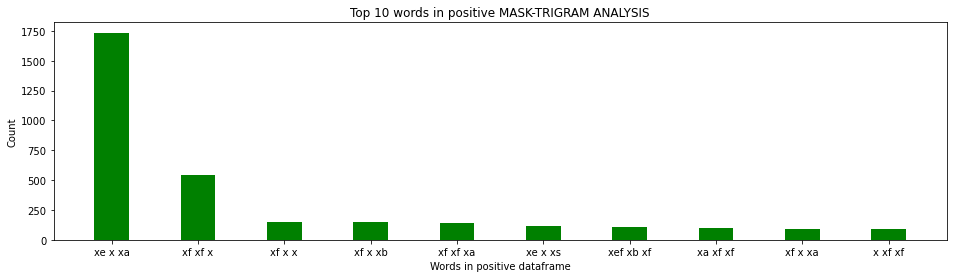

In [131]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive MASK-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.show()

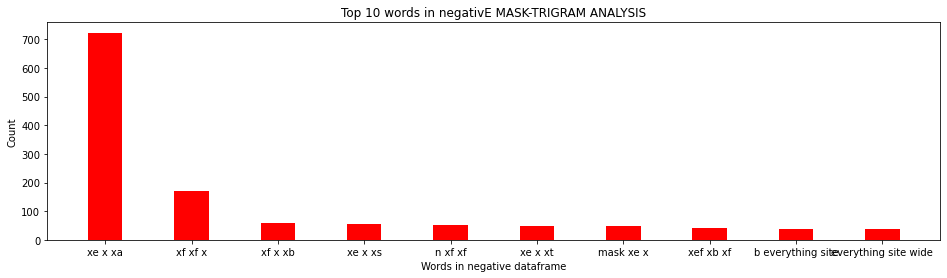

In [132]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negativE MASK-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

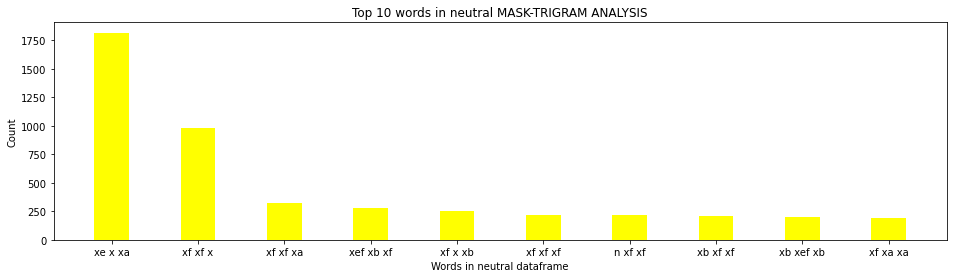

In [133]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral MASK-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()